# "Personalised Cancer Diagnosis"
> "Given past patient diagnosis records and virus mutation wikipedia. We have to find out which virus new patient carries now from category of 10 virus mutations?"

- toc: true
- branch: master
- badges: true
- comments: true
- author: Sai Kumar Reddy Pochireddygari
- categories: [Python, Machine Learning, Statistics]

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/ </p>
<p> Data: Memorial Sloan Kettering Cancer Center (MSKCC)</p>
<p> Download training_variants.zip and training_text.zip from Kaggle.</p> 

<h6> Context:</h6>
<p> Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/discussion/35336#198462</p>

<h6> Problem statement : </h6>
<p> Classify the given genetic variations/mutations based on evidence from text-based clinical literature. </p>

<h2>1.2. Source/Useful Links</h2>

 Some articles and reference blogs about the problem statement

1. https://www.forbes.com/sites/matthewherper/2017/06/03/a-new-cancer-drug-helped-almost-everyone-who-took-it-almost-heres-what-it-teaches-us/#2a44ee2f6b25
2. https://www.youtube.com/watch?v=UwbuW7oK8rk 
3. https://www.youtube.com/watch?v=qxXRKVompI8

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No low-latency requirement.
* Interpretability is important.
* Errors can be very costly.
* Probability of a data-point belonging to each class is needed.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment/data
- We have two data files: one conatins the information about the genetic mutations and the other contains the clinical evidence (text) that  human experts/pathologists use to classify the genetic mutations. 
- Both these data files are have a common column called ID
- <p> 
    Data file's information:
    <ul> 
        <li>
        training_variants (ID , Gene, Variations, Class)
        </li>
        <li>
        training_text (ID, Text)
        </li>
    </ul>
</p>

<h3>2.1.2. Example Data Point</h3>

<h6>training_variants</h6>
<hr>
ID,Gene,Variation,Class<br>
0,FAM58A,Truncating Mutations,1 <br>
1,CBL,W802*,2 <br>
2,CBL,Q249E,2 <br>
...

<h6> training_text</h6>
<hr>
ID,Text <br>
0||Cyclin-dependent kinases (CDKs) regulate a variety of fundamental cellular processes. CDK10 stands out as one of the last orphan CDKs for which no activating cyclin has been identified and no kinase activity revealed. Previous work has shown that CDK10 silencing increases ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2)-driven activation of the MAPK pathway, which confers tamoxifen resistance to breast cancer cells. The precise mechanisms by which CDK10 modulates ETS2 activity, and more generally the functions of CDK10, remain elusive. Here we demonstrate that CDK10 is a cyclin-dependent kinase by identifying cyclin M as an activating cyclin. Cyclin M, an orphan cyclin, is the product of FAM58A, whose mutations cause STAR syndrome, a human developmental anomaly whose features include toe syndactyly, telecanthus, and anogenital and renal malformations. We show that STAR syndrome-associated cyclin M mutants are unable to interact with CDK10. Cyclin M silencing phenocopies CDK10 silencing in increasing c-Raf and in conferring tamoxifen resistance to breast cancer cells. CDK10/cyclin M phosphorylates ETS2 in vitro, and in cells it positively controls ETS2 degradation by the proteasome. ETS2 protein levels are increased in cells derived from a STAR patient, and this increase is attributable to decreased cyclin M levels. Altogether, our results reveal an additional regulatory mechanism for ETS2, which plays key roles in cancer and development. They also shed light on the molecular mechanisms underlying STAR syndrome.Cyclin-dependent kinases (CDKs) play a pivotal role in the control of a number of fundamental cellular processes (1). The human genome contains 21 genes encoding proteins that can be considered as members of the CDK family owing to their sequence similarity with bona fide CDKs, those known to be activated by cyclins (2). Although discovered almost 20 y ago (3, 4), CDK10 remains one of the two CDKs without an identified cyclin partner. This knowledge gap has largely impeded the exploration of its biological functions. CDK10 can act as a positive cell cycle regulator in some cells (5, 6) or as a tumor suppressor in others (7, 8). CDK10 interacts with the ETS2 (v-ets erythroblastosis virus E26 oncogene homolog 2) transcription factor and inhibits its transcriptional activity through an unknown mechanism (9). CDK10 knockdown derepresses ETS2, which increases the expression of the c-Raf protein kinase, activates the MAPK pathway, and induces resistance of MCF7 cells to tamoxifen (6). ... 

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>


<p>
    
            There are nine different classes a genetic mutation can be classified into => Multi class classification problem
   
      
    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/msk-redefining-cancer-treatment#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Interpretability
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* No Latency constraints.

<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt
from scipy import stats
from wordcloud import STOPWORDS
from nltk import SnowballStemmer , PorterStemmer
from bs4 import BeautifulSoup
import re
import collections
import string
import math
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.feature_extraction import FeatureHasher
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import log_loss , confusion_matrix
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



<h1>3. Exploratory Data Analysis</h1>

In [0]:
df_text=pd.read_csv("/content/drive/My Drive/training_text/training_text" ,sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)
df_variants=pd.read_csv("/content/drive/My Drive/training_text/training_variants")

In [0]:
df_text.head()

ID                                               TEXT
0   0  Cyclin-dependent kinases (CDKs) regulate a var...
1   1   Abstract Background  Non-small cell lung canc...
2   2   Abstract Background  Non-small cell lung canc...
3   3  Recent evidence has demonstrated that acquired...
4   4  Oncogenic mutations in the monomeric Casitas B...

In [0]:

df_variants.head()

ID    Gene             Variation  Class
0   0  FAM58A  Truncating Mutations      1
1   1     CBL                 W802*      2
2   2     CBL                 Q249E      2
3   3     CBL                 N454D      3
4   4     CBL                 L399V      4

In [0]:
df=pd.merge(df_text,df_variants , on= "ID")

In [0]:
df.head()

ID  ... Class
0   0  ...     1
1   1  ...     2
2   2  ...     2
3   3  ...     3
4   4  ...     4

[5 rows x 5 columns]

In [0]:
df.shape

(3321, 5)

* There are 3321 Data points and 5 cloumns 

In [0]:
df.columns

Index(['ID', 'TEXT', 'Gene', 'Variation', 'Class'], dtype='object')

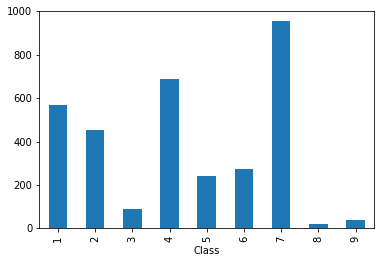

In [0]:
df.groupby('Class')['ID'].count().plot.bar()

* We can see that the class 1,2,4,7 have failry large amount of data points while 5,6 have less count and 8,9 being very least count of data points . we can see imbalance data set here.

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3321 non-null   int64 
 1   TEXT       3316 non-null   object
 2   Gene       3321 non-null   object
 3   Variation  3321 non-null   object
 4   Class      3321 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 155.7+ KB


In [0]:
df.Gene.describe()

count      3321
unique      264
top       BRCA1
freq        264
Name: Gene, dtype: object

* There are 264 unique genes , and the gene name BRCAI  has more frequency of occuring  means it is present in that many datapoints and that gene occurs more.

In [0]:
df.Gene.value_counts(ascending=True)

SDHB        1
ARID1A      1
RAD51B      1
FOXO1       1
NCOR1       1
         ... 
BRCA2     125
PTEN      126
EGFR      141
TP53      163
BRCA1     264
Name: Gene, Length: 264, dtype: int64

* We can see the most number of repeating genes are BRCAI followed by TP53 ,EGFR and so on...

In [0]:
df.Variation.value_counts()

Truncating Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
                        ..
C47G                     1
S241T                    1
X1009_splice             1
D74N                     1
T338I                    1
Name: Variation, Length: 2996, dtype: int64

* The most common type of mutations are Truncating Mutations followed by deletion ,amplification etc.

In [0]:
df.Class.value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

In [0]:
df.head()

ID  ... Class
0   0  ...     1
1   1  ...     2
2   2  ...     2
3   3  ...     3
4   4  ...     4

[5 rows x 5 columns]

<p> Looking for null values <p>

In [0]:
df[df.isna().any(1)] 

ID TEXT    Gene             Variation  Class
1109  1109  NaN   FANCA                S1088F      1
1277  1277  NaN  ARID5B  Truncating Mutations      1
1407  1407  NaN   FGFR3                 K508M      6
1639  1639  NaN    FLT1         Amplification      6
2755  2755  NaN    BRAF                 G596C      7

* A good way to replace them will be by the gene + variation 
as we cannot drop them or repleace them by empty string due to our objective.

In [0]:

df.loc[df['TEXT'].isnull(),'TEXT'] = df['Gene'] +' '+df['Variation']

In [0]:
df[df.isna().any(1)] 

Empty DataFrame
Columns: [ID, TEXT, Gene, Variation, Class]
Index: []

* Before Going further for analysis lets preprocess the text data 

In [0]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
def preProccesing( data ):

  column_data=data['TEXT']

  review_text=[ ]
  
  for sentance in column_data.values:
    #1.Removing Urls
    sentance=re.sub(r"http\S+" , "" , sentance )
    #2.Removing html tags
    sentance=re.sub(r"<[^<]+?>", "" , sentance )
    #Removing lmxl
    soup = BeautifulSoup(sentance, 'lxml')
    sentance = soup.get_text()
    #3.decontracting phares
    sentance=decontracted(sentance)
    #4.Removing word with numbers
    sentance=re.sub("S*\d\S*" , "" , sentance)
    #5.remove Special charactor punc spaces
    sentance=re.sub(r"\W+", " ", sentance)
    # replace every special char with space
    sentance = re.sub('[^a-zA-Z0-9\n]', ' ',sentance)
    # replace multiple spaces with single space
    sentance = re.sub('\s+',' ', sentance)
    
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in STOPWORDS)
  
    review_text.append(sentance.strip())
  df['Cleaned_text'] = pd.DataFrame(review_text)


<p>Lets Run this function<p>

In [0]:
preProccesing(df)

In [0]:
df.head()

ID  ...                                       Cleaned_text
0   0  ...  cyclin dependent kinases cdks regulate variety...
1   1  ...  abstract background non small cell lung cancer...
2   2  ...  abstract background non small cell lung cancer...
3   3  ...  recent evidence demonstrated acquired uniparen...
4   4  ...  oncogenic mutations monomeric casitas b lineag...

[5 rows x 6 columns]

*As we got the cleaned text lets remove the TEXT field from the DataFrame

In [0]:
df=df.drop(columns='TEXT')

In [0]:
df.head()

ID    Gene  ... Class                                       Cleaned_text
0   0  FAM58A  ...     1  cyclin dependent kinases cdks regulate variety...
1   1     CBL  ...     2  abstract background non small cell lung cancer...
2   2     CBL  ...     2  abstract background non small cell lung cancer...
3   3     CBL  ...     3  recent evidence demonstrated acquired uniparen...
4   4     CBL  ...     4  oncogenic mutations monomeric casitas b lineag...

[5 rows x 5 columns]

In [0]:
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [ID, Gene, Variation, Class, Cleaned_text]
Index: []

In [0]:
df.to_csv("OriginalDFWithCleanedTextPresent.csv")

In [0]:
Original_df=df

In [0]:
df.Class.value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

* lets perform Univariate analysis on these features

<h3> 3.1 Univariate Analysis<h3>

<h4>3.1.2 Analysing Gene Feature <h4>


<p>Q1. what type of feature is gene ?<p>

* It is a Categorical Feature 

<p>Q2.How many Categories are there?<p>


In [0]:
df.groupby("Gene")["ID"].count()

Gene
ABL1       26
ACVR1       3
AGO2        5
AKT1       28
AKT2       11
           ..
WHSC1       1
WHSC1L1     1
XPO1        2
XRCC2       2
YAP1        4
Name: ID, Length: 264, dtype: int64

* we can see that there are 263 unique Gene categories are present

<p>Q3. Distribution of Gene? <p>

In [0]:
unique_genes = df['Gene'].value_counts()
# the top 10 genes that occured most
print(unique_genes.head(10))

BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ALK        69
ERBB2      69
PDGFRA     60
Name: Gene, dtype: int64


In [0]:
sums=sum(unique_genes.values)


In [0]:
result=unique_genes.values/sums

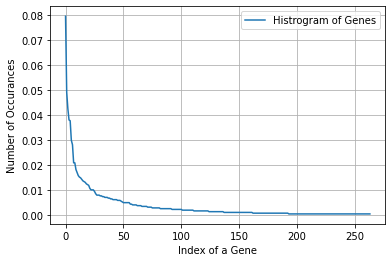

In [0]:
plt.plot(result,label="Histrogram of Genes")
plt.xlabel('Index of a Gene')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

* There are some genes which occur very less , some genes which occur more

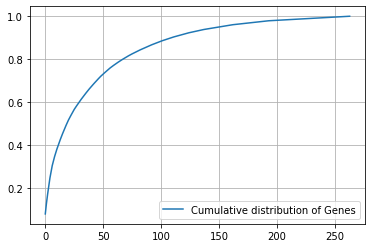

In [0]:
plt.plot(np.cumsum(result),label='Cumulative distribution of Genes')
plt.grid()
plt.legend()
plt.show()

* 80 Percent of the genes have index in range 50-75

<p>Q4 How to featurize this Feature? **Gene**<p>


<p>1.One-Hot Encoding<p>
<p>2.Mean-ResponseCoding<p>

<p>3.FeatureHashing<p>

source:-https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.FeatureHasher.html#sklearn.feature_extraction.FeatureHasher


* Lets Create  data frames to work with this 

In [0]:
df_one_hot_encoding=df
df_mean_response_coding=df
df_featureHashing=df

* OneHotEncoding

In [0]:
df_one_hot_encoding=df_one_hot_encoding.drop(columns=['ID', 'Variation','Class','Cleaned_text'])

In [0]:
df_one_hot_encoding.head()

Gene
0  FAM58A
1     CBL
2     CBL
3     CBL
4     CBL

In [0]:
labelencode=LabelEncoder()

In [0]:
df_one_hot_encoding['Generated_lables' ]=labelencode.fit_transform(df_one_hot_encoding['Gene'])

In [0]:
df_one_hot_encoding

Gene  Generated_lables
0     FAM58A                85
1        CBL                39
2        CBL                39
3        CBL                39
4        CBL                39
...      ...               ...
3316   RUNX1               221
3317   RUNX1               221
3318   RUNX1               221
3319   RUNX1               221
3320   RUNX1               221

[3321 rows x 2 columns]

In [0]:
list_feature_labels=list(labelencode.classes_) 

In [0]:
df_one_hot_encoding.head()

Gene  Generated_lables
0  FAM58A                85
1     CBL                39
2     CBL                39
3     CBL                39
4     CBL                39

In [0]:
onehotencoder=OneHotEncoder()

In [0]:
array_generated_onehotfeatures=onehotencoder.fit_transform(df_one_hot_encoding[['Generated_lables']]).toarray()

In [0]:
data_gen= pd.DataFrame(array_generated_onehotfeatures,columns=list_feature_labels)

In [0]:
data_gen.head()

ABL1  ACVR1  AGO2  AKT1  AKT2  AKT3  ...  VHL  WHSC1  WHSC1L1  XPO1  XRCC2  YAP1
0   0.0    0.0   0.0   0.0   0.0   0.0  ...  0.0    0.0      0.0   0.0    0.0   0.0
1   0.0    0.0   0.0   0.0   0.0   0.0  ...  0.0    0.0      0.0   0.0    0.0   0.0
2   0.0    0.0   0.0   0.0   0.0   0.0  ...  0.0    0.0      0.0   0.0    0.0   0.0
3   0.0    0.0   0.0   0.0   0.0   0.0  ...  0.0    0.0      0.0   0.0    0.0   0.0
4   0.0    0.0   0.0   0.0   0.0   0.0  ...  0.0    0.0      0.0   0.0    0.0   0.0

[5 rows x 264 columns]

In [0]:
onehotencoded_features_gene=pd.concat([df_one_hot_encoding,data_gen , df['Class']] , axis=1 )

In [0]:
onehotencoded_features_gene.Class.value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

In [0]:
# Dropping columns with gene and label encoder vars
finalOneHotEncodedFeaturesOfGene=onehotencoded_features_gene.drop(columns=['Gene','Generated_lables'])

In [0]:
finalOneHotEncodedFeaturesOfGene.Class.value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

* As we can see now we have one hot encodeed features of our gene features as   dataframe(finalOneHotEncodedFeaturesOfGene).

In [0]:
#Saving Gene Onehot features
finalOneHotEncodedFeaturesOfGene.to_csv("finalOneHotEncodedFeaturesOfGene.csv")

* Feature Hashing for GeneFeature

*We had 263 categories of genes so we can reduce them to half or less our wish better we reduce them to size of 9 As we have 9 classes.*

In [0]:
df_featureHashing.head()

ID    Gene  ... Class                                       Cleaned_text
0   0  FAM58A  ...     1  cyclin dependent kinases cdks regulate variety...
1   1     CBL  ...     2  abstract background non small cell lung cancer...
2   2     CBL  ...     2  abstract background non small cell lung cancer...
3   3     CBL  ...     3  recent evidence demonstrated acquired uniparen...
4   4     CBL  ...     4  oncogenic mutations monomeric casitas b lineag...

[5 rows x 5 columns]

In [0]:
df_featureHashing=df_featureHashing.drop(columns=['ID','Variation','Class','Cleaned_text'])

In [0]:
df_featureHashing.head()

Gene
0  FAM58A
1     CBL
2     CBL
3     CBL
4     CBL

In [0]:
hasher=FeatureHasher(n_features=9,input_type='string')

In [0]:
hased_features=hasher.fit_transform(df_featureHashing['Gene']).toarray()

In [0]:
dataframe_hashed_features=pd.DataFrame(hased_features)

In [0]:
dataframe_hashed_features.head()

0    1    2    3    4    5    6    7    8
0  0.0  2.0  0.0  0.0  1.0  0.0  0.0  0.0 -1.0
1  0.0  0.0 -1.0 -1.0  0.0  0.0 -1.0  0.0  0.0
2  0.0  0.0 -1.0 -1.0  0.0  0.0 -1.0  0.0  0.0
3  0.0  0.0 -1.0 -1.0  0.0  0.0 -1.0  0.0  0.0
4  0.0  0.0 -1.0 -1.0  0.0  0.0 -1.0  0.0  0.0

In [0]:
finalFeatureHashedFeaturesOfGene=pd.concat([dataframe_hashed_features,df['Class']],axis=1)

In [0]:
finalFeatureHashedFeaturesOfGene.Class.value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

In [0]:
#Saving Gene Hased features
finalFeatureHashedFeaturesOfGene.to_csv("finalFeatureHashedFeaturesOfGene.csv")

* Now Lets go for meanResponseCoding


In [0]:
df_mean_response_coding.head()

ID    Gene  ... Class                                       Cleaned_text
0   0  FAM58A  ...     1  cyclin dependent kinases cdks regulate variety...
1   1     CBL  ...     2  abstract background non small cell lung cancer...
2   2     CBL  ...     2  abstract background non small cell lung cancer...
3   3     CBL  ...     3  recent evidence demonstrated acquired uniparen...
4   4     CBL  ...     4  oncogenic mutations monomeric casitas b lineag...

[5 rows x 5 columns]

In [0]:
df_mean_response_coding.Gene.value_counts()

BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
         ... 
DUSP4       1
TCF7L2      1
VEGFA       1
ASXL1       1
ARID1A      1
Name: Gene, Length: 264, dtype: int64

In [0]:
df_mean_response_coding=df_mean_response_coding.drop(columns=['Variation','Cleaned_text'])

In [0]:
df_mean_response_coding.Gene.value_counts()

BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
         ... 
IKZF1       1
GNA11       1
INPP4B      1
FGF3        1
ARID1A      1
Name: Gene, Length: 264, dtype: int64

In [0]:
df.head()

ID    Gene  ... Class                                       Cleaned_text
0   0  FAM58A  ...     1  cyclin dependent kinases cdks regulate variety...
1   1     CBL  ...     2  abstract background non small cell lung cancer...
2   2     CBL  ...     2  abstract background non small cell lung cancer...
3   3     CBL  ...     3  recent evidence demonstrated acquired uniparen...
4   4     CBL  ...     4  oncogenic mutations monomeric casitas b lineag...

[5 rows x 5 columns]

In [0]:
len(df)

3321

In [0]:
dummy=df_mean_response_coding[0:3321]

In [0]:
objects=dummy.Gene.value_counts()

In [0]:
def myfunction_one(data):
  dummy1=data
  my_dicti={}


  for i,denominator in objects.items():
    vector=[]
    for k in range (1,10):
      
      count=len(dummy1.loc[(dummy1['Gene']==i) & (dummy1['Class']==k)])
      vector.append( (count + (1*10)) / (denominator + (1*90))  )
    
    my_dicti[i] = vector
  return my_dicti



In [0]:
my_diciti=myfunction_one(dummy)


In [0]:
def vectoresCreation(data):
  dummy1=data  
  eachrow_vector_data=[ ]
  for index,row in dummy1.iterrows():
    if row["Gene"] in dict(dummy1.Gene.value_counts()).keys():
      eachrow_vector_data.append(my_diciti[row["Gene"]])
    else :
      eachrow_vector_data.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])  

  return(eachrow_vector_data)


In [0]:
eachRow_Vector=vectoresCreation(dummy)


In [0]:
df_meanresponse_vectors=pd.DataFrame(eachRow_Vector)

In [0]:
df_meanresponse_vectors.shape

(3321, 9)

In [0]:
df_meanresponse_vectors=pd.concat([df_meanresponse_vectors , df["Class"]] ,axis=1)

In [0]:
df_meanresponse_vectors.Class.value_counts()

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

In [0]:
# Saving Meanresponse vectors of gene
df_meanresponse_vectors.to_csv("FinalMeanResponseVectorsOfGene.csv")

<p>Q5.How good is this gene feature  in predicting y_i?</p>



*We can do this in many ways one is by simple plotting and other by simple models.*

* Lets perform simple model on our three vectors of features we have lets statrt with hashed features as the features are small we can take knn,svm,dt ,, which works really well when we have less number of features and try svms as well.

In [0]:
finalFeatureHashedFeaturesOfGene=pd.read_csv("/content/finalFeatureHashedFeaturesOfGene.csv")

In [0]:
finalFeatureHashedFeaturesOfGene=finalFeatureHashedFeaturesOfGene.drop(columns='Unnamed: 0')

In [0]:
finalFeatureHashedFeaturesOfGene.head()

0    1    2    3    4    5    6    7    8  Class
0  0.0  2.0  0.0  0.0  1.0  0.0  0.0  0.0 -1.0      1
1  0.0  0.0 -1.0 -1.0  0.0  0.0 -1.0  0.0  0.0      2
2  0.0  0.0 -1.0 -1.0  0.0  0.0 -1.0  0.0  0.0      2
3  0.0  0.0 -1.0 -1.0  0.0  0.0 -1.0  0.0  0.0      3
4  0.0  0.0 -1.0 -1.0  0.0  0.0 -1.0  0.0  0.0      4

In [0]:
finalFeatureHashedFeaturesOfGene.shape

(3321, 10)

In [0]:
finalFeatureHashedFeaturesOfGene.Class.value_counts()  

7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: Class, dtype: int64

In [0]:
y_true_Hashed=finalFeatureHashedFeaturesOfGene['Class'].values
X_Hashed=finalFeatureHashedFeaturesOfGene[["0","1","2","3","4","5","6","7","8"]]

**model to test**

In [0]:
def SVM(var1,var2):
  """
  This function is use to build n hyperparamater tune SVM
  """
  X = var1
  y_true = var2

  x_train,x_test,y_train,y_test=train_test_split(X , y_true , stratify=y_true , test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train , stratify=y_train , test_size=0.2)

  print ( x_train.shape,y_train.shape)
  print( x_cv.shape,y_cv.shape)
  print(x_test.shape,y_test.shape)

  #Svm HyperTuning
  logLoss_train=[ ]
  logLoss_cv=[ ]
  c = [0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10 ]
  for i in c:
        clf_SGD=SGDClassifier(loss='hinge',penalty='l2',alpha=i,class_weight='balanced')
        clf_SGD.fit(x_train,y_train)
        
        calibrated = CalibratedClassifierCV(clf_SGD, method='sigmoid', cv=5)
        calibrated.fit(x_train , y_train)
        
        predict_y = calibrated.predict_proba(x_train)
        predict_y2 = calibrated.predict_proba(x_cv)
        
        logLoss_train.append(log_loss(y_train,predict_y, eps=1e-15))
        
        logLoss_cv.append(log_loss(y_cv,predict_y2, eps=1e-15))
        
        

        

        

        
    #plt.plot((c), train_auc, label='Train AUC')
    #plt.plot((c), cv_auc, label='CV AUC')

  plt.plot(np.log(c), logLoss_train, label='Train logloss')
  plt.plot(np.log(c), logLoss_cv, label='CV logloss')

  plt.scatter(np.log(c), logLoss_cv, label='CV AUC')
  plt.legend()

  plt.xlabel("C: hyperparameter")
  plt.ylabel("LogLoss")
  plt.title("ERROR PLOTS")
  return(plt.show())



  







(2124, 9) (2124,)
(532, 9) (532,)
(665, 9) (665,)


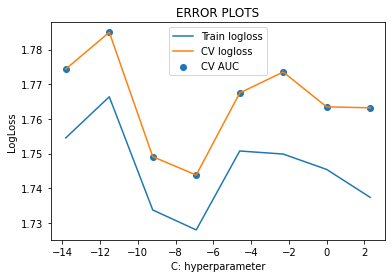

In [0]:
SVM(X_Hashed,y_true_Hashed)

**by seeing the above plot we take alpha as 0.001**

In [0]:
def SVMModel(var1 , var2):




  X = var1
  y_true = var2

  x_train,x_test,y_train,y_test=train_test_split(X , y_true , stratify=y_true , test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train , stratify=y_train , test_size=0.2)

  print( x_train.shape,y_train.shape)
  print( x_cv.shape,y_cv.shape)
  print(x_test.shape,y_test.shape)
  
  logLoss_test=[ ]
  logLoss_cv_new=[ ]
  logLoss_train_new=[ ]
  
  
  clf_SGD_test=SGDClassifier(loss='hinge',penalty='l2',alpha=0.001,class_weight='balanced')
  clf_SGD_test.fit(x_train,y_train)

  calibrated = CalibratedClassifierCV(clf_SGD_test, method='sigmoid', cv=5)
  calibrated.fit(x_train , y_train)
  
  predict_y_test = calibrated.predict_proba(x_test)
  logLoss_test.append(log_loss(y_test,predict_y_test, eps=1e-15))
  
  predicted_y_train=calibrated.predict_proba(x_train)
  logLoss_train_new.append(log_loss(y_train,predicted_y_train, eps=1e-15))

  predicted_y_cv=calibrated.predict_proba(x_cv)
  logLoss_cv_new.append(log_loss(y_cv,predicted_y_cv, eps=1e-15))
  

  print("The Logg loss for training data with best aplha {} is {} ".format( 0.001 ,logLoss_train_new ))
  print("The Logg loss for cv data with best aplha {} is {}".format( 0.001,logLoss_cv_new ))  
  print("The Logg loss for test data with best aplha {} is {}".format( 0.001,logLoss_test))


In [0]:
SVMModel(X_Hashed,y_true_Hashed)

(2124, 9) (2124,)
(532, 9) (532,)
(665, 9) (665,)
The Logg loss for training data with best aplha 0.001 is [1.7364535644919004] 
The Logg loss for cv data with best aplha 0.001 is [1.7737982623403665]
The Logg loss for test data with best aplha 0.001 is [1.7470137046208585]


* we can say that model is not overfitting and underfitting by looking at the log loss we got.
Lets look at other featurisations as well


**lets go to meanresponse coding features and apply SVM**


In [0]:
finalMeanResponseVectorsOfGene=pd.read_csv("/content/FinalMeanResponseVectorsOfGene.csv")

In [0]:
finalMeanResponseVectorsOfGene=finalMeanResponseVectorsOfGene.drop(columns='Unnamed: 0')

In [0]:
finalMeanResponseVectorsOfGene.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', 'Class'], dtype='object')

In [0]:
x_meanResponse=finalMeanResponseVectorsOfGene[['0','1','2','3','4','5','6','7','8']]
y_true_meanResponse=finalMeanResponseVectorsOfGene.Class.values

In [0]:
def SVM_meanResponseCoding(var1,var2):
  """
  This function is use to build n hyperparamater tune SVM
  """
  X = var1
  y_true = var2

  x_train,x_test,y_train,y_test=train_test_split(X , y_true , stratify=y_true , test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train , stratify=y_train , test_size=0.2)

  print ( x_train.shape,y_train.shape)
  print( x_cv.shape,y_cv.shape)
  print(x_test.shape,y_test.shape)

  #Svm HyperTuning
  logLoss_train=[ ]
  logLoss_cv=[ ]
  c = [0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10 ]
  for i in c:
        clf=SVC(C=i,kernel='rbf',class_weight='balanced',probability=True)
        #clf_SGD=SGDClassifier(loss='hinge',penalty='l2',alpha=i,class_weight='balanced')
        clf.fit(x_train,y_train)
        
        calibrated = CalibratedClassifierCV(clf, method='sigmoid', cv=5)
        calibrated.fit(x_train , y_train)
        
        predict_y = calibrated.predict_proba(x_train)
        predict_y2 = calibrated.predict_proba(x_cv)
        
        logLoss_train.append(log_loss(y_train,predict_y, eps=1e-15))
        
        logLoss_cv.append(log_loss(y_cv,predict_y2, eps=1e-15))
        
        

        

        

        
    #plt.plot((c), train_auc, label='Train AUC')
    #plt.plot((c), cv_auc, label='CV AUC')

  plt.plot(np.log(c), logLoss_train, label='Train logloss')
  plt.plot(np.log(c), logLoss_cv, label='CV logloss')

  plt.scatter(np.log(c), logLoss_cv, label='CV logloss')
  plt.legend()

  plt.xlabel("C: hyperparameter")
  plt.ylabel("LogLoss")
  plt.title("ERROR PLOTS")
  return(plt.show())



  







(2124, 9) (2124,)
(532, 9) (532,)
(665, 9) (665,)


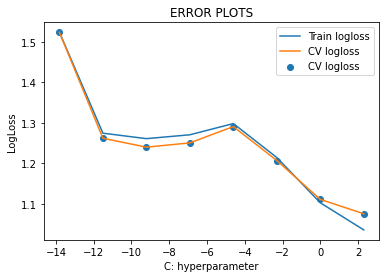

In [0]:
SVM_meanResponseCoding(x_meanResponse,y_true_meanResponse)

*We ca see that i can take c = 1 from above graph Lets go for testing on test data*

In [0]:
def SVM_meanResponseCoding_test(var1,var2):
  """
  This function is use to build n test SVM
  """
  X = var1
  y_true = var2

  x_train,x_test,y_train,y_test=train_test_split(X , y_true , stratify=y_true , test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train , stratify=y_train , test_size=0.2)

  print ( x_train.shape,y_train.shape)
  print( x_cv.shape,y_cv.shape)
  print(x_test.shape,y_test.shape)

  
  logLoss_train=[ ]
  logLoss_cv=[ ]
  logLoss_test=[ ]
  
  clf=SVC(C=1,kernel='rbf',class_weight='balanced',probability=True)
        #clf_SGD=SGDClassifier(loss='hinge',penalty='l2',alpha=i,class_weight='balanced')
  clf.fit(x_train,y_train)
        
  calibrated = CalibratedClassifierCV(clf, method='sigmoid', cv=5)
  calibrated.fit(x_train , y_train)
        
  predict_y = calibrated.predict_proba(x_train)
  predict_y2 = calibrated.predict_proba(x_cv)
  predict_y3 =calibrated.predict_proba(x_test)
        
  logLoss_train.append(log_loss(y_train,predict_y, eps=1e-15))
        
  logLoss_cv.append(log_loss(y_cv,predict_y2, eps=1e-15))

  logLoss_test.append(log_loss(y_test,predict_y3, eps=1e-15))
  
  print("The Logg loss for training data with best aplha {} is {} ".format( 1 ,logLoss_train))
  print("The Logg loss for cv data with best aplha {} is {}".format( 1,logLoss_cv ))  
  print("The Logg loss for test data with best aplha {} is {}".format( 1,logLoss_test))

        
        

        

        




  







In [0]:
SVM_meanResponseCoding_test(x_meanResponse,y_true_meanResponse)

(2124, 9) (2124,)
(532, 9) (532,)
(665, 9) (665,)
The Logg loss for training data with best aplha 1 is [1.1284981651581154] 
The Logg loss for cv data with best aplha 1 is [1.1436551747978385]
The Logg loss for test data with best aplha 1 is [1.1082205650636348]


* we can say that model is not overfitting and underfitting by looking at the log loss we got.
Lets look at other featurisations as well.

**comming to Onehotencodded Features we can use logistic regression due to high dimentions**

In [0]:
finalOneHotFeatures=pd.read_csv("/content/finalOneHotEncodedFeaturesOfGene.csv")

In [0]:
finalOneHotFeatures=finalOneHotFeatures.drop(columns="Unnamed: 0")

In [0]:
finalOneHotFeatures.columns

Index(['ABL1', 'ACVR1', 'AGO2', 'AKT1', 'AKT2', 'AKT3', 'ALK', 'APC', 'AR',
       'ARAF',
       ...
       'TSC2', 'U2AF1', 'VEGFA', 'VHL', 'WHSC1', 'WHSC1L1', 'XPO1', 'XRCC2',
       'YAP1', 'Class'],
      dtype='object', length=265)

In [0]:
x_oneHot=finalOneHotFeatures.iloc[:,0:264 ]

In [0]:
y_true_oneHot=finalOneHotFeatures.Class.values

**Model**

In [0]:
def LogisticReg_tune(var1,var2):
  """
  This Function is used to tune the logistic regression
  """
  
  X=var1
  y_true=var2

  x_train,x_test,y_train,y_test=train_test_split(X , y_true , stratify=y_true , test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train , stratify=y_train , test_size=0.2)

  print ( x_train.shape,y_train.shape)
  print( x_cv.shape,y_cv.shape)
  print(x_test.shape,y_test.shape)



  logLoss_train = []
  logLoss_cv = []
  c = [0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10 , 100 ]
  for i in c:
      clf = LogisticRegression(penalty='l2',C= i,max_iter=1000 , class_weight='balanced' ,solver='lbfgs' )
      clf.fit(x_train , y_train)
     

      
      calibrated = CalibratedClassifierCV(clf, method='sigmoid', cv=5)
      calibrated.fit(x_train , y_train)
        
      predict_y = calibrated.predict_proba(x_train)
      predict_y2 = calibrated.predict_proba(x_cv)
        
      logLoss_train.append(log_loss(y_train,predict_y, eps=1e-15))
        
      logLoss_cv.append(log_loss(y_cv,predict_y2, eps=1e-15))
        
        

        

        

        
    #plt.plot((c), train_auc, label='Train AUC')
    #plt.plot((c), cv_auc, label='CV AUC')

  plt.plot(np.log(c), logLoss_train, label='Train logloss')
  plt.plot(np.log(c), logLoss_cv, label='CV logloss')

  plt.scatter(np.log(c), logLoss_cv, label='CV logloss')
  plt.legend()

  plt.xlabel("C: hyperparameter")
  plt.ylabel("LogLoss")
  plt.title("ERROR PLOTS")
  return(plt.show())



  






(2124, 264) (2124,)
(532, 264) (532,)
(665, 264) (665,)


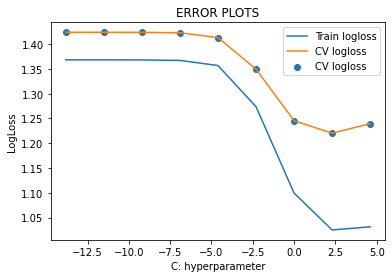

In [0]:
LogisticReg_tune(x_oneHot,y_true_oneHot)

* by seeing the above graph i can take log loss as  0.1 .

In [0]:
def LogisticReg_test(var1,var2):
  """
  This Function is used to tune the logistic regression
  """
  
  X=var1
  y_true=var2

  x_train,x_test,y_train,y_test=train_test_split(X , y_true , stratify=y_true , test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train , stratify=y_train , test_size=0.2)

  print ( x_train.shape,y_train.shape)
  print( x_cv.shape,y_cv.shape)
  print(x_test.shape,y_test.shape)



  logLoss_train = []
  logLoss_cv = [ ]
  logLoss_test=[ ]
  clf = LogisticRegression(penalty='l2',C= 0.1,max_iter=1000 , class_weight='balanced' ,solver='lbfgs' )
  clf.fit(x_train , y_train)
      

      
  calibrated = CalibratedClassifierCV(clf, method='sigmoid', cv=5)
  calibrated.fit(x_train , y_train)
        
  predict_y = calibrated.predict_proba(x_train)
  predict_y2 = calibrated.predict_proba(x_cv)
  predict_y3 = calibrated.predict_proba(x_test)     
  
  logLoss_train.append(log_loss(y_train,predict_y, eps=1e-15))
  logLoss_cv.append(log_loss(y_cv,predict_y2, eps=1e-15))
  logLoss_test.append(log_loss(y_test,predict_y3, eps=1e-15))      

  print("The Logg loss for training data with best aplha {} is {} ".format( 0.1 ,logLoss_train))
  print("The Logg loss for cv data with best aplha {} is {}".format( 0.1,logLoss_cv ))  
  print("The Logg loss for test data with best aplha {} is {}".format( 0.1,logLoss_test))

  
  


In [0]:
LogisticReg_test(x_oneHot,y_true_oneHot)

(2124, 264) (2124,)
(532, 264) (532,)
(665, 264) (665,)
The Logg loss for training data with best aplha 0.1 is [1.2638620900916107] 
The Logg loss for cv data with best aplha 0.1 is [1.3524898055298527]
The Logg loss for test data with best aplha 0.1 is [1.3393455550993199]


* we can say that model is not overfitting and underfitting by looking at the log loss we got.
Lets look at other featurisations as well.

* Observations on Gene Featurisations

In [0]:
table=PrettyTable()

table.field_names=["Feature Name" , "Featurisation Used" ,"Model","HyperParameter", " train Logloss"," Cv Logloss","test Logloss"]

table.add_row(["Gene","FeatureHaser","SVM-kernel-RBF",0.001,1.7364,1.7737,1.7470])
table.add_row(["Gene","MeanResponseCoding","SVM-kernel-RBF",1,1.1284,1.1436,1.1082])
table.add_row(["Gene","OneHotEncoding","LogisticRegression",0.1,1.2638,1.3524,1.3393])
print(table)


+--------------+--------------------+--------------------+----------------+----------------+-------------+--------------+
| Feature Name | Featurisation Used |       Model        | HyperParameter |  train Logloss |  Cv Logloss | test Logloss |
+--------------+--------------------+--------------------+----------------+----------------+-------------+--------------+
|     Gene     |    FeatureHaser    |   SVM-kernel-RBF   |     0.001      |     1.7364     |    1.7737   |    1.747     |
|     Gene     | MeanResponseCoding |   SVM-kernel-RBF   |       1        |     1.1284     |    1.1436   |    1.1082    |
|     Gene     |   OneHotEncoding   | LogisticRegression |      0.1       |     1.2638     |    1.3524   |    1.3393    |
+--------------+--------------------+--------------------+----------------+----------------+-------------+--------------+


SVM with less dimensions with meanResponseCoding worked well 
because it uses kernal rbf, it would have worked also with hashed features as welldue to rbf kernel.

*Answer to Question 5 would be how gene is useful in our objective, from results (logloss) we obtained i can say that it is useful feature in our classification model.*

<p style="font-size:18px;"> <b>Q6.</b> Is the Gene feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

<h3>3.1.3 Analysing of Variation Feature<h3>

In [0]:
df.head()

ID    Gene  ... Class                                       Cleaned_text
0   0  FAM58A  ...     1  cyclin dependent kinases cdks regulate variety...
1   1     CBL  ...     2  abstract background non small cell lung cancer...
2   2     CBL  ...     2  abstract background non small cell lung cancer...
3   3     CBL  ...     3  recent evidence demonstrated acquired uniparen...
4   4     CBL  ...     4  oncogenic mutations monomeric casitas b lineag...

[5 rows x 5 columns]

<p>Q1. what is the Variation Feature Type?<p>


<p> It is Categorical <p>

<p>Q2.How many categories are present?<p>

In [0]:
len(df.Variation.value_counts())

2996

<p>There are 2996 categories<p>

<p>Q3.What is the distribution of categories?<p>

In [0]:
unique_variations=df.Variation.value_counts()

In [0]:
sum0f_unique=sum(unique_variations)

In [0]:
histoGram_variation=unique_variations.values / sum0f_unique

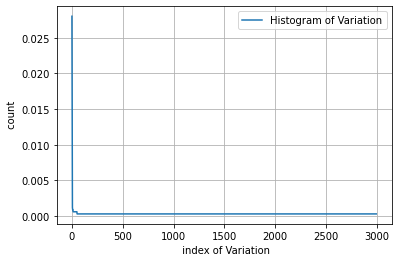

In [0]:
plt.plot(histoGram_variation ,label = "Histogram of Variation")
plt.xlabel(" index of Variation")
plt.ylabel(" count")
plt.legend()
plt.grid()
plt.show()


* by seeing the pdf we can say that the most of the variations which are in range of index(0-100) occur like 25% of the time.Rest are very less occuring their count is so small almost 0.

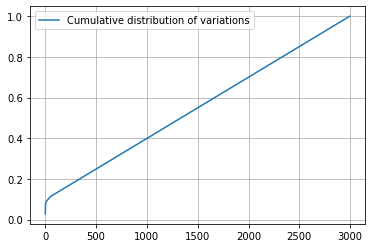

In [0]:
cumsum_histogram=np.cumsum(histoGram_variation)
plt.plot(cumsum_histogram,label='Cumulative distribution of variations')
plt.grid()
plt.legend()
plt.show()

<p>Q4.How to Featurise this variation Feature?<p>


*There are few ways:-*
<p>1.OneHotEncoding<p>
<p>2.FeatureHasher<p>
<p>3.MeanResponseCoding<p>


* Lets Start with OneHotEncoding of VariationFeature

In [0]:
#lets prepare our datasets for that
ds_oneHotencoding=df
ds_meanResponse_coding=df
ds_featureHasher=df

In [0]:
ds_oneHotencoding.columns

Index(['ID', 'Gene', 'Variation', 'Class', 'Cleaned_text'], dtype='object')

In [0]:
ds_oneHotencoding=ds_oneHotencoding.drop(columns=['ID','Gene','Class','Cleaned_text'])

In [0]:
ds_oneHotencoding.head()

Variation
0  Truncating Mutations
1                 W802*
2                 Q249E
3                 N454D
4                 L399V

In [0]:
label_encoder=LabelEncoder()
ds_oneHotencoding["Labelencodedvalues"]=label_encoder.fit_transform(df["Variation"])

In [0]:
ds_oneHotencoding

Variation  Labelencodedvalues
0     Truncating Mutations                2629
1                    W802*                2856
2                    Q249E                1897
3                    N454D                1667
4                    L399V                1447
...                    ...                 ...
3316                 D171N                 306
3317                 A122*                  28
3318               Fusions                 807
3319                  R80C                2249
3320                  K83E                1333

[3321 rows x 2 columns]

In [0]:
featurenames=label_encoder.classes_

In [0]:
ds_oneHotencoding

Variation  Labelencodedvalues
0     Truncating Mutations                2629
1                    W802*                2856
2                    Q249E                1897
3                    N454D                1667
4                    L399V                1447
...                    ...                 ...
3316                 D171N                 306
3317                 A122*                  28
3318               Fusions                 807
3319                  R80C                2249
3320                  K83E                1333

[3321 rows x 2 columns]

In [0]:
onehotencoder_Variation=OneHotEncoder()

In [0]:
encoded_array=onehotencoder_Variation.fit_transform(ds_oneHotencoding[['Labelencodedvalues']]).toarray()

In [0]:
encoded_array

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
ds_dash=pd.DataFrame(encoded_array , columns=featurenames)


In [0]:
ds_dash.head()

1_2009trunc  2010_2471trunc  ...  ZNF198-FGFR1 Fusion  p61BRAF
0          0.0             0.0  ...                  0.0      0.0
1          0.0             0.0  ...                  0.0      0.0
2          0.0             0.0  ...                  0.0      0.0
3          0.0             0.0  ...                  0.0      0.0
4          0.0             0.0  ...                  0.0      0.0

[5 rows x 2996 columns]

In [0]:
OneHotEncoded_ds=pd.concat([ds_oneHotencoding,ds_dash,df['Class']],axis=1)

In [0]:
OneHotEncoded_ds=OneHotEncoded_ds.drop(columns=['Variation','Labelencodedvalues'])

In [0]:
OneHotEncoded_ds.head()

1_2009trunc  2010_2471trunc  ...  p61BRAF  Class
0          0.0             0.0  ...      0.0      1
1          0.0             0.0  ...      0.0      2
2          0.0             0.0  ...      0.0      2
3          0.0             0.0  ...      0.0      3
4          0.0             0.0  ...      0.0      4

[5 rows x 2997 columns]

In [0]:
OneHotEncoded_ds.to_csv("oneHotEncodedfeaturesof_Variation.csv")

In [0]:
OneHotEncoded_ds

1_2009trunc  2010_2471trunc  ...  p61BRAF  Class
0             0.0             0.0  ...      0.0      1
1             0.0             0.0  ...      0.0      2
2             0.0             0.0  ...      0.0      2
3             0.0             0.0  ...      0.0      3
4             0.0             0.0  ...      0.0      4
...           ...             ...  ...      ...    ...
3316          0.0             0.0  ...      0.0      4
3317          0.0             0.0  ...      0.0      1
3318          0.0             0.0  ...      0.0      1
3319          0.0             0.0  ...      0.0      4
3320          0.0             0.0  ...      0.0      4

[3321 rows x 2997 columns]

* Lets create feature hasher for variation features


In [0]:
ds_featureHasher.head()

ID    Gene  ... Class                                       Cleaned_text
0   0  FAM58A  ...     1  cyclin dependent kinases cdks regulate variety...
1   1     CBL  ...     2  abstract background non small cell lung cancer...
2   2     CBL  ...     2  abstract background non small cell lung cancer...
3   3     CBL  ...     3  recent evidence demonstrated acquired uniparen...
4   4     CBL  ...     4  oncogenic mutations monomeric casitas b lineag...

[5 rows x 5 columns]

In [0]:
ds_featureHasher=ds_featureHasher.drop(columns=['ID',"Gene","Cleaned_text"])

In [0]:
ds_featureHasher.head()

Variation  Class
0  Truncating Mutations      1
1                 W802*      2
2                 Q249E      2
3                 N454D      3
4                 L399V      4

In [0]:
hasher= FeatureHasher(n_features=9,input_type='string')

In [0]:
array_hashed=hasher.fit_transform(ds_featureHasher['Variation']).toarray()

In [0]:
ds_dash_hashed=pd.DataFrame(array_hashed)

In [0]:
hashedEncodedFeatureof_variation=pd.concat([ds_dash_hashed,ds_featureHasher['Class']],axis=1)

In [0]:
hashedEncodedFeatureof_variation.head()

0    1    2    3    4    5    6    7    8  Class
0 -1.0 -1.0  0.0 -8.0  5.0  0.0  0.0  0.0  1.0      1
1  1.0  0.0  0.0 -1.0  0.0 -1.0  0.0 -1.0  1.0      2
2  2.0  1.0  1.0  0.0  0.0 -1.0  0.0  0.0  0.0      2
3  0.0  0.0  0.0  1.0  0.0 -2.0  0.0  0.0  0.0      3
4  2.0  0.0  2.0  0.0  0.0  0.0 -1.0  0.0  0.0      4

In [0]:
hashedEncodedFeatureof_variation.to_csv("hashedEncodedFeatureof_variation.csv")

* Lets go for mean responsecoding of variation feature

In [0]:
df_mean_response_coding.head()

ID    Gene  ... Class                                       Cleaned_text
0   0  FAM58A  ...     1  cyclin dependent kinases cdks regulate variety...
1   1     CBL  ...     2  abstract background non small cell lung cancer...
2   2     CBL  ...     2  abstract background non small cell lung cancer...
3   3     CBL  ...     3  recent evidence demonstrated acquired uniparen...
4   4     CBL  ...     4  oncogenic mutations monomeric casitas b lineag...

[5 rows x 5 columns]

In [0]:
objects_ThisFeature=df_mean_response_coding.Variation.value_counts()

In [0]:
objects_ThisFeature

Truncating Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
                        ..
K78A                     1
A1789S                   1
T401I                    1
K550_V555delinsI         1
R420H                    1
Name: Variation, Length: 2996, dtype: int64

In [0]:
my_dictionary_varFeature={ }


for feature_name , feature_total_count in objects_ThisFeature.items():
  
  vector_array_features=[ ]
  
  for index in range(1,10):

    count=len(df_mean_response_coding.loc[(df_mean_response_coding['Variation']== feature_name) & (df_mean_response_coding['Class']==index)])

    vector_array_features.append(((count) + (1*10))/((feature_total_count) + (1*90)))

  my_dictionary_varFeature[feature_name] =  vector_array_features




In [0]:
my_dictionary_varFeature

{'Truncating Mutations': [0.5409836065573771,
  0.060109289617486336,
  0.0546448087431694,
  0.060109289617486336,
  0.0546448087431694,
  0.06557377049180328,
  0.0546448087431694,
  0.0546448087431694,
  0.0546448087431694],
 'Deletion': [0.40853658536585363,
  0.06097560975609756,
  0.06097560975609756,
  0.15853658536585366,
  0.06097560975609756,
  0.06707317073170732,
  0.06097560975609756,
  0.06097560975609756,
  0.06097560975609756],
 'Amplification': [0.062111801242236024,
  0.19254658385093168,
  0.062111801242236024,
  0.062111801242236024,
  0.062111801242236024,
  0.12422360248447205,
  0.3105590062111801,
  0.062111801242236024,
  0.062111801242236024],
 'Fusions': [0.0967741935483871,
  0.33064516129032256,
  0.08064516129032258,
  0.08064516129032258,
  0.08064516129032258,
  0.08064516129032258,
  0.08064516129032258,
  0.08870967741935484,
  0.08064516129032258],
 'Overexpression': [0.10416666666666667,
  0.125,
  0.10416666666666667,
  0.10416666666666667,
  0.1041

In [0]:
length_df=len(df_mean_response_coding)

In [0]:
array_of_vectorss=[ ]

for i in range(0,length_df):
  
  if df_mean_response_coding.iloc[i]['Variation'] in my_dictionary_varFeature.keys():
    featurename=df_mean_response_coding.iloc[i]['Variation']
    
    

    array_of_vectorss.append( my_dictionary_varFeature[featurename] )

  else:
    array_of_vectorss.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])    


print(array_of_vectorss)

[[0.5409836065573771, 0.060109289617486336, 0.0546448087431694, 0.060109289617486336, 0.0546448087431694, 0.06557377049180328, 0.0546448087431694, 0.0546448087431694, 0.0546448087431694], [0.10989010989010989, 0.12087912087912088, 0.10989010989010989, 0.10989010989010989, 0.10989010989010989, 0.10989010989010989, 0.10989010989010989, 0.10989010989010989, 0.10989010989010989], [0.10989010989010989, 0.12087912087912088, 0.10989010989010989, 0.10989010989010989, 0.10989010989010989, 0.10989010989010989, 0.10989010989010989, 0.10989010989010989, 0.10989010989010989], [0.10989010989010989, 0.10989010989010989, 0.12087912087912088, 0.10989010989010989, 0.10989010989010989, 0.10989010989010989, 0.10989010989010989, 0.10989010989010989, 0.10989010989010989], [0.10989010989010989, 0.10989010989010989, 0.10989010989010989, 0.12087912087912088, 0.10989010989010989, 0.10989010989010989, 0.10989010989010989, 0.10989010989010989, 0.10989010989010989], [0.10989010989010989, 0.10989010989010989, 0.109

In [0]:
#creating mean response coidng data frame for variation feature

meanResponseCoding_variationFeature=pd.DataFrame(array_of_vectorss)

In [0]:
meanResponseCoding_variationFeature= pd.concat([meanResponseCoding_variationFeature , df["Class"]], axis=1)

In [0]:
meanResponseCoding_variationFeature.to_csv("meanResponseCoding_variationFeature.csv")

**As we have all the vector forms of the featurisations lets proceed with further analysis**

<p>Q5.How good is this Variation feature  in predicting y_i?</p>



*Lets Build simple models to check our selves*

* As we have three Vectorisatins lets create three models for each of them and compare the results with pretty table library.

<p>1.meanResponse coded vectors for variation feature<p>
We will use SVM rbf kernel and see the performance


*SVM Model*

In [0]:
meanResponseCoding_variationFeature.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 'Class'], dtype='object')

In [0]:
x_true_meanresponse=meanResponseCoding_variationFeature[[0 , 1, 2, 3, 4, 5, 6, 7, 8 ]].values
y_true_meanResponse=meanResponseCoding_variationFeature['Class'].values

In [0]:
x_true_meanresponse

array([[0.54098361, 0.06010929, 0.05464481, ..., 0.05464481, 0.05464481,
        0.05464481],
       [0.10989011, 0.12087912, 0.10989011, ..., 0.10989011, 0.10989011,
        0.10989011],
       [0.10989011, 0.12087912, 0.10989011, ..., 0.10989011, 0.10989011,
        0.10989011],
       ...,
       [0.09677419, 0.33064516, 0.08064516, ..., 0.08064516, 0.08870968,
        0.08064516],
       [0.10989011, 0.10989011, 0.10989011, ..., 0.10989011, 0.10989011,
        0.10989011],
       [0.10989011, 0.10989011, 0.10989011, ..., 0.10989011, 0.10989011,
        0.10989011]])

In [0]:
def svm_model_tuning(var1,var2):
  """
  This function is used to create SVM and tune it
  """
  x_true=var1
  y_true=var2


  x_train,x_test,y_train,y_test=train_test_split(x_true,y_true,stratify=y_true,test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,stratify=y_train,test_size=0.2)



  
  print("The shape of the train n test vector as follows:")
  print(x_train.shape,y_train.shape)
  print(x_cv.shape,y_cv.shape)
  print(x_test.shape,y_test.shape)

  log_loss_train=[]
  log_loss_cv=[]
  log_loss_test=[]

  hyperparameter=[0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10  ]

  for i in hyperparameter:
    
    model=SVC(C=i,kernel='rbf',probability=True,class_weight='balanced')
    model.fit(x_train,y_train)
    
    clf=CalibratedClassifierCV(model,method='sigmoid',cv=5)
    clf.fit(x_train,y_train)

    pred_ytrain=clf.predict_proba(x_train)
    log_loss_train.append(log_loss(y_train,pred_ytrain , eps=1e-15))

    pred_ycv=clf.predict_proba(x_cv)
    log_loss_cv.append(log_loss(y_cv,pred_ycv,eps=1e-15))

  plt.plot(np.log(hyperparameter) , log_loss_train)
  plt.plot(np.log(hyperparameter), log_loss_cv)
  plt.scatter(np.log(hyperparameter),log_loss_cv)
  plt.title("Loggloss vs hyper paramenter")
  plt.xlabel("hyperparameter(C)")
  plt.ylabel("Log loss")
  plt.grid()
  return(plt.show())



The shape of the train n test vector as follows:
(2124, 9) (2124,)
(532, 9) (532,)
(665, 9) (665,)


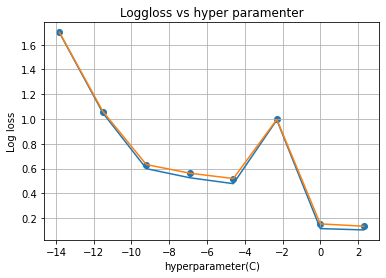

In [0]:
svm_model_tuning(x_true_meanresponse , y_true_meanResponse)

**From above graph i select my best C as 1**

*Testing of the model*

In [0]:
def svm_model_testing(var1,var2):
  """
  This function is used to create SVM and tune it
  """
  x_true=var1
  y_true=var2


  x_train,x_test,y_train,y_test=train_test_split(x_true,y_true,stratify=y_true,test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,stratify=y_train,test_size=0.2)



  
  print("The shape of the train n test vector as follows:")
  print(x_train.shape,y_train.shape)
  print(x_cv.shape,y_cv.shape)
  print(x_test.shape,y_test.shape)

  log_loss_train=[]
  log_loss_cv=[]
  log_loss_test=[]


  model=SVC(C=1,kernel='rbf',probability=True,class_weight='balanced')
  model.fit(x_train,y_train)
  
  clf=CalibratedClassifierCV(model,method='sigmoid',cv=5)
  clf.fit(x_train,y_train)

  pred_ytrain=clf.predict_proba(x_train)
  log_loss_train.append(log_loss(y_train,pred_ytrain,eps=1e-15))

  pred_ycv=clf.predict_proba(x_cv)
  log_loss_cv.append(log_loss(y_cv,pred_ycv,eps=1e-15))

  pred_ytest=clf.predict_proba(x_test)
  log_loss_test.append(log_loss(y_test,pred_ytest,eps=1e-15))


  print("The Logloss for {} the coresponding train loss is {}".format( 1,log_loss_train ))
  print("The Logloss for {} the coresponding cv loss is {}".format( 1,log_loss_cv ))
  print("The Logloss for {} the coresponding test loss is {}".format( 1,log_loss_test ))

  


In [0]:
svm_model_testing(x_true_meanresponse,y_true_meanResponse)

The shape of the train n test vector as follows:
(2124, 9) (2124,)
(532, 9) (532,)
(665, 9) (665,)
The Logloss for 1 the coresponding train loss is [0.13402600125222605]
The Logloss for 1 the coresponding cv loss is [0.1479095316786708]
The Logloss for 1 the coresponding test loss is [0.12267536305037746]


* we can say that model is not overfitting and underfitting by looking at the log loss we got.
Lets look at other featurisations as well


<p>2.Hashed coded vectors for variation feature<p>
We will use SVM rbf kernel and see the performance


In [0]:
# loading the dataset
hashedEncodedFeatureof_variation=pd.read_csv("/content/hashedEncodedFeatureof_variation.csv")

In [0]:
hashedEncodedFeatureof_variation=hashedEncodedFeatureof_variation.drop( columns = 'Unnamed: 0')
hashedEncodedFeatureof_variation.head()

0    1    2    3    4    5    6    7    8  Class
0 -1.0 -1.0  0.0 -8.0  5.0  0.0  0.0  0.0  1.0      1
1  1.0  0.0  0.0 -1.0  0.0 -1.0  0.0 -1.0  1.0      2
2  2.0  1.0  1.0  0.0  0.0 -1.0  0.0  0.0  0.0      2
3  0.0  0.0  0.0  1.0  0.0 -2.0  0.0  0.0  0.0      3
4  2.0  0.0  2.0  0.0  0.0  0.0 -1.0  0.0  0.0      4

In [0]:
x_hashed_true=hashedEncodedFeatureof_variation[['0','1','2','3','4','5','6','7','8']].values
y_hashed_true=hashedEncodedFeatureof_variation['Class'].values


**We will reuse the same svm functions we defiend earilier**


The shape of the train n test vector as follows:
(2124, 9) (2124,)
(532, 9) (532,)
(665, 9) (665,)


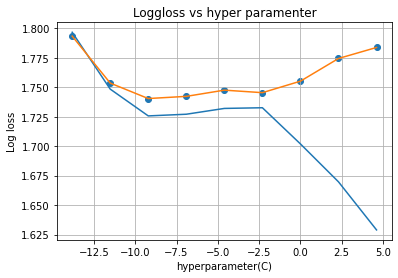

In [0]:
svm_model_tuning(x_hashed_true,y_hashed_true)

**from the above graph i can choose my C as 0.0001**

In [0]:
def svm_model_testing(var1,var2):
  """
  This function is used to create SVM and tune it
  """
  x_true=var1
  y_true=var2


  x_train,x_test,y_train,y_test=train_test_split(x_true,y_true,stratify=y_true,test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,stratify=y_train,test_size=0.2)



  
  print("The shape of the train n test vector as follows:")
  print(x_train.shape,y_train.shape)
  print(x_cv.shape,y_cv.shape)
  print(x_test.shape,y_test.shape)

  log_loss_train=[]
  log_loss_cv=[]
  log_loss_test=[]


  model=SVC(C=0.0001,kernel='rbf',probability=True,class_weight='balanced')
  model.fit(x_train,y_train)
  
  clf=CalibratedClassifierCV(model,method='sigmoid',cv=5)
  clf.fit(x_train,y_train)

  pred_ytrain=clf.predict_proba(x_train)
  log_loss_train.append(log_loss(y_train,pred_ytrain,eps=1e-15))

  pred_ycv=clf.predict_proba(x_cv)
  log_loss_cv.append(log_loss(y_cv,pred_ycv,eps=1e-15))

  pred_ytest=clf.predict_proba(x_test)
  log_loss_test.append(log_loss(y_test,pred_ytest,eps=1e-15))


  print("The Logloss for {} the coresponding train loss is {}".format( 0.0001,log_loss_train ))
  print("The Logloss for {} the coresponding cv loss is {}".format( 0.0001,log_loss_cv ))
  print("The Logloss for {} the coresponding test loss is {}".format( 0.0001,log_loss_test ))

  


In [0]:
svm_model_testing(x_hashed_true,y_hashed_true)

The shape of the train n test vector as follows:
(2124, 9) (2124,)
(532, 9) (532,)
(665, 9) (665,)
The Logloss for 0.0001 the coresponding train loss is [1.7335822874941234]
The Logloss for 0.0001 the coresponding cv loss is [1.753463388538884]
The Logloss for 0.0001 the coresponding test loss is [1.7599055604165221]


* we can say that model is not overfitting and underfitting by looking at the log loss we got.
Lets look at other featurisations as well


3.OneHotencoding of variation feature
<p> As this has high dimention lets use logistic regression<p>


In [0]:
#loading ds
oneHotEncodedfeaturesof_Variation=pd.read_csv("/content/oneHotEncodedfeaturesof_Variation.csv")
oneHotEncodedfeaturesof_Variation=oneHotEncodedfeaturesof_Variation.drop(columns='Unnamed: 0')
oneHotEncodedfeaturesof_Variation.head()

1_2009trunc  2010_2471trunc  ...  p61BRAF  Class
0          0.0             0.0  ...      0.0      1
1          0.0             0.0  ...      0.0      2
2          0.0             0.0  ...      0.0      2
3          0.0             0.0  ...      0.0      3
4          0.0             0.0  ...      0.0      4

[5 rows x 2997 columns]

In [0]:
oneHotEncodedfeaturesof_Variation.columns

Index(['1_2009trunc', '2010_2471trunc', '256_286trunc', '3' Deletion',
       '385_418del', '422_605trunc', '533_534del', '534_536del', '550_592del',
       '560_561insER',
       ...
       'Y901C', 'Y931C', 'Y98H', 'Y98N', 'YAP1-FAM118B Fusion',
       'YAP1-MAMLD1 Fusion', 'ZC3H7B-BCOR Fusion', 'ZNF198-FGFR1 Fusion',
       'p61BRAF', 'Class'],
      dtype='object', length=2997)

In [0]:
x_onehot_true=oneHotEncodedfeaturesof_Variation.iloc[:,0:2996].values

In [0]:
y_onehot_true=oneHotEncodedfeaturesof_Variation.Class.values

*LogisticModel*

In [0]:
def logistic_tune(var1,var2):
  """
  This function is used to create model and tune it to find best hyper parameter
  """
  x_true=var1
  y_true=var2


  x_train,x_test,y_train,y_test=train_test_split(x_true,y_true,stratify=y_true,test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,stratify=y_train,test_size=0.2)



  
  print("The shape of the train n test vector as follows:")
  print(x_train.shape,y_train.shape)
  print(x_cv.shape,y_cv.shape)
  print(x_test.shape,y_test.shape)

  log_loss_train=[]
  log_loss_cv=[]
  log_loss_test=[]

  hyperparameter=[0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10  ]



  for i in hyperparameter:
      
    model = LogisticRegression(penalty='l2',C= i,max_iter=1000 , class_weight='balanced' ,solver='lbfgs' )
    model.fit(x_train , y_train)
      
    
    clf=CalibratedClassifierCV(model,method='sigmoid',cv=5)
    clf.fit(x_train,y_train)

    pred_ytrain=clf.predict_proba(x_train)
    log_loss_train.append(log_loss(y_train,pred_ytrain , eps=1e-15))

    pred_ycv=clf.predict_proba(x_cv)
    log_loss_cv.append(log_loss(y_cv,pred_ycv,eps=1e-15))

  plt.plot(np.log(hyperparameter) , log_loss_train)
  plt.plot(np.log(hyperparameter), log_loss_cv)
  plt.scatter(np.log(hyperparameter),log_loss_cv)
  plt.title("Loggloss vs hyper paramenter")
  plt.xlabel("hyperparameter(C)")
  plt.ylabel("Log loss")
  plt.grid()
  return(plt.show())



  

The shape of the train n test vector as follows:
(2124, 2996) (2124,)
(532, 2996) (532,)
(665, 2996) (665,)


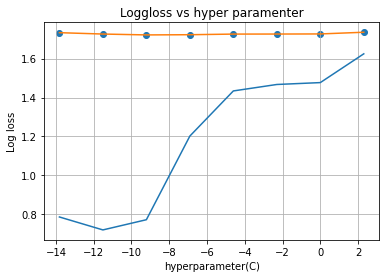

In [0]:
logistic_tune(x_onehot_true,y_onehot_true)

**From the above graph i can choos aplha as 0.01**

*Testing model*

In [0]:
def logistic_test(var1,var2):
  """
  This function is used to create model and tune it to find best hyper parameter
  """
  x_true=var1
  y_true=var2


  x_train,x_test,y_train,y_test=train_test_split(x_true,y_true,stratify=y_true,test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,stratify=y_train,test_size=0.2)



  
  print("The shape of the train n test vector as follows:")
  print(x_train.shape,y_train.shape)
  print(x_cv.shape,y_cv.shape)
  print(x_test.shape,y_test.shape)

  log_loss_train=[]
  log_loss_cv=[]
  log_loss_test=[]

  
  model = LogisticRegression(penalty='l2',C=0.01,max_iter=1000 , class_weight='balanced' ,solver='lbfgs' )
  model.fit(x_train , y_train)
      
  
  clf=CalibratedClassifierCV(model,method='sigmoid',cv=5)
  clf.fit(x_train,y_train)

  pred_ytrain=clf.predict_proba(x_train)
  log_loss_train.append(log_loss(y_train,pred_ytrain , eps=1e-15))

  pred_ycv=clf.predict_proba(x_cv)
  log_loss_cv.append(log_loss(y_cv,pred_ycv,eps=1e-15))

  pred_ytest=clf.predict_proba(x_test)
  log_loss_test.append(log_loss(y_test,pred_ytest , eps=1e-15))



  print("The Logloss for {} the coresponding train loss is {}".format( 0.01,log_loss_train ))
  print("The Logloss for {} the coresponding cv loss is {}".format( 0.01,log_loss_cv ))
  print("The Logloss for {} the coresponding test loss is {}".format( 0.01,log_loss_test ))

In [0]:
logistic_test(x_onehot_true,y_onehot_true)

The shape of the train n test vector as follows:
(2124, 2996) (2124,)
(532, 2996) (532,)
(665, 2996) (665,)
The Logloss for 0.01 the coresponding train loss is [1.4238762684713966]
The Logloss for 0.01 the coresponding cv loss is [1.744474382727282]
The Logloss for 0.01 the coresponding test loss is [1.7380242209450858]


* we can say that model is not overfitting and underfitting by looking at the log loss we got.
Lets compare all of them

* Lets compare all observations on Variation Feature


In [0]:
table=PrettyTable()

table.field_names=["Feature Name" , "Featurisation Used" ,"Model","HyperParameter", " train Logloss"," Cv Logloss","test Logloss"]

table.add_row(["Variation","FeatureHaser","SVM-kernel-RBF",0.0001,1.7335,1.7534,1.7599])
table.add_row(["Variation","MeanResponseCoding","SVM-kernel-RBF",1,0.1340,0.1479,0.1479])
table.add_row(["Variation","OneHotEncoding","LogisticRegression",0.01,1.4238,1.7444,1.7380])
print(table)


+--------------+--------------------+--------------------+----------------+----------------+-------------+--------------+
| Feature Name | Featurisation Used |       Model        | HyperParameter |  train Logloss |  Cv Logloss | test Logloss |
+--------------+--------------------+--------------------+----------------+----------------+-------------+--------------+
|  Variation   |    FeatureHaser    |   SVM-kernel-RBF   |     0.0001     |     1.7335     |    1.7534   |    1.7599    |
|  Variation   | MeanResponseCoding |   SVM-kernel-RBF   |       1        |     0.134      |    0.1479   |    0.1479    |
|  Variation   |   OneHotEncoding   | LogisticRegression |      0.01      |     1.4238     |    1.7444   |    1.738     |
+--------------+--------------------+--------------------+----------------+----------------+-------------+--------------+


* From the above table we can say that kernel svm perfomed good for mean response features im sure it will have performed well for hashed features as well.

<p style="font-size:18px;"> <b>Q6.</b> Is the Variation feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

<h3>3.1.4 Analysing of Text Feature<h3>

<p>Q1.What kind of feature is Text<p>


It is sentance corpus consisting of many sentances.

<p>Q2.how can we featurise it <p>
There are many ways we will work with these two
1.BOW
2.TFIDF


**1.Featurising with bow**


In [0]:
df.head()

ID    Gene  ... Class                                       Cleaned_text
0   0  FAM58A  ...     1  cyclin dependent kinases cdks regulate variety...
1   1     CBL  ...     2  abstract background non small cell lung cancer...
2   2     CBL  ...     2  abstract background non small cell lung cancer...
3   3     CBL  ...     3  recent evidence demonstrated acquired uniparen...
4   4     CBL  ...     4  oncogenic mutations monomeric casitas b lineag...

[5 rows x 5 columns]

In [0]:
bow_df=df

In [0]:
bow_df=bow_df.drop(columns=['ID','Gene','Class','Variation'])

In [0]:
array_input=bow_df.Cleaned_text.values

In [0]:
bow_ds=df

In [0]:
vectoriser=CountVectorizer(ngram_range=(1,2),min_df=3,max_features=5000)


In [0]:
tf=vectoriser.fit(array_input)

In [0]:
# contains feature names and their index numbers at what positions they are in the feature names vector
vocab_countVectoriser=(tf.vocabulary_)


In [0]:
 vocab_countVectoriser.items()

dict_items([('cyclin', 1076), ('dependent', 1159), ('kinases', 2421), ('regulate', 3825), ('variety', 4877), ('cellular', 708), ('processes', 3572), ('cdk', 644), ('one', 3189), ('last', 2471), ('activating', 74), ('identified', 2146), ('kinase', 2409), ('activity', 91), ('revealed', 3955), ('previous', 3534), ('work', 4968), ('shown', 4146), ('silencing', 4185), ('increases', 2232), ('et', 1515), ('ets', 1519), ('virus', 4906), ('oncogene', 3182), ('homolog', 2094), ('activation', 77), ('mapk', 2663), ('pathway', 3286), ('confers', 916), ('resistance', 3906), ('breast', 535), ('cancer', 563), ('cells', 676), ('precise', 3501), ('mechanisms', 2721), ('generally', 1894), ('functions', 1838), ('remain', 3848), ('demonstrate', 1147), ('identifying', 2151), ('product', 3576), ('whose', 4951), ('mutations', 2953), ('cause', 631), ('syndrome', 4482), ('human', 2117), ('developmental', 1207), ('features', 1670), ('include', 2221), ('renal', 3859), ('show', 4142), ('associated', 339), ('mutant

In [0]:
featurenamesforbow=vectoriser.get_feature_names()

In [0]:
featurenamesforbow

['aa',
 'aacrjournals',
 'aacrjournals org',
 'ab',
 'abbreviations',
 'abc',
 'abd',
 'aberrant',
 'aberrant splicing',
 'aberrations',
 'abi',
 'ability',
 'ability bind',
 'ability induce',
 'abl',
 'able',
 'abnormal',
 'abnormalities',
 'abolish',
 'abolished',
 'abrogate',
 'abrogated',
 'absence',
 'absent',
 'absolute',
 'abstract',
 'abundance',
 'abundant',
 'ac',
 'acc',
 'accelerated',
 'accepted',
 'acceptor',
 'access',
 'access image',
 'accessible',
 'accessible alternative',
 'accession',
 'accompanied',
 'accordance',
 'according',
 'according manufacturer',
 'accordingly',
 'account',
 'accounts',
 'accumulation',
 'acetate',
 'acetylation',
 'achieve',
 'achieved',
 'acid',
 'acid change',
 'acid changes',
 'acid residue',
 'acid residues',
 'acid sequence',
 'acid substitution',
 'acid substitutions',
 'acidic',
 'acids',
 'acquired',
 'acquired resistance',
 'acquisition',
 'acral',
 'across',
 'act',
 'actin',
 'acting',
 'action',
 'activate',
 'activate transcr

In [0]:
array_transformed=vectoriser.transform(array_input)

In [0]:
array_transformedone=array_transformed.toarray()

In [0]:
dataframofBowForText=pd.DataFrame(array_transformedone ,columns=featurenamesforbow )

In [0]:
dataframofBowForText=pd.concat([dataframofBowForText , df['Class']] , axis=1)

In [0]:
dataframofBowForText.head()

aa  aacrjournals  aacrjournals org  ab  ...  zhang  zinc  zn  Class
0   0             0                 0   1  ...      0     0   0      1
1   0             0                 0   0  ...      0     0   0      2
2   0             0                 0   0  ...      0     0   0      2
3   0             0                 0   0  ...      0     0   0      3
4   0             0                 0   1  ...      0     0  10      4

[5 rows x 5001 columns]

In [0]:
dataframofBowForText.to_csv("datafraneofBowTextFeature.csv")

<p>2.TFIDF featurisation of text data<p>


In [0]:
df.head()

ID    Gene  ... Class                                       Cleaned_text
0   0  FAM58A  ...     1  cyclin dependent kinases cdks regulate variety...
1   1     CBL  ...     2  abstract background non small cell lung cancer...
2   2     CBL  ...     2  abstract background non small cell lung cancer...
3   3     CBL  ...     3  recent evidence demonstrated acquired uniparen...
4   4     CBL  ...     4  oncogenic mutations monomeric casitas b lineag...

[5 rows x 5 columns]

In [0]:
tfidf_df=df
tfidf_ds=df

In [0]:
tfidf_df=tfidf_df.drop(columns=['ID','Gene','Variation','Class'])


In [0]:
tfidf_df

Cleaned_text
0     cyclin dependent kinases cdks regulate variety...
1     abstract background non small cell lung cancer...
2     abstract background non small cell lung cancer...
3     recent evidence demonstrated acquired uniparen...
4     oncogenic mutations monomeric casitas b lineag...
...                                                 ...
3316  introduction myelodysplastic syndromes mds het...
3317  introduction myelodysplastic syndromes mds het...
3318  runt related transcription factor gene runx al...
3319  runx gene frequent target chromosomal transloc...
3320  frequent mutations associated leukemia recurre...

[3321 rows x 1 columns]

In [0]:
array_input_tfidf=tfidf_df['Cleaned_text'].values

In [0]:
vectorizer=TfidfVectorizer(ngram_range=(1,2),min_df=3,max_features=1000)

In [0]:
vectorizer.fit(array_input_tfidf)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1000,
                min_df=3, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
len(vectorizer.vocabulary_)

1000

In [0]:
featurenames_tfidf=vectorizer.get_feature_names()

In [0]:
tfidf_vocab=vectorizer.vocabulary_

In [0]:
transformed_tfidf_csr=vectorizer.transform(array_input_tfidf)

In [0]:
transformed_tfidf_csr=transformed_tfidf_csr.toarray()

In [0]:
arr=pd.DataFrame(transformed_tfidf_csr ,columns=featurenames_tfidf)

In [0]:
tfidf_textfeature=pd.concat([arr,df["Class"]],axis=1)

In [0]:
tfidf_textfeature.to_csv("tfidf_textfeatures.csv")

In [0]:
tfidf_textfeature

aberrant   ability       abl  ...     yeast       yet  Class
0     0.007393  0.002483  0.000000  ...  0.017848  0.005846      1
1     0.000000  0.000000  0.007145  ...  0.000000  0.006669      2
2     0.000000  0.000000  0.007145  ...  0.000000  0.006669      2
3     0.008309  0.002790  0.015838  ...  0.000000  0.000000      3
4     0.000000  0.003513  0.000000  ...  0.000000  0.002068      4
...        ...       ...       ...  ...       ...       ...    ...
3316  0.000000  0.006259  0.000000  ...  0.000000  0.000000      4
3317  0.000000  0.006038  0.000000  ...  0.000000  0.000000      1
3318  0.000000  0.001136  0.000000  ...  0.000000  0.001337      1
3319  0.000000  0.000000  0.000000  ...  0.000000  0.006936      4
3320  0.000000  0.002173  0.000000  ...  0.000000  0.003837      4

[3321 rows x 1001 columns]

<p> Q3. Is this Bow,tfidf for text feature Useful in our classification?<p>


Lets find out by tsne and one simple model.

* TSNE for BOW  TEXT Feature

In [0]:
x_std=dataframofBowForText.iloc[:, 0:5000].values

In [0]:
y_true_std=dataframofBowForText.Class.values

In [0]:
#Standardising before apply tsne

stdnd=StandardScaler()
data=stdnd.fit_transform(x_std)

In [0]:
intialisetsne=TSNE(n_components=2,perplexity=30.0,n_iter=500,n_jobs=-1,random_state=0)
tsne_data=intialisetsne.fit_transform(data)
concatinated_df=pd.concat([pd.DataFrame(tsne_data , columns=["Dim1","Dim2"])  , df["Class"]],axis=1)

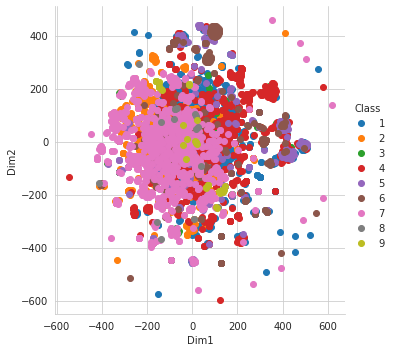

In [0]:
intialisetsne=TSNE(n_components=2,perplexity=40.0,n_iter=5000,n_jobs=-1,random_state=0)
tsne_data=intialisetsne.fit_transform(data)
concatinated_df10=pd.concat([pd.DataFrame(tsne_data , columns=["Dim1","Dim2"])  , df["Class"]],axis=1)
sns.set_style("whitegrid")
sns.FacetGrid(concatinated_df10,hue='Class',height=5)\
    .map(plt.scatter , 'Dim1' , 'Dim2')\
    .add_legend()
plt.show() 

*we cant analyse by seeing this much but i think they may be seperated in high diemension, As of now i can see that class7 and class 4 are grouped near to thier neighbours well*

**Tsne for TFIDF data**

In [0]:
x_tfidf_true=tfidf_textfeature.iloc[:, 0:5000].values

In [0]:
y_tfidf_true=tfidf_textfeature.Class.values

In [0]:
#Standardising before apply tsne

stdnd=StandardScaler()
data=stdnd.fit_transform(x_tfidf_true)


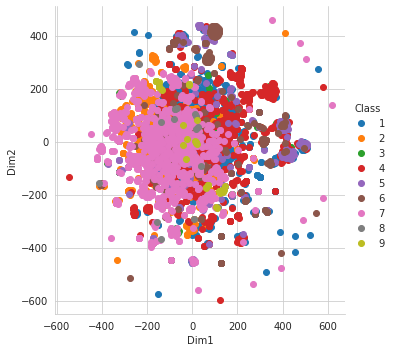

In [0]:
intialisetsne=TSNE(n_components=2,perplexity=40.0,n_iter=5000,n_jobs=-1,random_state=0)
tsne_data=intialisetsne.fit_transform(data)
concatinated_df12=pd.concat([pd.DataFrame(tsne_data , columns=["Dim1","Dim2"])  , df["Class"]],axis=1)
sns.set_style("whitegrid")
sns.FacetGrid(concatinated_df12,hue='Class',height=5)\
    .map(plt.scatter , 'Dim1' , 'Dim2')\
    .add_legend()
plt.show() 

*we cant analyse by seeing this much but i think they may be seperated in high diemension, As of now i can see that class7 and class 4 are grouped near to thier neighbours well*

**Lets do analisys based on models for the two featurisations and compare the results**

**Lets go with simple model like logistic regression for high dimension data**

* 1.BOW Feature for text

In [0]:
def oneHot_Logsitic(var1,var2):
  """
  This function is use to build n hyperparamater tune SVM
  """
  X = var1
  y_true = var2

  x_train,x_test,y_train,y_test=train_test_split(X , y_true , stratify=y_true , test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train , stratify=y_train , test_size=0.2)

  print ( x_train.shape,y_train.shape)
  print( x_cv.shape,y_cv.shape)
  print(x_test.shape,y_test.shape)

  #Svm HyperTuning
  logLoss_train=[ ]
  logLoss_cv=[ ]
  c = [0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10 ]
  for i in c:
        clf_SGD=SGDClassifier(loss='log',penalty='l2',alpha=i,class_weight='balanced')
        clf_SGD.fit(x_train,y_train)
        
        calibrated = CalibratedClassifierCV(clf_SGD, method='sigmoid', cv=5)
        calibrated.fit(x_train , y_train)
        
        predict_y = calibrated.predict_proba(x_train)
        predict_y2 = calibrated.predict_proba(x_cv)
        
        logLoss_train.append(log_loss(y_train,predict_y, eps=1e-15))
        
        logLoss_cv.append(log_loss(y_cv,predict_y2, eps=1e-15))
        
        

        

        

        
    #plt.plot((c), train_auc, label='Train AUC')
    #plt.plot((c), cv_auc, label='CV AUC')

  plt.plot(np.log(c), logLoss_train, label='Train logloss')
  plt.plot(np.log(c), logLoss_cv, label='CV logloss')

  plt.scatter(np.log(c), logLoss_cv, label='CV AUC')
  plt.legend()

  plt.xlabel("C: hyperparameter")
  plt.ylabel("LogLoss")
  plt.title("ERROR PLOTS")
  return(plt.show())



  







(2124, 5000) (2124,)
(532, 5000) (532,)
(665, 5000) (665,)


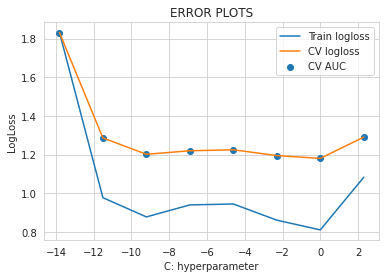

In [0]:
oneHot_Logsitic( data,y_true_std)

**this one was with standardised data**

(2124, 5000) (2124,)
(532, 5000) (532,)
(665, 5000) (665,)


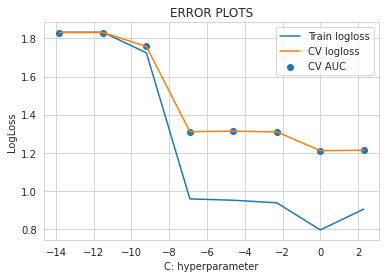

In [0]:
oneHot_Logsitic( x_std,y_true_std)

**this one is without standardised data**

**from the graphs i can take my alpha as 0.001**

*Testing on test datasets*

In [0]:
def logistic_test(var1,var2):
  """
  This function is used to create model and tune it to find best hyper parameter
  """
  x_true=var1
  y_true=var2


  x_train,x_test,y_train,y_test=train_test_split(x_true,y_true,stratify=y_true,test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,stratify=y_train,test_size=0.2)



  
  print("The shape of the train n test vector as follows:")
  print(x_train.shape,y_train.shape)
  print(x_cv.shape,y_cv.shape)
  print(x_test.shape,y_test.shape)

  log_loss_train=[]
  log_loss_cv=[]
  log_loss_test=[]

  
  model = LogisticRegression(penalty='l2',C=0.001,max_iter=1000 , class_weight='balanced' ,solver='newton-cg' )
  model.fit(x_train , y_train)
      
  
  clf=CalibratedClassifierCV(model,method='sigmoid',cv=5)
  clf.fit(x_train,y_train)

  pred_ytrain=clf.predict_proba(x_train)
  log_loss_train.append(log_loss(y_train,pred_ytrain , eps=1e-15))

  pred_ycv=clf.predict_proba(x_cv)
  log_loss_cv.append(log_loss(y_cv,pred_ycv,eps=1e-15))

  pred_ytest=clf.predict_proba(x_test)
  log_loss_test.append(log_loss(y_test,pred_ytest , eps=1e-15))



  print("The Logloss for {} the coresponding train loss is {}".format( 0.001,log_loss_train ))
  print("The Logloss for {} the coresponding cv loss is {}".format( 0.001,log_loss_cv ))
  print("The Logloss for {} the coresponding test loss is {}".format( 0.001,log_loss_test ))

In [0]:
logistic_test(x_std,y_true_std)

The shape of the train n test vector as follows:
(2124, 5000) (2124,)
(532, 5000) (532,)
(665, 5000) (665,)
The Logloss for 0.001 the coresponding train loss is [1.0724656346673704]
The Logloss for 0.001 the coresponding cv loss is [1.2723948073040368]
The Logloss for 0.001 the coresponding test loss is [1.3034431218014317]


**Above is result on normal data**

In [0]:
logistic_test(data,y_true_std)

The shape of the train n test vector as follows:
(2124, 5000) (2124,)
(532, 5000) (532,)
(665, 5000) (665,)
The Logloss for 0.001 the coresponding train loss is [0.9441582057917238]
The Logloss for 0.001 the coresponding cv loss is [1.210222073584811]
The Logloss for 0.001 the coresponding test loss is [1.1539667998430334]


**Above is Result on standardised data**

* we can say that model is not overfitting and underfitting by looking at the log loss we got.Yes this type of featurisation is useful in our objective
Lets look at other featurisations as well.

* 2.TFIDF feauture for text

*Using Logisticmodels we bult for previous cases*


**Tuning**

(2124, 5000) (2124,)
(532, 5000) (532,)
(665, 5000) (665,)


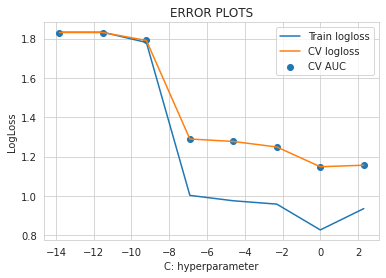

In [0]:
oneHot_Logsitic(x_tfidf_true,y_tfidf_true)

**this one was without standardised data**

(2124, 5000) (2124,)
(532, 5000) (532,)
(665, 5000) (665,)


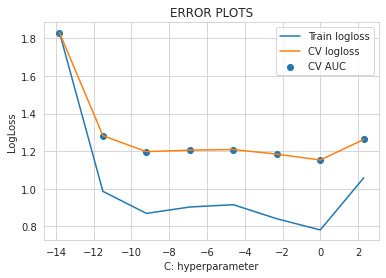

In [0]:
oneHot_Logsitic(data,y_tfidf_true)

**this one was with standardised data**

**From the graphs i can select my alpha as 0.001**

*Lets Test the model*

**without standardised data**

In [0]:
logistic_test(x_tfidf_true,y_tfidf_true)

The shape of the train n test vector as follows:
(2124, 5000) (2124,)
(532, 5000) (532,)
(665, 5000) (665,)
The Logloss for 0.001 the coresponding train loss is [1.0655639055266641]
The Logloss for 0.001 the coresponding cv loss is [1.287554414069922]
The Logloss for 0.001 the coresponding test loss is [1.2673057224719144]


**with standardised data**

In [0]:
logistic_test(data,y_tfidf_true)

The shape of the train n test vector as follows:
(2124, 5000) (2124,)
(532, 5000) (532,)
(665, 5000) (665,)
The Logloss for 0.001 the coresponding train loss is [0.9062325983187661]
The Logloss for 0.001 the coresponding cv loss is [1.154476481391309]
The Logloss for 0.001 the coresponding test loss is [1.2146295572433117]


<h4>Observations of Text featureised models with Standardised data only<h4>

In [0]:
table=PrettyTable()

table.field_names=["Feature Name" , "Featurisation Used" ,"Model","HyperParameter", " train Logloss"," Cv Logloss","test Logloss"]

table.add_row(["Text","TFIDF","Logistic",0.001,0.944,1.210,1.153])
table.add_row(["Text","BOW","Logistic",0.001,0.906,1.544,1.214])
print(table)


+--------------+--------------------+----------+----------------+----------------+-------------+--------------+
| Feature Name | Featurisation Used |  Model   | HyperParameter |  train Logloss |  Cv Logloss | test Logloss |
+--------------+--------------------+----------+----------------+----------------+-------------+--------------+
|     Text     |       TFIDF        | Logistic |     0.001      |     0.944      |     1.21    |    1.153     |
|     Text     |        BOW         | Logistic |     0.001      |     0.906      |    1.544    |    1.214     |
+--------------+--------------------+----------+----------------+----------------+-------------+--------------+


**TFIDF Featurisation is more sensible comparitively than BOW featurisation**

<p>Q4.Are these Features stable accross all data sets?<p>


Yes,because there is no much difference in  cv n test log loss.

<p>Now we have all the vectors lets go for modelling<p>

<h2>4.0 Modelling <h2>

###4.1 Creating Miscellenous Functions

<h3>Confusion Matrix,Precision,Recall<h3>

In [0]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

   
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

**Loading the df and manupulating**

In [0]:
#Loading the data sets

#Gene DF
gene_vector_meanResponse=pd.read_csv("/content/FinalMeanResponseVectorsOfGene.csv")
gene_vector_Hashing=pd.read_csv("/content/finalFeatureHashedFeaturesOfGene.csv")
gene_vector_oneHot=pd.read_csv("/content/finalOneHotEncodedFeaturesOfGene.csv")

#Variation DF
variation_df_meanResponse=pd.read_csv("/content/meanResponseCoding_variationFeature.csv")
variation_df_oneHot=pd.read_csv("/content/oneHotEncodedfeaturesof_Variation.csv")
variation_df_featureHashing=pd.read_csv("/content/hashedEncodedFeatureof_variation.csv")


#Text DF
text_df_tfidf=pd.read_csv("/content/tfidf_textfeatures.csv")
text_df_bow=pd.read_csv("/content/datafraneofBowTextFeature.csv")

#originalDF
df=pd.read_csv("/content/OriginalDFWithCleanedTextPresent.csv")

In [6]:
variation_df_featureHashing.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', 'Class'], dtype='object')

In [0]:
gene_vector_meanResponse=gene_vector_meanResponse.drop(columns=['Unnamed: 0','Class'])
gene_vector_oneHot=gene_vector_oneHot.drop(columns=['Unnamed: 0','Class'])
gene_vector_Hashing=gene_vector_Hashing.drop(columns=['Unnamed: 0','Class'])

variation_df_meanResponse=variation_df_meanResponse.drop(columns=['Unnamed: 0','Class'])
variation_df_oneHot=variation_df_oneHot.drop(columns=['Unnamed: 0','Class'])
variation_df_featureHashing=variation_df_featureHashing.drop(columns=['Unnamed: 0','Class'])

text_df_bow=text_df_bow.drop(columns=['Unnamed: 0','Class'])
text_df_tfidf=text_df_tfidf.drop(columns=['Unnamed: 0','Class'])

df=df.drop(columns=['Unnamed: 0'])


In [8]:
gene_vector_meanResponse.columns
variation_df_meanResponse.columns
text_df_tfidf.columns

Index(['aberrant', 'ability', 'abl', 'able', 'absence', 'according', 'acid',
       'acids', 'acquired', 'across',
       ...
       'whole', 'wild', 'wild type', 'will', 'within', 'without', 'wt',
       'years', 'yeast', 'yet'],
      dtype='object', length=1000)

In [0]:
#Creating Dataframes for our reqirement

#1.(gene meanResponse + variation meanResponse +  text tfidf(uniPlusbigram with top 1k words)) standardised version
#2.gene OneHot + variation onehot + (text bow(uniPlusBigram(5kwords))) standardised version
#3.(gene meanResponse + variation meanResponse + text bow(uniPlusBigram(5kwords)) standardised version
#4.gene onehot + variation onehot + (tiidf text(uniplusbigramwith1kwords)) standardised
#5.(gene featurehashed + variation featureHashed + text bow(uniPlusBigram(5kwords)) Standardised version
#6.(gene featurehashed + variation featureHashed + text tfidf(uniPlusBigram(1kwords)) Standardised version
#and many more combinations can be done,, we will focus mailny on tfidf version and mean response 
##coding and featurehashing for one baseline model and do other models with tfidf meanResponse vectors  
### srikanth sir perfomed the onehot encoding n bow(unigrams) in video lectures.


####1.(gene meanResponse + variation meanResponse +  text tfidf) standardised version dataset

In [0]:
gene_var_text_meanTdidf=pd.concat([gene_vector_meanResponse,variation_df_meanResponse,text_df_tfidf],axis=1)

In [0]:
withoutstd_gene_var_text_meanTdidf=pd.concat([gene_vector_meanResponse,variation_df_meanResponse,text_df_tfidf,df['Class']],axis=1)

In [0]:
gene_var_text_meanTdidf_colums=gene_var_text_meanTdidf.columns

In [0]:
strndzn=StandardScaler()

In [0]:
std_gene_var_text_meanTdidf=strndzn.fit_transform(gene_var_text_meanTdidf)

In [0]:
std_gene_var_text_meanTdidf=pd.concat([pd.DataFrame(std_gene_var_text_meanTdidf,columns=gene_var_text_meanTdidf_colums),df["Class"]],axis=1)

In [16]:
std_gene_var_text_meanTdidf

0         1         2  ...     yeast       yet  Class
0    -0.051316 -0.079307  1.060311  ...  0.205134  0.599335      1
1    -0.280827 -0.167630  0.464136  ... -0.280409  0.777698      2
2    -0.280827 -0.167630  0.464136  ... -0.280409  0.777698      2
3    -0.280827 -0.167630  0.464136  ... -0.280409 -0.667276      3
4    -0.280827 -0.167630  0.464136  ... -0.280409 -0.219152      4
...        ...       ...       ...  ...       ...       ...    ...
3316  0.097234 -0.432626  0.131969  ... -0.280409 -0.667276      4
3317  0.097234 -0.432626  0.131969  ... -0.280409 -0.667276      1
3318  0.097234 -0.432626  0.131969  ... -0.280409 -0.377515      1
3319  0.097234 -0.432626  0.131969  ... -0.280409  0.835527      4
3320  0.097234 -0.432626  0.131969  ... -0.280409  0.164191      4

[3321 rows x 1019 columns]

In [0]:
std_gene_var_text_meanTdidf.to_csv("gvt_mt_final.csv")

####2.(gene onehot + variation onehot + (tiidf text(uniplusbigramwith1kwords)) standardised

In [0]:
gene_vector_oneHot,variation_df_oneHot,text_df_tfidf


In [0]:
clmns=text_df_tfidf.columns

In [0]:
text_stdr=strndzn.fit_transform(text_df_tfidf)

In [0]:
df1=pd.DataFrame(text_stdr,columns=clmns)

In [0]:
std_gene_var_text_onehottifidf=pd.concat([gene_vector_oneHot,variation_df_oneHot,df1,df['Class']],axis=1)

In [0]:
without_std_gene_var_text_onehottifidf=pd.concat([gene_vector_oneHot,variation_df_oneHot,text_df_tfidf,df["Class"]],axis=1)

In [0]:
std_gene_var_text_onehottifidf.to_csv('gvt_ot_final.csv')

In [21]:
std_gene_var_text_onehottifidf

ABL1  ACVR1  AGO2  AKT1  ...     years     yeast       yet  Class
0      0.0    0.0   0.0   0.0  ... -0.344039  0.205134  0.599335      1
1      0.0    0.0   0.0   0.0  ... -0.219060 -0.280409  0.777698      2
2      0.0    0.0   0.0   0.0  ... -0.219060 -0.280409  0.777698      2
3      0.0    0.0   0.0   0.0  ...  0.025344 -0.280409 -0.667276      3
4      0.0    0.0   0.0   0.0  ... -0.227761 -0.280409 -0.219152      4
...    ...    ...   ...   ...  ...       ...       ...       ...    ...
3316   0.0    0.0   0.0   0.0  ... -0.344039 -0.280409 -0.667276      4
3317   0.0    0.0   0.0   0.0  ... -0.344039 -0.280409 -0.667276      1
3318   0.0    0.0   0.0   0.0  ... -0.268853 -0.280409 -0.377515      1
3319   0.0    0.0   0.0   0.0  ...  0.045903 -0.280409  0.835527      4
3320   0.0    0.0   0.0   0.0  ... -0.128293 -0.280409  0.164191      4

[3321 rows x 4261 columns]

###3.gene featurehashed + variation featureHashed + text tfidf(uniPlusBigram(1kwords) Standardised version

In [0]:
gene_vector_Hashing,variation_df_featureHashing,text_df_tfidf

In [0]:
std_gene_var_text_hashingtfidf=pd.concat([gene_vector_Hashing,variation_df_featureHashing,df1,df['Class']],axis=1)


In [0]:
std_gene_var_text_hashingtfidf.to_csv('gvt_ht.csv')


In [24]:
std_gene_var_text_hashingtfidf

0    1    2    3    4  ...        wt     years     yeast       yet  Class
0     0.0  2.0  0.0  0.0  1.0  ...  0.173741 -0.344039  0.205134  0.599335      1
1     0.0  0.0 -1.0 -1.0  0.0  ... -0.160639 -0.219060 -0.280409  0.777698      2
2     0.0  0.0 -1.0 -1.0  0.0  ... -0.160639 -0.219060 -0.280409  0.777698      2
3     0.0  0.0 -1.0 -1.0  0.0  ... -0.233922  0.025344 -0.280409 -0.667276      3
4     0.0  0.0 -1.0 -1.0  0.0  ... -0.441298 -0.227761 -0.280409 -0.219152      4
...   ...  ...  ...  ...  ...  ...       ...       ...       ...       ...    ...
3316  1.0 -1.0  0.0  0.0  0.0  ...  0.605370 -0.344039 -0.280409 -0.667276      4
3317  1.0 -1.0  0.0  0.0  0.0  ...  0.905036 -0.344039 -0.280409 -0.667276      1
3318  1.0 -1.0  0.0  0.0  0.0  ... -0.441298 -0.268853 -0.280409 -0.377515      1
3319  1.0 -1.0  0.0  0.0  0.0  ... -0.392649  0.045903 -0.280409  0.835527      4
3320  1.0 -1.0  0.0  0.0  0.0  ... -0.387465 -0.128293 -0.280409  0.164191      4

[3321 rows x 1019 columns]


Now we have our data sets lets perform modelling.

Datasets info:-

* gene (onehot encoded) + variation (oneHot encoded) +text(tfidf-Bigrams)

* gene(meanResponse encoded) + variation (meanResponse encoded) + text(tfidf-Bigrams)

* gene(hashed) + variation(hashed) + text(tfidf-Bigrams)
we will use this hashed feature for upcomming models.but not for naive bayes because it doesnt calculate -ve probabilities.





**Lets Create  Models**
<h3>4.1 NaiveBayes Model<h3>



DatasetsUsedHere:- 
* gene (onehot encoded) + variation (oneHot encoded) +text(tfidf-Bigrams)

* gene(meanResponse encoded) + variation (meanResponse encoded) + text(tfidf-Bigrams)

* gene(hashed) + variation(hashed) + text(tfidf-Bigrams)


#####A. gene (onehot encoded) + variation (oneHot encoded) +text(tfidf-Bigrams)

In [0]:
varA_NB=without_std_gene_var_text_onehottifidf.iloc[:,0:4260].values
varB_NB=without_std_gene_var_text_onehottifidf.Class.values

In [0]:
from collections import Counter
Counter(varB_NB)

Counter({1: 568, 2: 452, 3: 89, 4: 686, 5: 242, 6: 275, 7: 953, 8: 19, 9: 37})

In [0]:
def naiveBayesTunning(var1,var2):
  """
  This function is used to tune naiveBayes Model on data and find right Hyper parameter
  """

  X=var1
  Y=var2

  #Splitting the data

  x_train,x_test,y_train,y_test=train_test_split(X,Y, stratify=Y ,test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train, stratify=y_train ,test_size=0.2)

  #hyperTuning
  train_logloss = []
  cv_logloss = []
  test_logloss = []
  Alpha = [0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10 , 100 , 1000 , 10000 , 100000]
  for i in Alpha:

    MNB = MultinomialNB(alpha=i)
    MNB.fit(x_train, y_train)
    
    sig_clf = CalibratedClassifierCV(MNB, method="sigmoid")
    sig_clf.fit(x_train,y_train)

    y_train_pred =  sig_clf.predict_proba(x_train)
    y_cv_pred =  sig_clf.predict_proba(x_cv)
    #y_test_pred = sig_clf.predict_proba(x_test)
   
    train_logloss.append( log_loss(y_train,y_train_pred,eps=1e-15))
    cv_logloss.append(log_loss(y_cv,y_cv_pred,eps=1e-15))
    #test_logloss.append(log_loss(y_test,y_test_pred,eps=1e-15))
    
    
  plt.plot(np.log(Alpha), train_logloss, label='Train Logloss')
  plt.plot(np.log(Alpha), cv_logloss ,label='CV logloss')
  plt.legend()
  plt.scatter(np.log(Alpha),cv_logloss , label='CV logloss')
  plt.xlabel("log(alpha)")
  plt.ylabel("logloss")
  plt.title("ERROR PLOTS")
  return(plt.show())



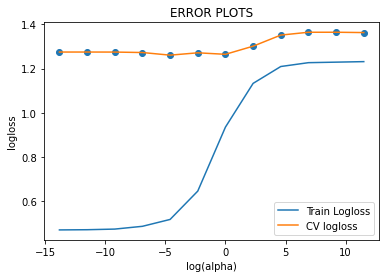

In [0]:
naiveBayesTunning(varA_NB,varB_NB)


**From the above graph i can take my alpha value as 1.**

In [0]:
def naiveBayesTesting_(var1,var2):
  """
  This function is used to tune naiveBayes Model on data and find right Hyper parameter
  """

  X=var1
  Y=var2

  #Splitting the data

  x_train,x_test,y_train,y_test=train_test_split(X,Y, stratify=Y ,test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train, stratify=y_train ,test_size=0.2)

  #hyperTuning
  train_logloss = []
  cv_logloss = []
  test_logloss = []
  
  MNB = MultinomialNB(alpha=1)
  MNB.fit(x_train, y_train)
  
  sig_clf = CalibratedClassifierCV(MNB, method="sigmoid")
  sig_clf.fit(x_train,y_train)

  y_train_pred =  sig_clf.predict_proba(x_train)
  y_cv_pred =  sig_clf.predict_proba(x_cv)
  y_test_pred = sig_clf.predict_proba(x_test)

  train_logloss.append( log_loss(y_train,y_train_pred,eps=1e-15))
  cv_logloss.append(log_loss(y_cv,y_cv_pred,eps=1e-15))
  test_logloss.append(log_loss(y_test,y_test_pred,eps=1e-15))

  print("The  hyper parameter and logloss for Train data are :{} and {}".format(1,train_logloss))
  print("The  hyper parameter and logloss for Train data are :{} and {}".format(1,cv_logloss))
  print("The  hyper parameter and logloss for Train data are :{} and {}".format(1,test_logloss))
  plot_confusion_matrix(y_test,  sig_clf.predict(x_test))


The  hyper parameter and logloss for Train data are :1 and [0.9633295236937504]
The  hyper parameter and logloss for Train data are :1 and [1.1924015413394058]
The  hyper parameter and logloss for Train data are :1 and [1.1982778811800479]
-------------------- Confusion matrix --------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning:

invalid value encountered in true_divide



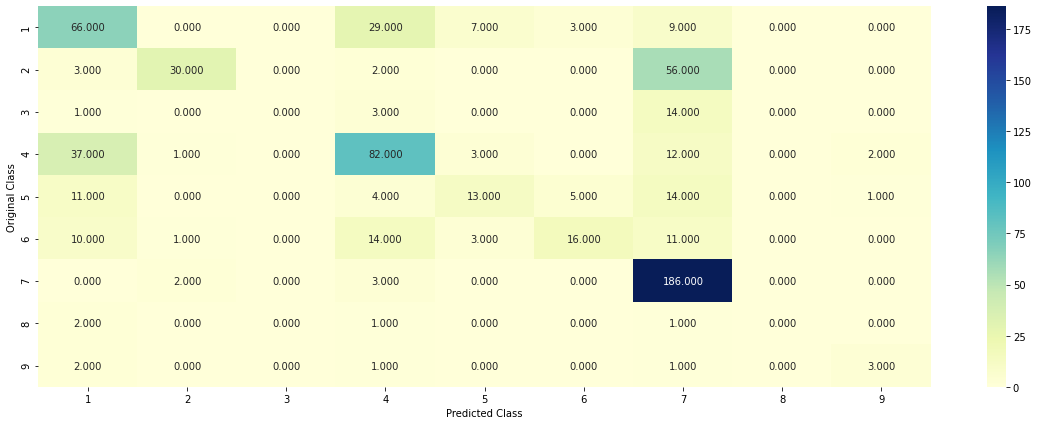

-------------------- Recall matrix (Row sum=1) --------------------


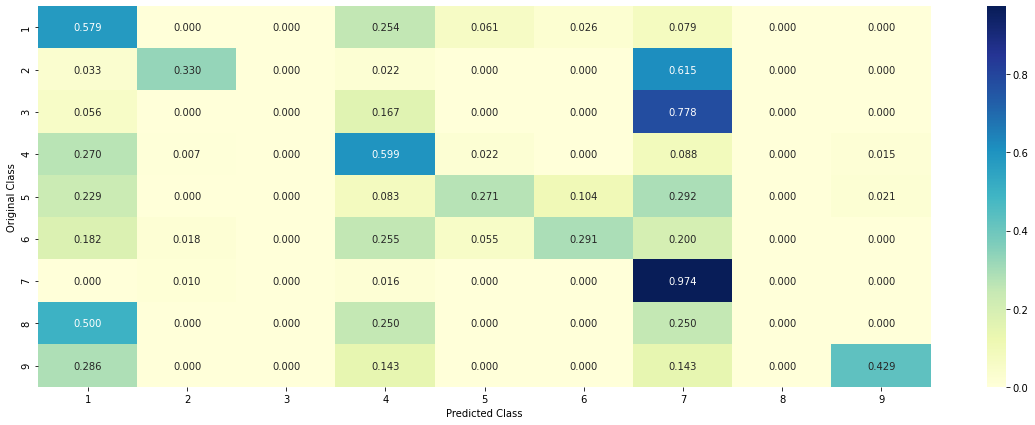

-------------------- Precision matrix (Columm Sum=1) --------------------


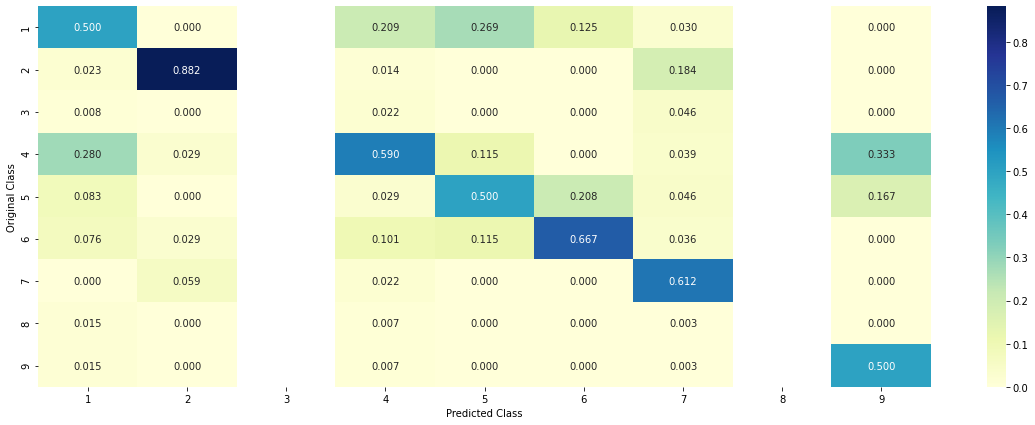

In [0]:
naiveBayesTesting_(varA_NB,varB_NB)

* This is the Base Line Model Results it performed well.

######B.gene(meanResponse encoded) + variation (meanResponse encoded) + text(tfidf-Bigrams)



In [0]:
withoutstd_gene_var_text_meanTdidf

0         1         2  ...     yeast       yet  Class
0     0.120879  0.109890  0.109890  ...  0.017848  0.005846      1
1     0.104348  0.104348  0.095652  ...  0.000000  0.006669      2
2     0.104348  0.104348  0.095652  ...  0.000000  0.006669      2
3     0.104348  0.104348  0.095652  ...  0.000000  0.000000      3
4     0.104348  0.104348  0.095652  ...  0.000000  0.002068      4
...        ...       ...       ...  ...       ...       ...    ...
3316  0.131579  0.087719  0.087719  ...  0.000000  0.000000      4
3317  0.131579  0.087719  0.087719  ...  0.000000  0.000000      1
3318  0.131579  0.087719  0.087719  ...  0.000000  0.001337      1
3319  0.131579  0.087719  0.087719  ...  0.000000  0.006936      4
3320  0.131579  0.087719  0.087719  ...  0.000000  0.003837      4

[3321 rows x 1019 columns]

In [0]:
varA_NB_=without_std_gene_var_text_onehottifidf.iloc[:,0:1018].values

In [0]:
varB_NB_=without_std_gene_var_text_onehottifidf.Class.values

*Reusing the above functions*

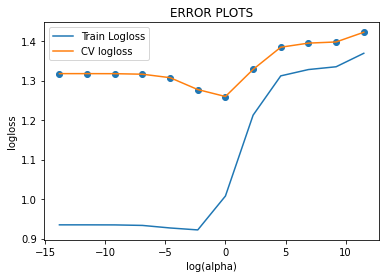

In [0]:
naiveBayesTunning(varA_NB_ , varB_NB_)

**from above graph i  can select alpha as 1**

The  hyper parameter and logloss for Train data are :1 and [1.0383832549539975]
The  hyper parameter and logloss for Train data are :1 and [1.2612556656065605]
The  hyper parameter and logloss for Train data are :1 and [1.2320081611414992]
-------------------- Confusion matrix --------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning:

invalid value encountered in true_divide



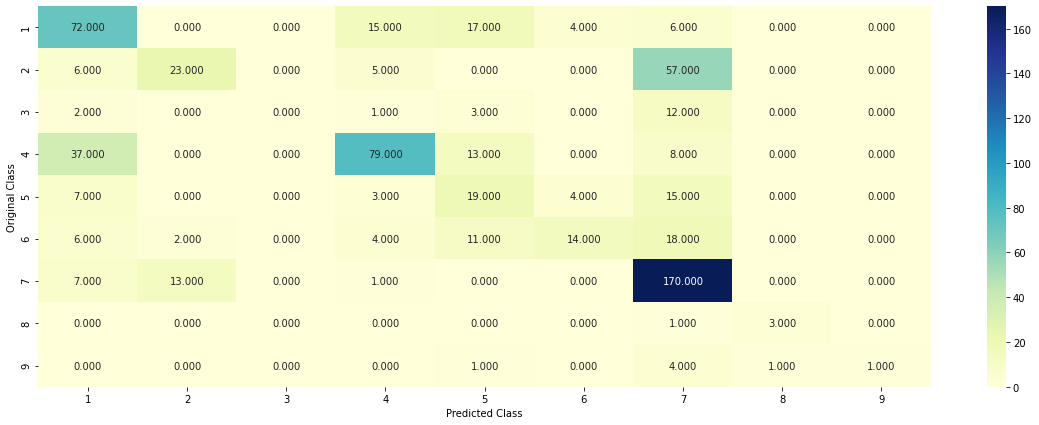

-------------------- Recall matrix (Row sum=1) --------------------


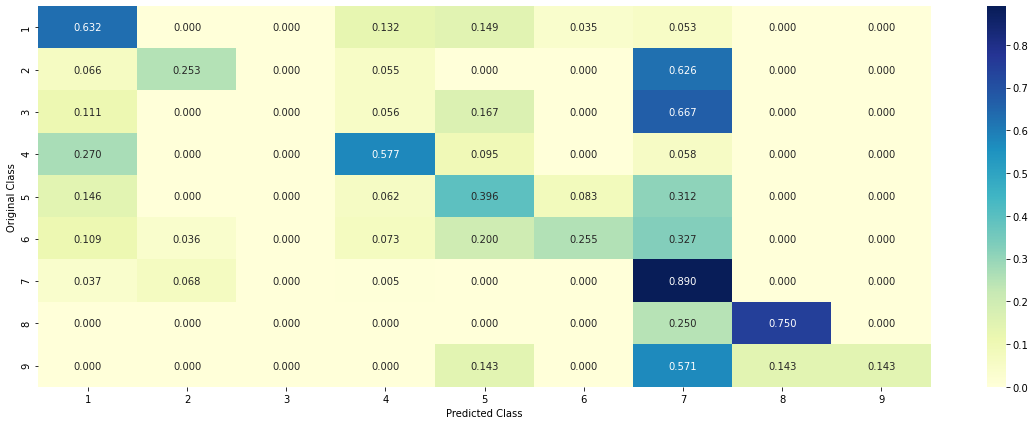

-------------------- Precision matrix (Columm Sum=1) --------------------


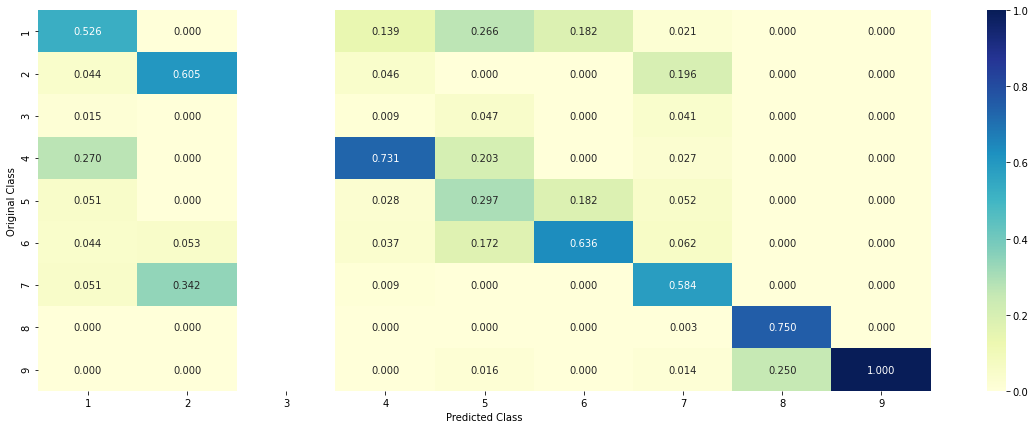

In [0]:
naiveBayesTesting_(varA_NB_ , varB_NB_)

<h3>4.2 Knn Model<h3>

DatasetsUsedHere:- 
* gene (onehot encoded) + variation (oneHot encoded) +text(tfidf-Bigrams)

* gene(meanResponse encoded) + variation (meanResponse encoded) + text(tfidf-Bigrams)

* gene(hashed) + variation(hashed) + text(tfidf-Bigrams)


#####A.gene (onehot encoded) + variation (oneHot encoded) +text(tfidf-Bigrams)

In [0]:
dash_dfff=std_gene_var_text_onehottifidf

In [0]:
varA_Knn=std_gene_var_text_onehottifidf.iloc[:,0:4260].values
varB_knn=std_gene_var_text_onehottifidf.Class.values


In [0]:
from collections import Counter
Counter(varB_knn)

Counter({1: 568, 2: 452, 3: 89, 4: 686, 5: 242, 6: 275, 7: 953, 8: 19, 9: 37})

**Balancing the data set is important in knn as knn doesnt have balancing option in model parameters**

In [0]:
#balancingdataset
from imblearn.combine import SMOTETomek


In [0]:
smk=SMOTETomek(random_state=42)

In [0]:
x_res,y_res=smk.fit_sample(varA_Knn,varB_knn)

In [0]:
Counter(y_res)

Counter({1: 917,
         2: 921,
         3: 945,
         4: 926,
         5: 932,
         6: 941,
         7: 913,
         8: 953,
         9: 953})

In [0]:
def knnTuning(var1, var2):
  """
  This Function is used to perform KNNtuning and decide the K hyper parameter
  """
  X=var1
  Y=var2

  #Splitting the data

  x_train,x_test,y_train,y_test=train_test_split(X,Y, stratify=Y ,test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train, stratify=y_train ,test_size=0.2)

  #hyperTuning
  train_logloss = []
  cv_logloss = []
  test_logloss = []

  K = [1, 5, 11, 15, 21, 31, 41, 51 , 61 ,81]
  for i in K:
    neigh = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    neigh.fit(x_train, y_train)
    
    sig_clf = CalibratedClassifierCV(neigh, method="sigmoid")
    sig_clf.fit(x_train,y_train)

    y_train_pred =  sig_clf.predict_proba(x_train)
    y_cv_pred =  sig_clf.predict_proba(x_cv)
    #y_test_pred = sig_clf.predict_proba(x_test)
   
    train_logloss.append( log_loss(y_train,y_train_pred,eps=1e-15))
    cv_logloss.append(log_loss(y_cv,y_cv_pred,eps=1e-15))
    #test_logloss.append(log_loss(y_test,y_test_pred,eps=1e-15))
    
    
  plt.plot(K, train_logloss, label='Train Logloss')
  plt.plot(K, cv_logloss ,label='CV logloss')
  plt.legend()
  plt.scatter(K,cv_logloss , label='CV logloss')
  plt.xlabel("K")
  plt.ylabel("logloss")
  plt.title("ERROR PLOTS")
  return(plt.show())



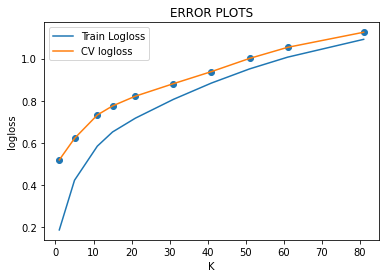

In [0]:
knnTuning(x_res,y_res)

**From above graph i can select my k value as 31**

In [0]:
def knnTesting(var1, var2):
  """
  This Function is used to perform KNNtuning and decide the K hyper parameter
  """
  X=var1
  Y=var2

  #Splitting the data

  x_train,x_test,y_train,y_test=train_test_split(X,Y, stratify=Y ,test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train, stratify=y_train ,test_size=0.2)

  #hyperTuning
  train_logloss = []
  cv_logloss = []
  test_logloss = []

  neigh = KNeighborsClassifier(n_neighbors=15,n_jobs=-1)
  neigh.fit(x_train, y_train)  
  
  sig_clf = CalibratedClassifierCV(neigh, method="sigmoid")
  sig_clf.fit(x_train,y_train)

  y_train_pred =  sig_clf.predict_proba(x_train)
  y_cv_pred =  sig_clf.predict_proba(x_cv)
  y_test_pred = sig_clf.predict_proba(x_test)
  
  train_logloss.append( log_loss(y_train,y_train_pred,eps=1e-15))
  cv_logloss.append(log_loss(y_cv,y_cv_pred,eps=1e-15))
  test_logloss.append(log_loss(y_test,y_test_pred,eps=1e-15))

  print("The  hyper parameter and logloss for Train data are :{} and {}".format(15,train_logloss))
  print("The  hyper parameter and logloss for cv data are :{} and {}".format(15,cv_logloss))
  print("The  hyper parameter and logloss for Test data are :{} and {}".format(31,test_logloss))
  plot_confusion_matrix(y_test,  sig_clf.predict(x_test))
    
    
  

The  hyper parameter and logloss for Train data are :31 and [0.813976747977174]
The  hyper parameter and logloss for cv data are :31 and [0.8788933809062333]
The  hyper parameter and logloss for Test data are :31 and [0.8810438075247502]
-------------------- Confusion matrix --------------------


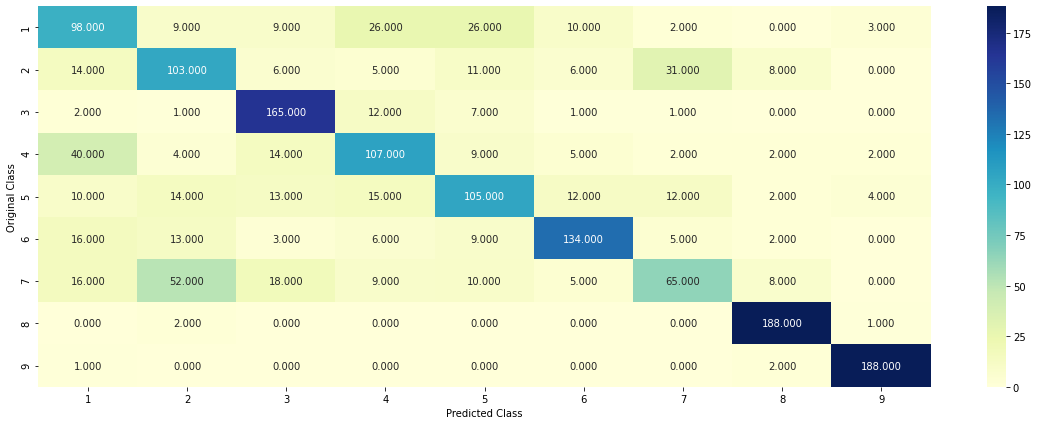

-------------------- Recall matrix (Row sum=1) --------------------


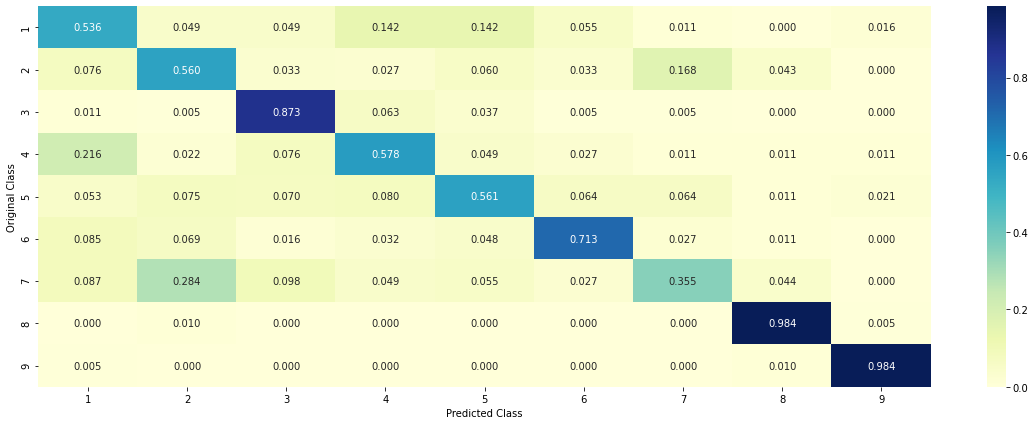

-------------------- Precision matrix (Columm Sum=1) --------------------


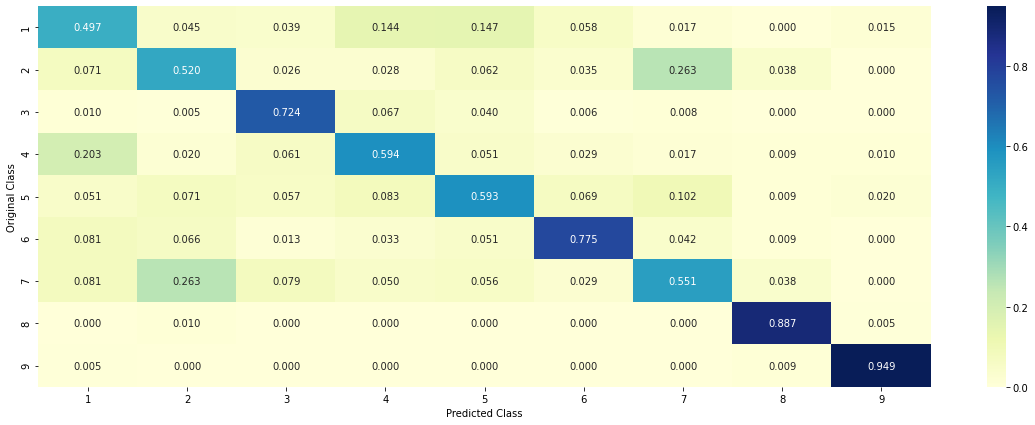

In [0]:
knnTesting(x_res,y_res)

####B.gene(meanResponse encoded) + variation (meanResponse encoded) + text(tfidf-Bigrams)


In [0]:
std_gene_var_text_meanTdidf

0         1         2  ...     yeast       yet  Class
0    -0.051316 -0.079307  1.060311  ...  0.205134  0.599335      1
1    -0.280827 -0.167630  0.464136  ... -0.280409  0.777698      2
2    -0.280827 -0.167630  0.464136  ... -0.280409  0.777698      2
3    -0.280827 -0.167630  0.464136  ... -0.280409 -0.667276      3
4    -0.280827 -0.167630  0.464136  ... -0.280409 -0.219152      4
...        ...       ...       ...  ...       ...       ...    ...
3316  0.097234 -0.432626  0.131969  ... -0.280409 -0.667276      4
3317  0.097234 -0.432626  0.131969  ... -0.280409 -0.667276      1
3318  0.097234 -0.432626  0.131969  ... -0.280409 -0.377515      1
3319  0.097234 -0.432626  0.131969  ... -0.280409  0.835527      4
3320  0.097234 -0.432626  0.131969  ... -0.280409  0.164191      4

[3321 rows x 1019 columns]

In [0]:
x_mean=std_gene_var_text_meanTdidf.iloc[:,0:1018].values
y_mean=std_gene_var_text_meanTdidf.Class.values

###### balancing class
using SMOTE

In [38]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=42)
x_res,y_res=smk.fit_sample(x_mean,y_mean)
from collections import Counter
Counter(y_res)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

Counter({1: 921,
         2: 926,
         3: 949,
         4: 926,
         5: 932,
         6: 944,
         7: 919,
         8: 953,
         9: 953})

*Tuning using the previous functions*

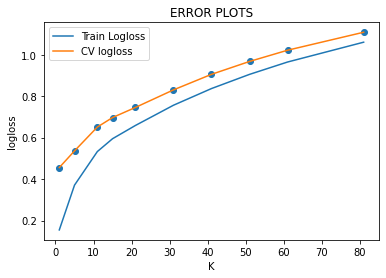

In [0]:
knnTuning(x_res,y_res)


**from the above graph i can take k =21**

The  hyper parameter and logloss for Train data are :31 and [0.6814415244209885]
The  hyper parameter and logloss for cv data are :31 and [0.7016829214824364]
The  hyper parameter and logloss for Test data are :31 and [0.7779077172643827]
-------------------- Confusion matrix --------------------


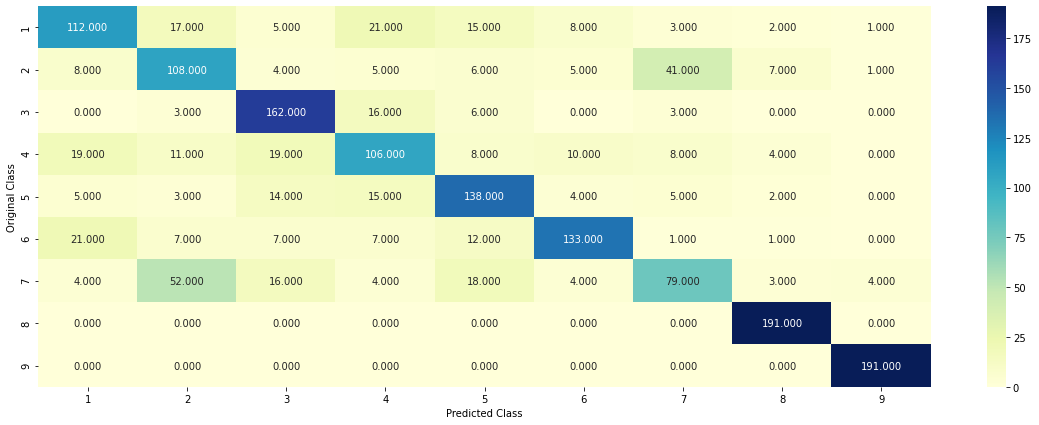

-------------------- Recall matrix (Row sum=1) --------------------


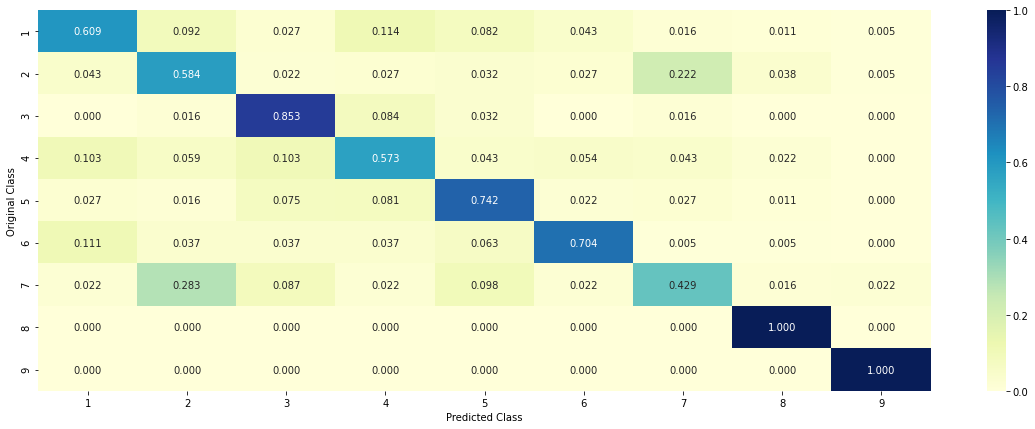

-------------------- Precision matrix (Columm Sum=1) --------------------


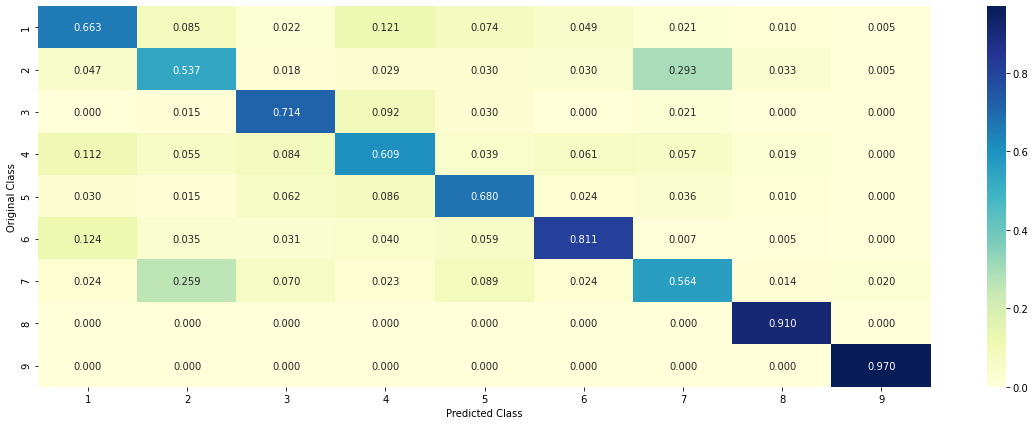

In [0]:
#i took k as 21 and forgot to update that in print statement soory for the typo
knnTesting(x_res,y_res)


####C.gene(hashed) + variation (hashed) + text(tfidf-Bigrams)


In [0]:
std_gene_var_text_hashingtfidf

0    1    2    3    4  ...        wt     years     yeast       yet  Class
0     0.0  2.0  0.0  0.0  1.0  ...  0.173741 -0.344039  0.205134  0.599335      1
1     0.0  0.0 -1.0 -1.0  0.0  ... -0.160639 -0.219060 -0.280409  0.777698      2
2     0.0  0.0 -1.0 -1.0  0.0  ... -0.160639 -0.219060 -0.280409  0.777698      2
3     0.0  0.0 -1.0 -1.0  0.0  ... -0.233922  0.025344 -0.280409 -0.667276      3
4     0.0  0.0 -1.0 -1.0  0.0  ... -0.441298 -0.227761 -0.280409 -0.219152      4
...   ...  ...  ...  ...  ...  ...       ...       ...       ...       ...    ...
3316  1.0 -1.0  0.0  0.0  0.0  ...  0.605370 -0.344039 -0.280409 -0.667276      4
3317  1.0 -1.0  0.0  0.0  0.0  ...  0.905036 -0.344039 -0.280409 -0.667276      1
3318  1.0 -1.0  0.0  0.0  0.0  ... -0.441298 -0.268853 -0.280409 -0.377515      1
3319  1.0 -1.0  0.0  0.0  0.0  ... -0.392649  0.045903 -0.280409  0.835527      4
3320  1.0 -1.0  0.0  0.0  0.0  ... -0.387465 -0.128293 -0.280409  0.164191      4

[3321 rows x 1019 columns]

In [0]:
x_hashed=std_gene_var_text_hashingtfidf.iloc[:, 0:1018].values
y_hashed=std_gene_var_text_hashingtfidf.Class.values


######Balancing using smote


In [0]:
from imblearn.combine import SMOTETomek
smk=SMOTETomek(random_state=42)
x_res,y_res=smk.fit_sample(x_hashed,y_hashed)
from collections import Counter
Counter(y_res)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

Counter({1: 915,
         2: 916,
         3: 944,
         4: 923,
         5: 924,
         6: 938,
         7: 907,
         8: 953,
         9: 953})

*tuning model and testing model with old functions created above*

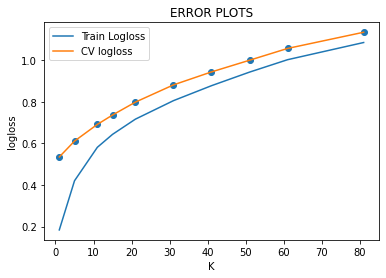

In [0]:
knnTuning(x_res,y_res)

**From the graph i can take k as 15**

The  hyper parameter and logloss for Train data are :15 and [0.6474458212209986]
The  hyper parameter and logloss for cv data are :15 and [0.7512635680512498]
The  hyper parameter and logloss for Test data are :31 and [0.7368556387957963]
-------------------- Confusion matrix --------------------


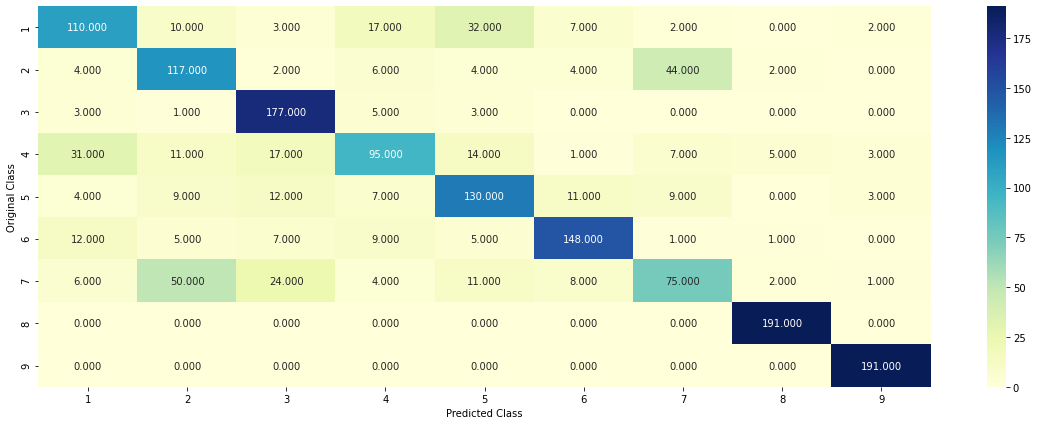

-------------------- Recall matrix (Row sum=1) --------------------


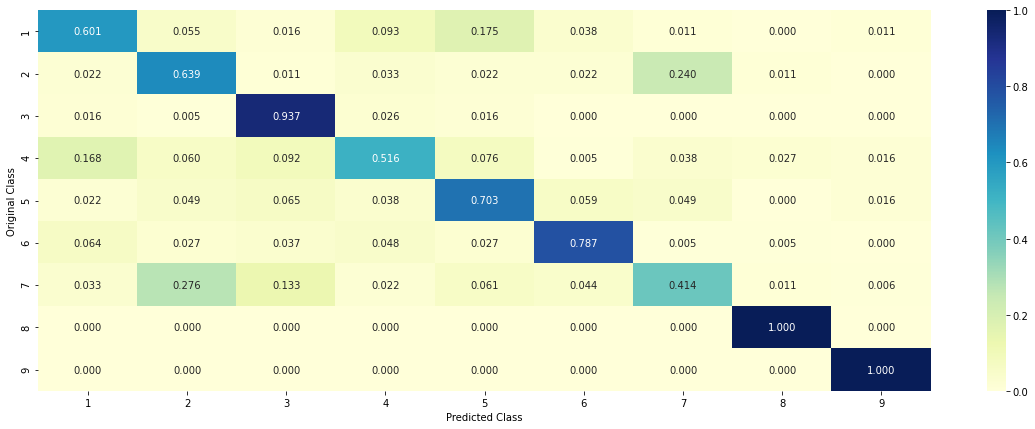

-------------------- Precision matrix (Columm Sum=1) --------------------


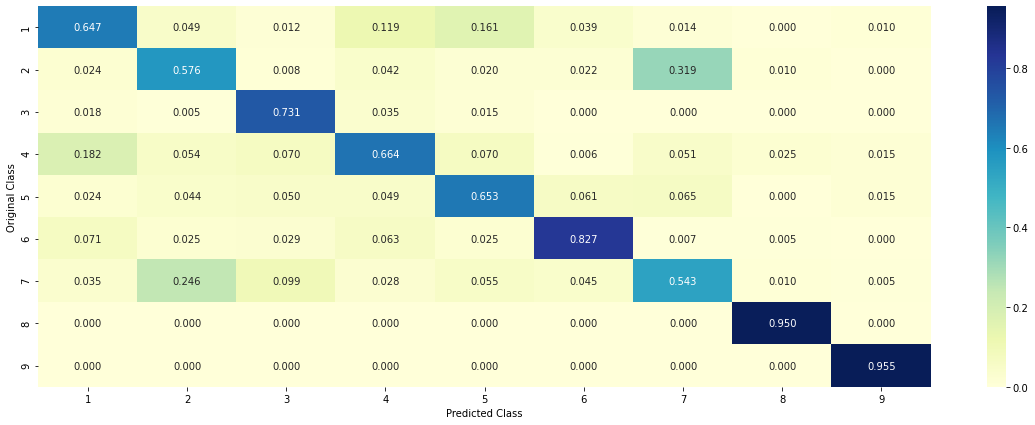

In [0]:
knnTesting(x_res,y_res)

<h3>4.3 Logistic Regression<h3>


DatasetsUsedHere:- 
* gene (onehot encoded) + variation (oneHot encoded) +text(tfidf-Bigrams)

* gene(meanResponse encoded) + variation (meanResponse encoded) + text(tfidf-Bigrams)

* gene(hashed) + variation(hashed) + text(tfidf-Bigrams)


######A.gene (onehot encoded) + variation (oneHot encoded) +text(tfidf-Bigrams)

In [0]:
varA_log=std_gene_var_text_onehottifidf.iloc[:,0:4260].values
varB_log=std_gene_var_text_onehottifidf.Class.values


In [0]:
def tune_Logsitic(var1,var2):
  """
  This function is use to build n hyperparamater tune logisticmodel
  """
  X = var1
  y_true = var2

  x_train,x_test,y_train,y_test=train_test_split(X , y_true , stratify=y_true , test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train , stratify=y_train , test_size=0.2)

  print ( x_train.shape,y_train.shape)
  print( x_cv.shape,y_cv.shape)
  print(x_test.shape,y_test.shape)

  # HyperTuning
  logLoss_train=[ ]
  logLoss_cv=[ ]
  c = [0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10 ]
  for i in c:
        clf_SGD=SGDClassifier(loss='log',penalty='l2',alpha=i,class_weight='balanced')
        clf_SGD.fit(x_train,y_train)
        
        calibrated = CalibratedClassifierCV(clf_SGD, method='sigmoid', cv=5)
        calibrated.fit(x_train , y_train)
        
        predict_y = calibrated.predict_proba(x_train)
        predict_y2 = calibrated.predict_proba(x_cv)
        
        logLoss_train.append(log_loss(y_train,predict_y, eps=1e-15))
        
        logLoss_cv.append(log_loss(y_cv,predict_y2, eps=1e-15))
        
        

        

        

    

  plt.plot(np.log(c), logLoss_train, label='Train logloss')
  plt.plot(np.log(c), logLoss_cv, label='CV logloss')

  plt.scatter(np.log(c), logLoss_cv, label='CV logloss')
  plt.legend()

  plt.xlabel("C: hyperparameter")
  plt.ylabel("LogLoss")
  plt.title("ERROR PLOTS")
  return(plt.show())



  







(2124, 4260) (2124,)
(532, 4260) (532,)
(665, 4260) (665,)


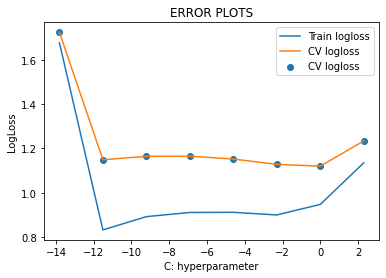

In [0]:
tune_Logsitic(varA_log,varB_knn)

**From the graph i can take aplha as 1**

In [0]:
def test_Logistic(var1,var2):
  """
  This function is used to test model on test data.
  """
  x_true=var1
  y_true=var2


  x_train,x_test,y_train,y_test=train_test_split(x_true,y_true,stratify=y_true,test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train,stratify=y_train,test_size=0.2)



  
  print("The shape of the train n test vector as follows:")
  print(x_train.shape,y_train.shape)
  print(x_cv.shape,y_cv.shape)
  print(x_test.shape,y_test.shape)

  log_loss_train=[]
  log_loss_cv=[]
  log_loss_test=[]

  
  model = LogisticRegression(penalty='l2',C=1,max_iter=1000 , class_weight='balanced' ,solver='newton-cg' )
  model.fit(x_train , y_train)
  
      
  
  clf=CalibratedClassifierCV(model,method='sigmoid',cv=5)
  clf.fit(x_train,y_train)

  pred_ytrain=clf.predict_proba(x_train)
  log_loss_train.append(log_loss(y_train,pred_ytrain , eps=1e-15))

  pred_ycv=clf.predict_proba(x_cv)
  log_loss_cv.append(log_loss(y_cv,pred_ycv,eps=1e-15))

  pred_ytest=clf.predict_proba(x_test)
  log_loss_test.append(log_loss(y_test,pred_ytest , eps=1e-15))



  print("The Logloss for {} the coresponding train loss is {}".format( 1,log_loss_train ))
  print("The Logloss for {} the coresponding cv loss is {}".format( 1,log_loss_cv ))
  print("The Logloss for {} the coresponding test loss is {}".format( 1,log_loss_test ))
  plot_confusion_matrix(y_test,  clf.predict(x_test))


The shape of the train n test vector as follows:
(2124, 4260) (2124,)
(532, 4260) (532,)
(665, 4260) (665,)
The Logloss for 1 the coresponding train loss is [0.7850156568089277]
The Logloss for 1 the coresponding cv loss is [1.1961412442201744]
The Logloss for 1 the coresponding test loss is [1.1748189424714095]
-------------------- Confusion matrix --------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning:

invalid value encountered in true_divide



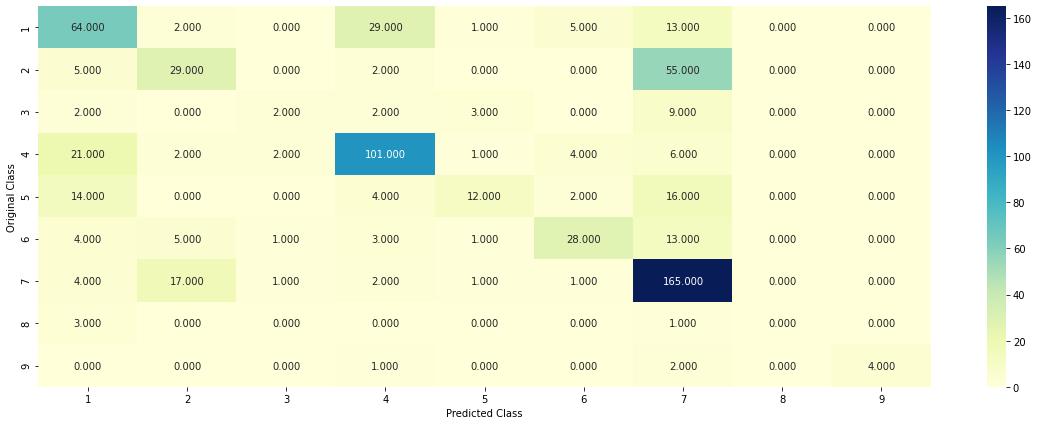

-------------------- Recall matrix (Row sum=1) --------------------


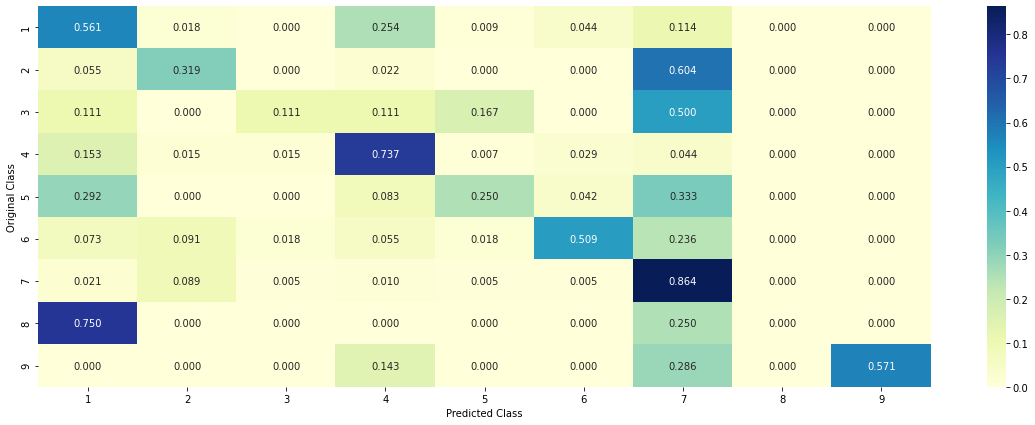

-------------------- Precision matrix (Columm Sum=1) --------------------


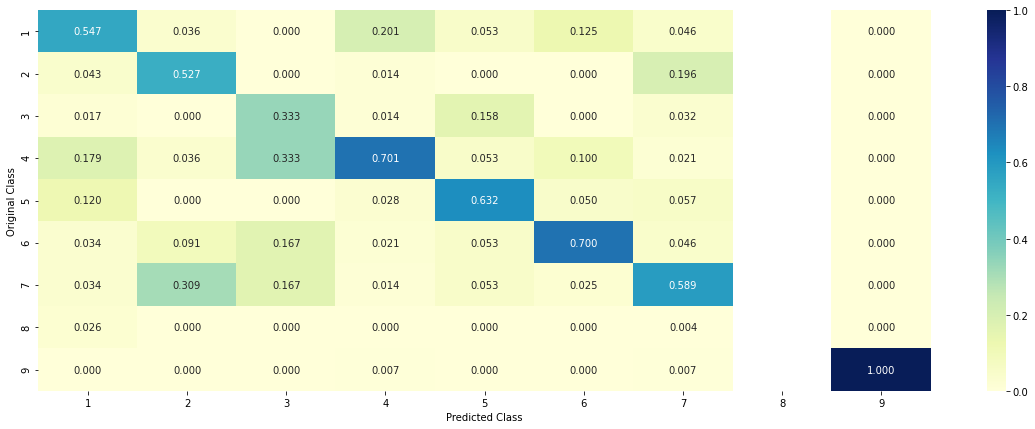

In [0]:
test_Logistic(varA_log,varB_log)

####B.gene(meanResponse encoded) + variation (meanResponse encoded) + text(tfidf-Bigrams)

In [0]:
std_gene_var_text_meanTdidf

0         1         2  ...     yeast       yet  Class
0    -0.051316 -0.079307  1.060311  ...  0.205134  0.599335      1
1    -0.280827 -0.167630  0.464136  ... -0.280409  0.777698      2
2    -0.280827 -0.167630  0.464136  ... -0.280409  0.777698      2
3    -0.280827 -0.167630  0.464136  ... -0.280409 -0.667276      3
4    -0.280827 -0.167630  0.464136  ... -0.280409 -0.219152      4
...        ...       ...       ...  ...       ...       ...    ...
3316  0.097234 -0.432626  0.131969  ... -0.280409 -0.667276      4
3317  0.097234 -0.432626  0.131969  ... -0.280409 -0.667276      1
3318  0.097234 -0.432626  0.131969  ... -0.280409 -0.377515      1
3319  0.097234 -0.432626  0.131969  ... -0.280409  0.835527      4
3320  0.097234 -0.432626  0.131969  ... -0.280409  0.164191      4

[3321 rows x 1019 columns]

In [0]:
vara_mean=std_gene_var_text_meanTdidf.iloc[:,0:1018].values
varb_mean=std_gene_var_text_meanTdidf.Class.values

**for tunning and testing using above functions**

(2124, 1018) (2124,)
(532, 1018) (532,)
(665, 1018) (665,)


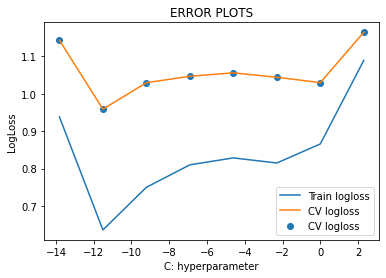

In [0]:
tune_Logsitic(vara_mean,varb_mean)

**from the above graph i can conclude c=1**

The shape of the train n test vector as follows:
(2124, 1018) (2124,)
(532, 1018) (532,)
(665, 1018) (665,)
The Logloss for 1 the coresponding train loss is [0.5847329559769139]
The Logloss for 1 the coresponding cv loss is [0.8572068041315724]
The Logloss for 1 the coresponding test loss is [0.8214264881831812]
-------------------- Confusion matrix --------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning:

invalid value encountered in true_divide



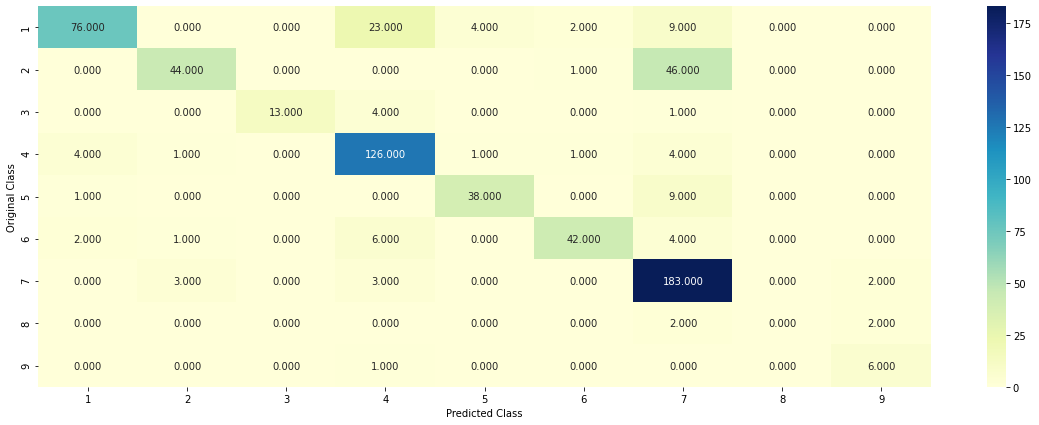

-------------------- Recall matrix (Row sum=1) --------------------


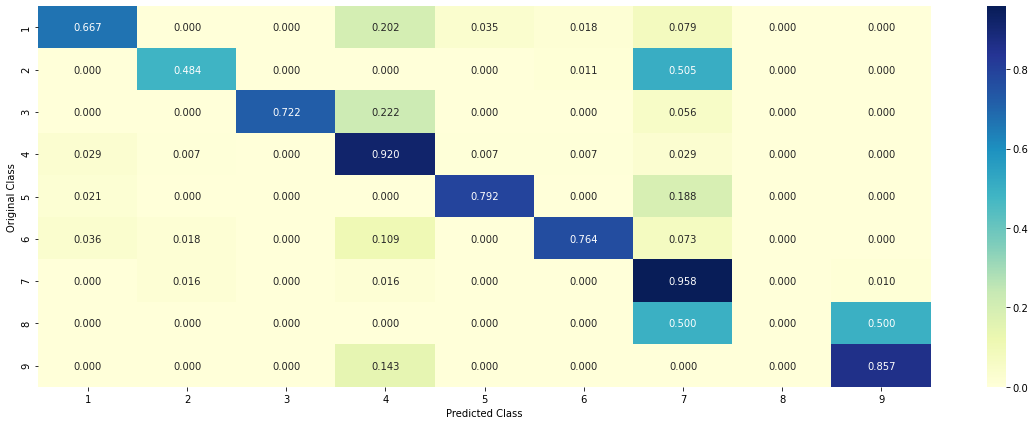

-------------------- Precision matrix (Columm Sum=1) --------------------


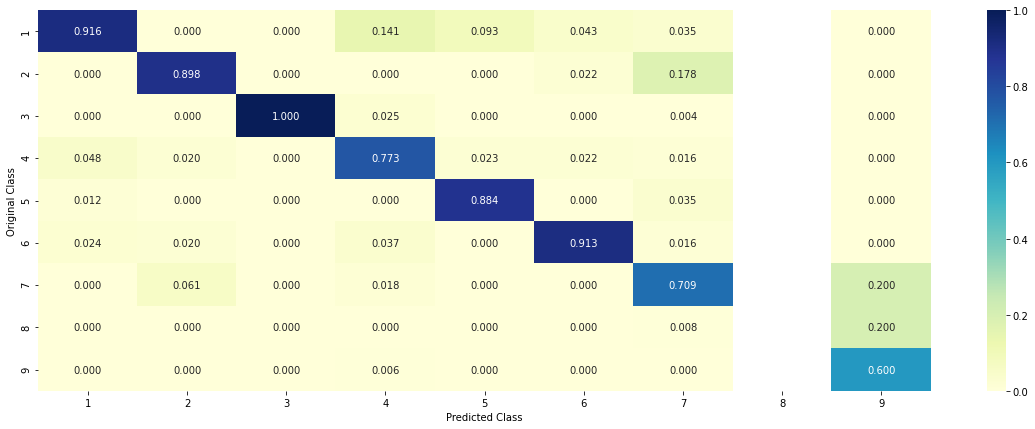

In [0]:
test_Logistic(vara_mean,varb_mean)

####C.gene(hashed) + variation(hashed) + text(tfidf-Bigrams)

In [0]:
std_gene_var_text_hashingtfidf

0    1    2    3    4  ...        wt     years     yeast       yet  Class
0     0.0  2.0  0.0  0.0  1.0  ...  0.173741 -0.344039  0.205134  0.599335      1
1     0.0  0.0 -1.0 -1.0  0.0  ... -0.160639 -0.219060 -0.280409  0.777698      2
2     0.0  0.0 -1.0 -1.0  0.0  ... -0.160639 -0.219060 -0.280409  0.777698      2
3     0.0  0.0 -1.0 -1.0  0.0  ... -0.233922  0.025344 -0.280409 -0.667276      3
4     0.0  0.0 -1.0 -1.0  0.0  ... -0.441298 -0.227761 -0.280409 -0.219152      4
...   ...  ...  ...  ...  ...  ...       ...       ...       ...       ...    ...
3316  1.0 -1.0  0.0  0.0  0.0  ...  0.605370 -0.344039 -0.280409 -0.667276      4
3317  1.0 -1.0  0.0  0.0  0.0  ...  0.905036 -0.344039 -0.280409 -0.667276      1
3318  1.0 -1.0  0.0  0.0  0.0  ... -0.441298 -0.268853 -0.280409 -0.377515      1
3319  1.0 -1.0  0.0  0.0  0.0  ... -0.392649  0.045903 -0.280409  0.835527      4
3320  1.0 -1.0  0.0  0.0  0.0  ... -0.387465 -0.128293 -0.280409  0.164191      4

[3321 rows x 1019 columns]

In [0]:
vara_hashed=std_gene_var_text_hashingtfidf.iloc[:,0:1018].values
varb_hashed=std_gene_var_text_hashingtfidf.Class.values

(2124, 1018) (2124,)
(532, 1018) (532,)
(665, 1018) (665,)


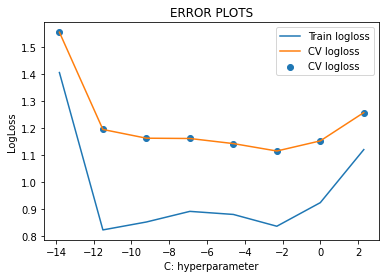

In [0]:
tune_Logsitic(vara_hashed,varb_hashed)

**from graph i can take C as 1**

The shape of the train n test vector as follows:
(2124, 1018) (2124,)
(532, 1018) (532,)
(665, 1018) (665,)
The Logloss for 1 the coresponding train loss is [0.8735667598121121]
The Logloss for 1 the coresponding cv loss is [1.1928582990002885]
The Logloss for 1 the coresponding test loss is [1.1999154339757783]
-------------------- Confusion matrix --------------------


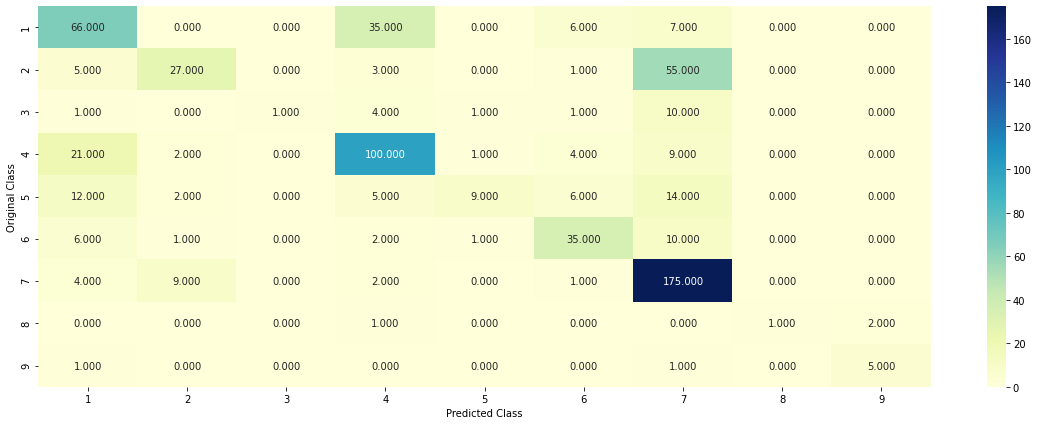

-------------------- Recall matrix (Row sum=1) --------------------


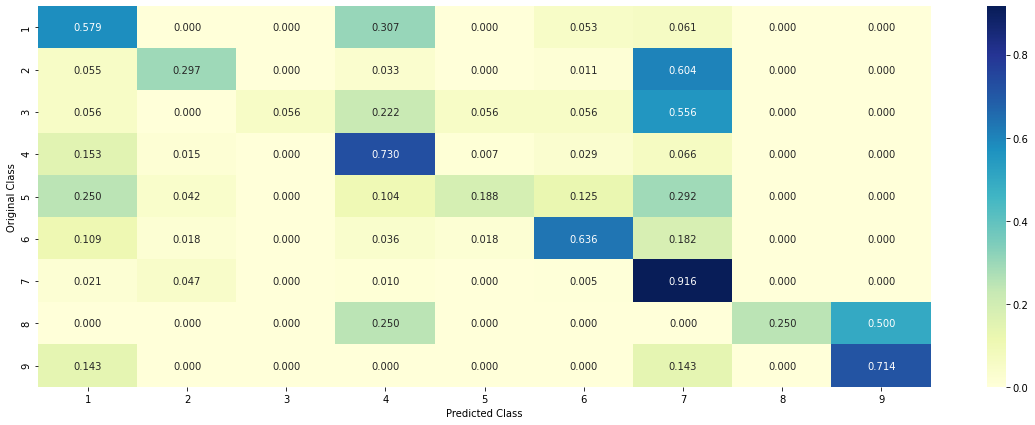

-------------------- Precision matrix (Columm Sum=1) --------------------


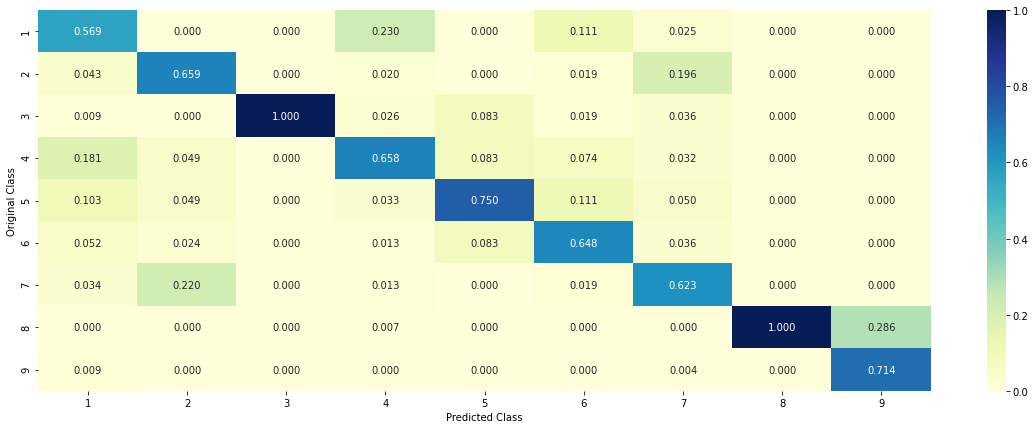

In [0]:
test_Logistic(vara_hashed,varb_hashed)

<h3>4.4 SVM <h3>

DatasetsUsedHere:- 
* gene (onehot encoded) + variation (oneHot encoded) +text(tfidf-Bigrams)

* gene(meanResponse encoded) + variation (meanResponse encoded) + text(tfidf-Bigrams)

* gene(hashed) + variation(hashed) + text(tfidf-Bigrams)



#####A.gene (onehot encoded) + variation (oneHot encoded) +text(tfidf-Bigrams)

In [0]:
std_gene_var_text_onehottifidf

ABL1  ACVR1  AGO2  AKT1  ...     years     yeast       yet  Class
0      0.0    0.0   0.0   0.0  ... -0.344039  0.205134  0.599335      1
1      0.0    0.0   0.0   0.0  ... -0.219060 -0.280409  0.777698      2
2      0.0    0.0   0.0   0.0  ... -0.219060 -0.280409  0.777698      2
3      0.0    0.0   0.0   0.0  ...  0.025344 -0.280409 -0.667276      3
4      0.0    0.0   0.0   0.0  ... -0.227761 -0.280409 -0.219152      4
...    ...    ...   ...   ...  ...       ...       ...       ...    ...
3316   0.0    0.0   0.0   0.0  ... -0.344039 -0.280409 -0.667276      4
3317   0.0    0.0   0.0   0.0  ... -0.344039 -0.280409 -0.667276      1
3318   0.0    0.0   0.0   0.0  ... -0.268853 -0.280409 -0.377515      1
3319   0.0    0.0   0.0   0.0  ...  0.045903 -0.280409  0.835527      4
3320   0.0    0.0   0.0   0.0  ... -0.128293 -0.280409  0.164191      4

[3321 rows x 4261 columns]

In [0]:
vara_svm=std_gene_var_text_onehottifidf.iloc[:,0:4260].values
varb_svm=std_gene_var_text_onehottifidf.Class.values

In [0]:
def tuneSVM(var1,var2):
  """
  This function is use to build n hyperparamater tune SVM
  """
  X = var1
  y_true = var2

  x_train,x_test,y_train,y_test=train_test_split(X , y_true , stratify=y_true , test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train , stratify=y_train , test_size=0.2)

  print ( x_train.shape,y_train.shape)
  print( x_cv.shape,y_cv.shape)
  print(x_test.shape,y_test.shape)

  #Svm HyperTuning
  logLoss_train=[ ]
  logLoss_cv=[ ]
  c = [0.000001 , 0.00001 , 0.0001 , 0.001 , 0.01 , 0.1 , 1 , 10 ]
  for i in c:
        clf_SGD=SGDClassifier(loss='hinge',penalty='l2',alpha=i,class_weight='balanced')
        clf_SGD.fit(x_train,y_train)
        
        calibrated = CalibratedClassifierCV(clf_SGD, method='sigmoid', cv=5)
        calibrated.fit(x_train , y_train)
        
        predict_y = calibrated.predict_proba(x_train)
        predict_y2 = calibrated.predict_proba(x_cv)
        
        logLoss_train.append(log_loss(y_train,predict_y, eps=1e-15))
        
        logLoss_cv.append(log_loss(y_cv,predict_y2, eps=1e-15))
        
        

        

        

   

  plt.plot(np.log(c), logLoss_train, label='Train logloss')
  plt.plot(np.log(c), logLoss_cv, label='CV logloss')

  plt.scatter(np.log(c), logLoss_cv, label='CV logloss')
  plt.legend()

  plt.xlabel("C: hyperparameter")
  plt.ylabel("LogLoss")
  plt.title("ERROR PLOTS")
  return(plt.show())


(2124, 4260) (2124,)
(532, 4260) (532,)
(665, 4260) (665,)


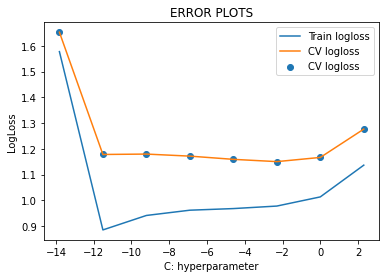

In [0]:
tuneSVM(vara_svm,varb_svm)

**from the graph i can select c = 0.1**

In [0]:
def test_SVMModel(var1 , var2):

  X = var1
  y_true = var2

  x_train,x_test,y_train,y_test=train_test_split(X , y_true , stratify=y_true , test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train , stratify=y_train , test_size=0.2)

  print( x_train.shape,y_train.shape)
  print( x_cv.shape,y_cv.shape)
  print(x_test.shape,y_test.shape)
  
  logLoss_test=[ ]
  logLoss_cv_new=[ ]
  logLoss_train_new=[ ]
  
  
  clf_SGD_test=SGDClassifier(loss='hinge',penalty='l2',alpha=1,class_weight='balanced')
  clf_SGD_test.fit(x_train,y_train)

  calibrated = CalibratedClassifierCV(clf_SGD_test, method='sigmoid', cv=5)
  calibrated.fit(x_train , y_train)
  
  predict_y_test = calibrated.predict_proba(x_test)
  logLoss_test.append(log_loss(y_test,predict_y_test, eps=1e-15))
  
  predicted_y_train=calibrated.predict_proba(x_train)
  logLoss_train_new.append(log_loss(y_train,predicted_y_train, eps=1e-15))

  predicted_y_cv=calibrated.predict_proba(x_cv)
  logLoss_cv_new.append(log_loss(y_cv,predicted_y_cv, eps=1e-15))
  

  print("The Logg loss for training data with best aplha {} is {} ".format( 1 ,logLoss_train_new ))
  print("The Logg loss for cv data with best aplha {} is {}".format( 1,logLoss_cv_new ))  
  print("The Logg loss for test data with best aplha {} is {}".format( 1,logLoss_test))
  plot_confusion_matrix(y_test,  calibrated.predict(x_test))


(2124, 4260) (2124,)
(532, 4260) (532,)
(665, 4260) (665,)
The Logg loss for training data with best aplha 0.1 is [0.9361514695402671] 
The Logg loss for cv data with best aplha 0.1 is [1.1565827483656932]
The Logg loss for test data with best aplha 0.1 is [1.1689839246304874]
-------------------- Confusion matrix --------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning:

invalid value encountered in true_divide



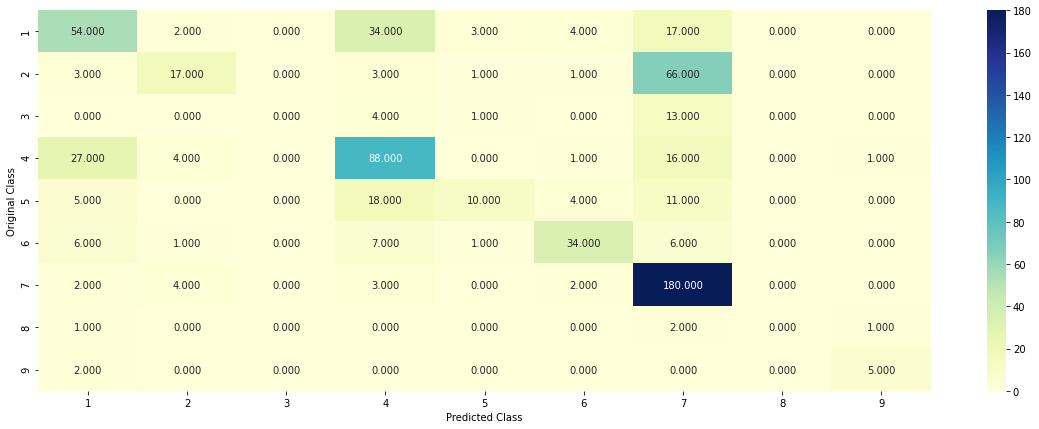

-------------------- Recall matrix (Row sum=1) --------------------


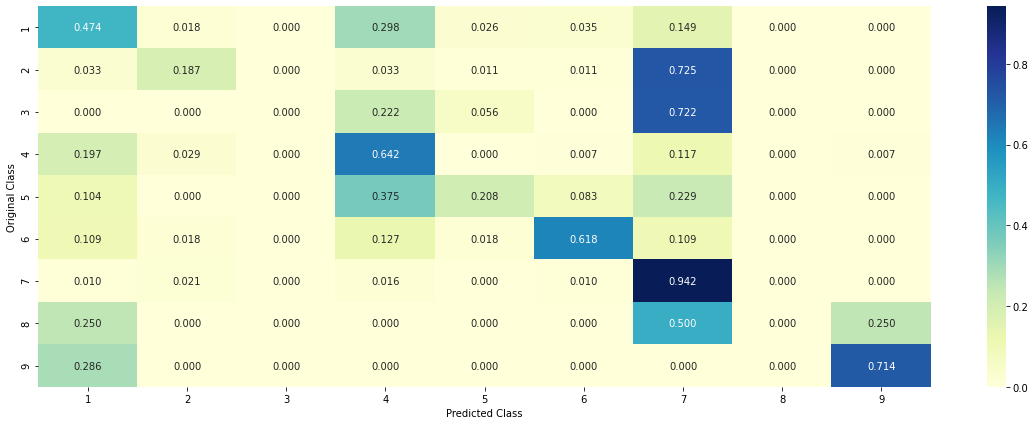

-------------------- Precision matrix (Columm Sum=1) --------------------


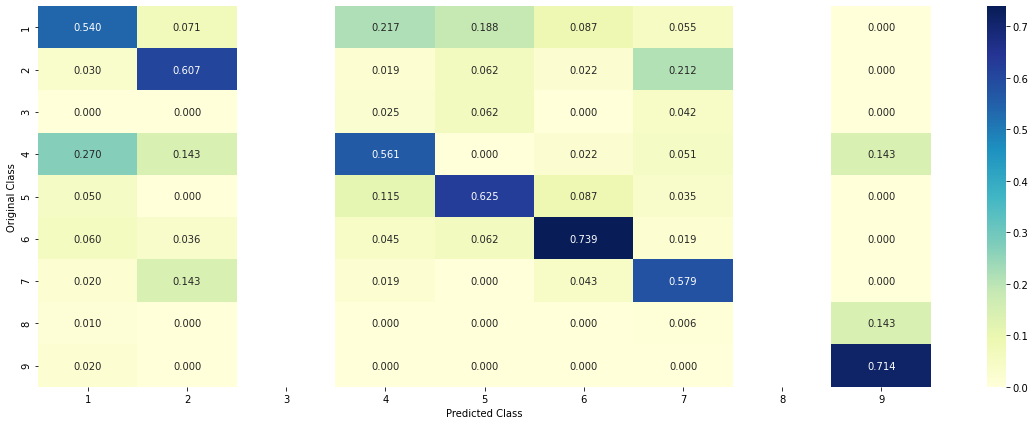

In [0]:
test_SVMModel(vara_svm,varb_svm)

####B.gene(meanResponse encoded) + variation (meanResponse encoded) + text(tfidf-Bigrams)

In [0]:
std_gene_var_text_meanTdidf

0         1         2  ...     yeast       yet  Class
0    -0.051316 -0.079307  1.060311  ...  0.205134  0.599335      1
1    -0.280827 -0.167630  0.464136  ... -0.280409  0.777698      2
2    -0.280827 -0.167630  0.464136  ... -0.280409  0.777698      2
3    -0.280827 -0.167630  0.464136  ... -0.280409 -0.667276      3
4    -0.280827 -0.167630  0.464136  ... -0.280409 -0.219152      4
...        ...       ...       ...  ...       ...       ...    ...
3316  0.097234 -0.432626  0.131969  ... -0.280409 -0.667276      4
3317  0.097234 -0.432626  0.131969  ... -0.280409 -0.667276      1
3318  0.097234 -0.432626  0.131969  ... -0.280409 -0.377515      1
3319  0.097234 -0.432626  0.131969  ... -0.280409  0.835527      4
3320  0.097234 -0.432626  0.131969  ... -0.280409  0.164191      4

[3321 rows x 1019 columns]

In [0]:
vara_mean_svm=std_gene_var_text_meanTdidf.iloc[:,0:1018].values
varb_mean_svm=std_gene_var_text_meanTdidf.Class.values

*using previous functions for model*

(2124, 1018) (2124,)
(532, 1018) (532,)
(665, 1018) (665,)


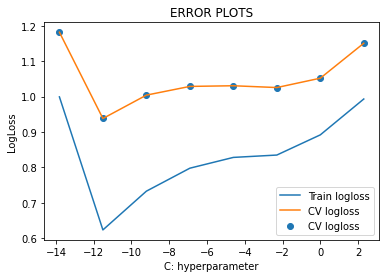

In [0]:
tuneSVM(vara_mean_svm,varb_mean_svm)

**from above c =1**

(2124, 1018) (2124,)
(532, 1018) (532,)
(665, 1018) (665,)
The Logg loss for training data with best aplha 1 is [0.8782130606666145] 
The Logg loss for cv data with best aplha 1 is [1.104589994061247]
The Logg loss for test data with best aplha 1 is [1.0574913033666131]
-------------------- Confusion matrix --------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning:

invalid value encountered in true_divide



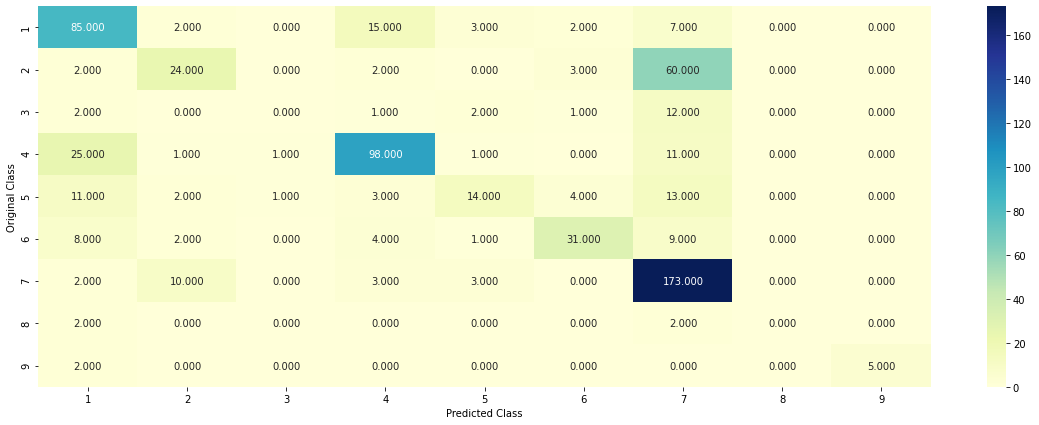

-------------------- Recall matrix (Row sum=1) --------------------


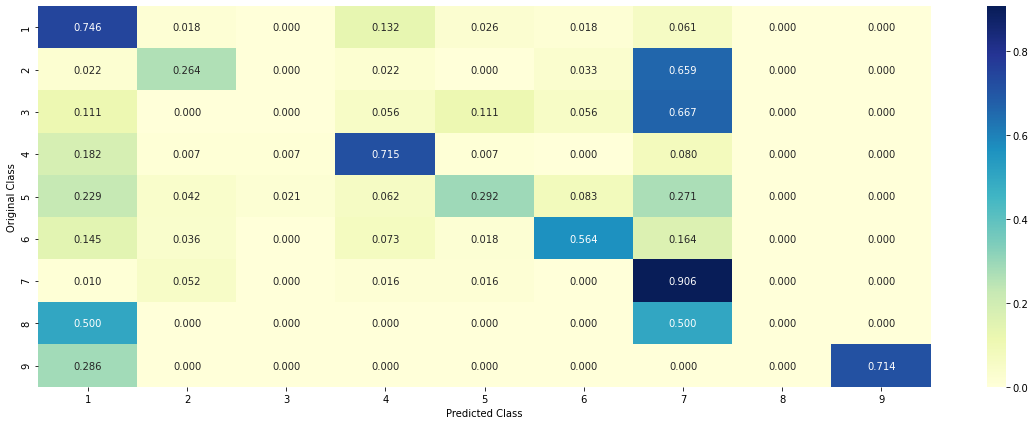

-------------------- Precision matrix (Columm Sum=1) --------------------


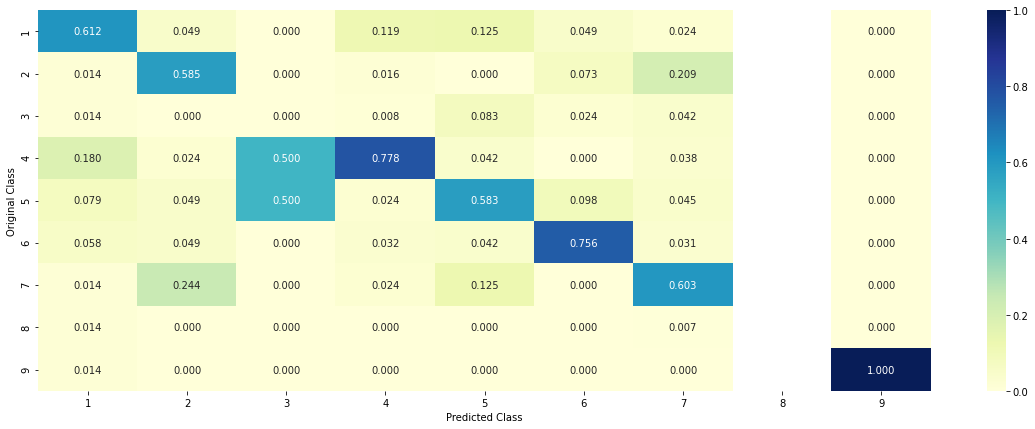

In [0]:
test_SVMModel(vara_mean_svm,varb_mean_svm)

####C.gene(hashed) + variation(hashed) + text(tfidf-Bigrams)

In [0]:
std_gene_var_text_hashingtfidf

0    1    2    3    4  ...        wt     years     yeast       yet  Class
0     0.0  2.0  0.0  0.0  1.0  ...  0.173741 -0.344039  0.205134  0.599335      1
1     0.0  0.0 -1.0 -1.0  0.0  ... -0.160639 -0.219060 -0.280409  0.777698      2
2     0.0  0.0 -1.0 -1.0  0.0  ... -0.160639 -0.219060 -0.280409  0.777698      2
3     0.0  0.0 -1.0 -1.0  0.0  ... -0.233922  0.025344 -0.280409 -0.667276      3
4     0.0  0.0 -1.0 -1.0  0.0  ... -0.441298 -0.227761 -0.280409 -0.219152      4
...   ...  ...  ...  ...  ...  ...       ...       ...       ...       ...    ...
3316  1.0 -1.0  0.0  0.0  0.0  ...  0.605370 -0.344039 -0.280409 -0.667276      4
3317  1.0 -1.0  0.0  0.0  0.0  ...  0.905036 -0.344039 -0.280409 -0.667276      1
3318  1.0 -1.0  0.0  0.0  0.0  ... -0.441298 -0.268853 -0.280409 -0.377515      1
3319  1.0 -1.0  0.0  0.0  0.0  ... -0.392649  0.045903 -0.280409  0.835527      4
3320  1.0 -1.0  0.0  0.0  0.0  ... -0.387465 -0.128293 -0.280409  0.164191      4

[3321 rows x 1019 columns]

In [0]:
vara_svm_hashed=std_gene_var_text_hashingtfidf.iloc[:,0:1018].values
varb_svm_hashed=std_gene_var_text_hashingtfidf.Class.values

(2124, 1018) (2124,)
(532, 1018) (532,)
(665, 1018) (665,)


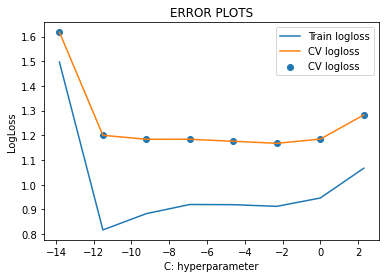

In [0]:
tuneSVM(vara_svm_hashed,varb_svm_hashed)

**from above graph i can take c as 1**

(2124, 1018) (2124,)
(532, 1018) (532,)
(665, 1018) (665,)
The Logg loss for training data with best aplha 1 is [0.9725367454691902] 
The Logg loss for cv data with best aplha 1 is [1.1331135752614927]
The Logg loss for test data with best aplha 1 is [1.2037472465904475]
-------------------- Confusion matrix --------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning:

invalid value encountered in true_divide



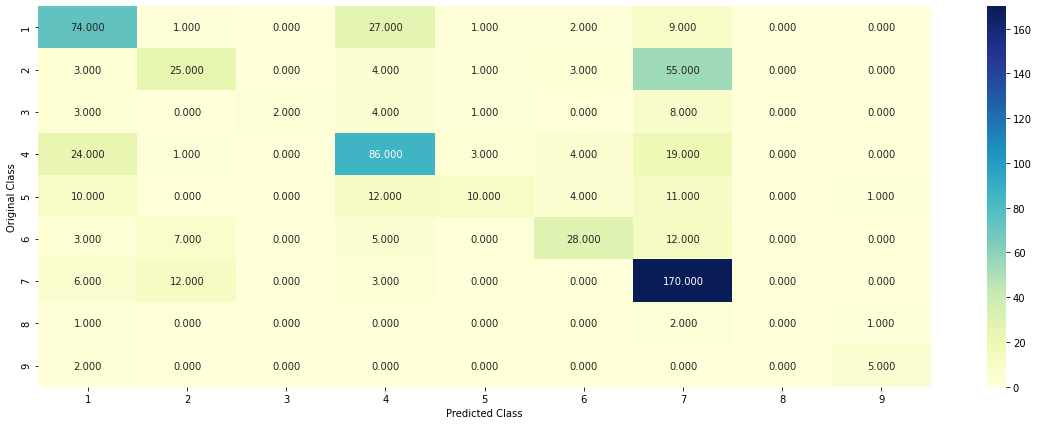

-------------------- Recall matrix (Row sum=1) --------------------


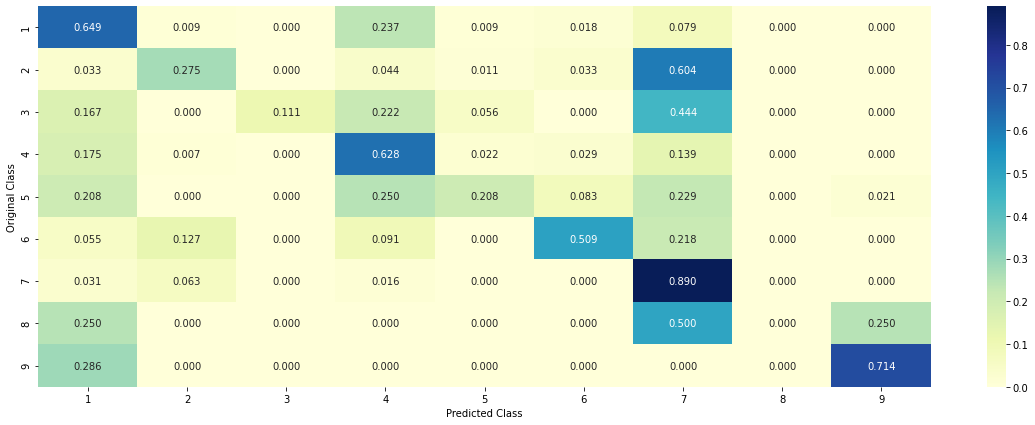

-------------------- Precision matrix (Columm Sum=1) --------------------


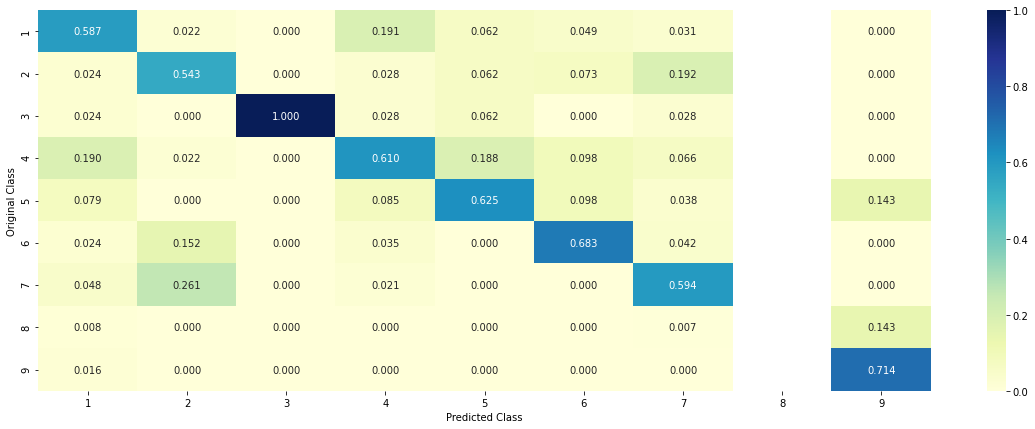

In [0]:
test_SVMModel(vara_svm_hashed,varb_hashed)

<h3>4.5 Random Forest<h3>

DatasetsUsedHere:- 
* gene (onehot encoded) + variation (oneHot encoded) +text(tfidf-Bigrams)

* gene(meanResponse encoded) + variation (meanResponse encoded) + text(tfidf-Bigrams)

* gene(hashed) + variation(hashed) + text(tfidf-Bigrams)


#####A.gene (onehot encoded) + variation (oneHot encoded) +text(tfidf-Bigrams)

In [0]:
std_gene_var_text_onehottifidf

ABL1  ACVR1  AGO2  AKT1  ...     years     yeast       yet  Class
0      0.0    0.0   0.0   0.0  ... -0.344039  0.205134  0.599335      1
1      0.0    0.0   0.0   0.0  ... -0.219060 -0.280409  0.777698      2
2      0.0    0.0   0.0   0.0  ... -0.219060 -0.280409  0.777698      2
3      0.0    0.0   0.0   0.0  ...  0.025344 -0.280409 -0.667276      3
4      0.0    0.0   0.0   0.0  ... -0.227761 -0.280409 -0.219152      4
...    ...    ...   ...   ...  ...       ...       ...       ...    ...
3316   0.0    0.0   0.0   0.0  ... -0.344039 -0.280409 -0.667276      4
3317   0.0    0.0   0.0   0.0  ... -0.344039 -0.280409 -0.667276      1
3318   0.0    0.0   0.0   0.0  ... -0.268853 -0.280409 -0.377515      1
3319   0.0    0.0   0.0   0.0  ...  0.045903 -0.280409  0.835527      4
3320   0.0    0.0   0.0   0.0  ... -0.128293 -0.280409  0.164191      4

[3321 rows x 4261 columns]

In [0]:
vara_RF_onhot=std_gene_var_text_onehottifidf.iloc[:,0:4260].values
varb_RF_onhot=std_gene_var_text_onehottifidf.Class.values

In [0]:
def tune_randomforest(vara,varb):
  """
  This function is used to tune rf model
  """
  X = vara
  y_true = varb

  x_train,x_test,y_train,y_test=train_test_split(X , y_true , stratify=y_true , test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train , stratify=y_train , test_size=0.2)

  print ( x_train.shape,y_train.shape)
  print( x_cv.shape,y_cv.shape)
  print(x_test.shape,y_test.shape)

  # HyperTuning
  logLoss_train=[ ]
  logLoss_cv=[ ]
  logLoss_test=[ ]

  estimators = [100,200,500,1000,2000]
  max_depth = [3, 5, 7,10]
  
  for i in estimators:
      for j in max_depth:
          
          print("for n_estimators =", i,"and max depth = ", j)
          clf = RandomForestClassifier(n_estimators=i, criterion='gini',class_weight='balanced', max_depth=j, random_state=42, n_jobs=-1)
          clf.fit(x_train, y_train)
          
          sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
          sig_clf.fit(x_train, y_train)
          
          sig_clf_probs_ytrain = sig_clf.predict_proba(x_train)
          sig_clf_probs_ycv = sig_clf.predict_proba(x_cv)

          logLoss_cv.append(log_loss(y_cv, sig_clf_probs_ycv, labels=clf.classes_, eps=1e-15))
          logLoss_train.append(log_loss(y_train, sig_clf_probs_ytrain, labels=clf.classes_, eps=1e-15))
          
          print("Log Loss cv:",log_loss(y_cv, sig_clf_probs_ycv)) 
          print("Log Loss train:",log_loss(y_train,sig_clf_probs_ytrain )) 









In [0]:
tune_randomforest(vara_RF_onhot,varb_RF_onhot)

(2124, 4260) (2124,)
(532, 4260) (532,)
(665, 4260) (665,)
for n_estimators = 100 and max depth =  3
Log Loss cv: 1.2606812233244562
Log Loss train: 1.1374431015135666
for n_estimators = 100 and max depth =  5
Log Loss cv: 1.1653337133462423
Log Loss train: 0.9371070459846149
for n_estimators = 100 and max depth =  7
Log Loss cv: 1.12209548509024
Log Loss train: 0.7363291411007856
for n_estimators = 100 and max depth =  10
Log Loss cv: 1.10268480641603
Log Loss train: 0.5519688514792611
for n_estimators = 200 and max depth =  3
Log Loss cv: 1.248631824458489
Log Loss train: 1.1184306206599595
for n_estimators = 200 and max depth =  5
Log Loss cv: 1.1564275473529837
Log Loss train: 0.919144190096995
for n_estimators = 200 and max depth =  7
Log Loss cv: 1.110794380130624
Log Loss train: 0.7207481407448507
for n_estimators = 200 and max depth =  10
Log Loss cv: 1.0961422234706304
Log Loss train: 0.5423272076360501
for n_estimators = 500 and max depth =  3
Log Loss cv: 1.2478678013942157


**from above data i can select esimators 2000 and depth=5**

In [0]:
def testRF(vara,varb):
  """
  This function is used to test rf model
  """
  X = vara
  y_true = varb

  x_train,x_test,y_train,y_test=train_test_split(X , y_true , stratify=y_true , test_size=0.2)
  x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train , stratify=y_train , test_size=0.2)

  print ( x_train.shape,y_train.shape)
  print( x_cv.shape,y_cv.shape)
  print(x_test.shape,y_test.shape)

  # HyperTuning
  logLoss_train=[ ]
  logLoss_cv=[ ]
  logLoss_test=[ ]

  
          
 
  clf = RandomForestClassifier(n_estimators=1000, criterion='gini',class_weight='balanced', max_depth=5, random_state=42, n_jobs=-1)
  clf.fit(x_train, y_train)
  
  sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
  sig_clf.fit(x_train, y_train)
  
  sig_clf_probs_ytrain = sig_clf.predict_proba(x_train)
  sig_clf_probs_ycv = sig_clf.predict_proba(x_cv)
  sig_clf_probs_ytest = sig_clf.predict_proba(x_test)

  logLoss_cv.append(log_loss(y_cv, sig_clf_probs_ycv, labels=clf.classes_, eps=1e-15))
  logLoss_train.append(log_loss(y_train, sig_clf_probs_ytrain, labels=clf.classes_, eps=1e-15))
  logLoss_test.append(log_loss(y_test, sig_clf_probs_ytest, labels=clf.classes_, eps=1e-15))
  
  print("Log Loss cv:",log_loss(y_cv, sig_clf_probs_ycv)) 
  print("Log Loss train:",log_loss(y_train,sig_clf_probs_ytrain ))
  print("Log Loss test:",log_loss(y_test,sig_clf_probs_ytest ))

  plot_confusion_matrix(y_test,  sig_clf.predict(x_test))




(2124, 4260) (2124,)
(532, 4260) (532,)
(665, 4260) (665,)
Log Loss cv: 1.11768909971263
Log Loss train: 0.9002694349418067
Log Loss test: 1.1477524391499037


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning:

invalid value encountered in true_divide



-------------------- Confusion matrix --------------------


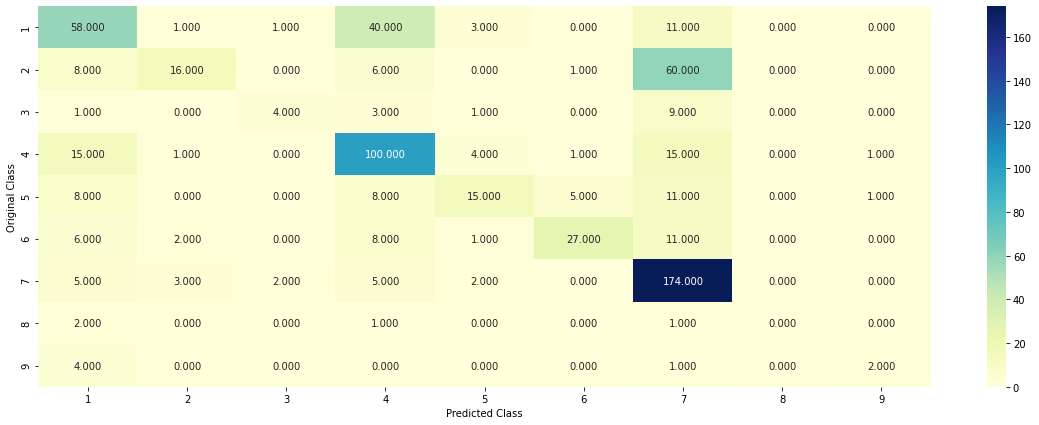

-------------------- Recall matrix (Row sum=1) --------------------


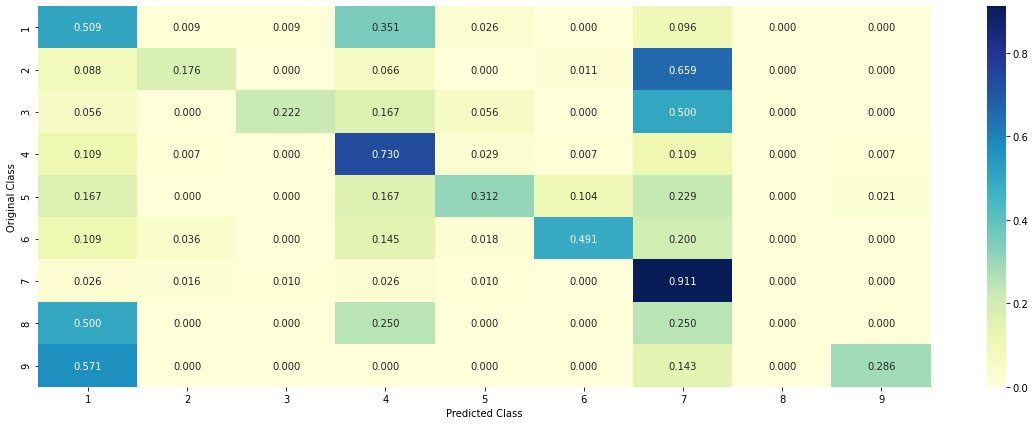

-------------------- Precision matrix (Columm Sum=1) --------------------


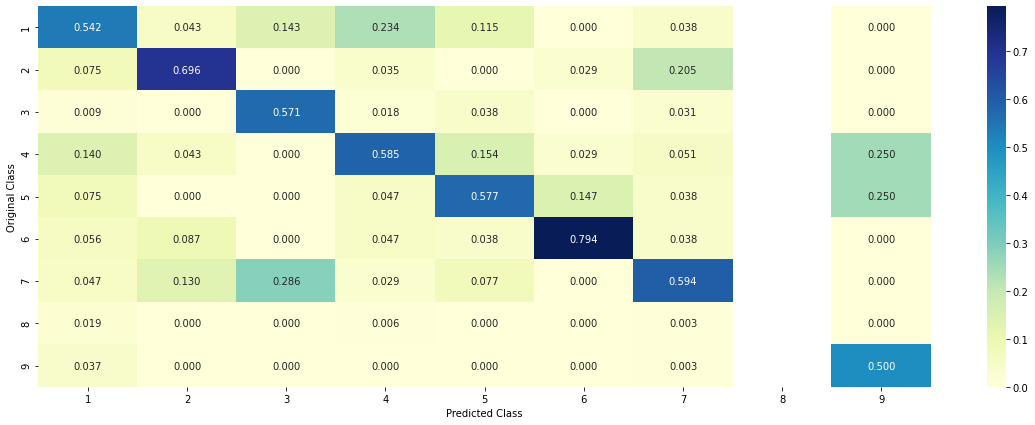

In [0]:
testRF(vara_RF_onhot,varb_RF_onhot)

###B.gene(meanResponse encoded) + variation (meanResponse encoded) + text(tfidf-Bigrams)

In [0]:
std_gene_var_text_meanTdidf

0         1         2  ...     yeast       yet  Class
0    -0.051316 -0.079307  1.060311  ...  0.205134  0.599335      1
1    -0.280827 -0.167630  0.464136  ... -0.280409  0.777698      2
2    -0.280827 -0.167630  0.464136  ... -0.280409  0.777698      2
3    -0.280827 -0.167630  0.464136  ... -0.280409 -0.667276      3
4    -0.280827 -0.167630  0.464136  ... -0.280409 -0.219152      4
...        ...       ...       ...  ...       ...       ...    ...
3316  0.097234 -0.432626  0.131969  ... -0.280409 -0.667276      4
3317  0.097234 -0.432626  0.131969  ... -0.280409 -0.667276      1
3318  0.097234 -0.432626  0.131969  ... -0.280409 -0.377515      1
3319  0.097234 -0.432626  0.131969  ... -0.280409  0.835527      4
3320  0.097234 -0.432626  0.131969  ... -0.280409  0.164191      4

[3321 rows x 1019 columns]

In [0]:
vara_mean_rf=std_gene_var_text_meanTdidf.iloc[:,0:1018]
varb_mean_rf=std_gene_var_text_meanTdidf.Class.values



In [0]:
tune_randomforest(vara_mean_rf,varb_mean_rf)

(2124, 1018) (2124,)
(532, 1018) (532,)
(665, 1018) (665,)
for n_estimators = 100 and max depth =  3
Log Loss cv: 0.23570046546599333
Log Loss train: 0.19363398591104833
for n_estimators = 100 and max depth =  5
Log Loss cv: 0.22955561081586118
Log Loss train: 0.16166542392105412
for n_estimators = 100 and max depth =  7
Log Loss cv: 0.23627364969006484
Log Loss train: 0.13622754279491436
for n_estimators = 100 and max depth =  10
Log Loss cv: 0.23299169854143326
Log Loss train: 0.09219438260645411
for n_estimators = 200 and max depth =  3
Log Loss cv: 0.15347165131328178
Log Loss train: 0.1289817833963096
for n_estimators = 200 and max depth =  5
Log Loss cv: 0.18867692478728829
Log Loss train: 0.1333800470656138
for n_estimators = 200 and max depth =  7
Log Loss cv: 0.19812746725522537
Log Loss train: 0.11363125813131297
for n_estimators = 200 and max depth =  10
Log Loss cv: 0.2073843284191654
Log Loss train: 0.08264026371353654
for n_estimators = 500 and max depth =  3
Log Loss cv:

**from the above i can take estimators as 2000 and depth as 3**

(2124, 1018) (2124,)
(532, 1018) (532,)
(665, 1018) (665,)
Log Loss cv: 0.16118368189224744
Log Loss train: 0.1295171475728342
Log Loss test: 0.17283674779043046
-------------------- Confusion matrix --------------------


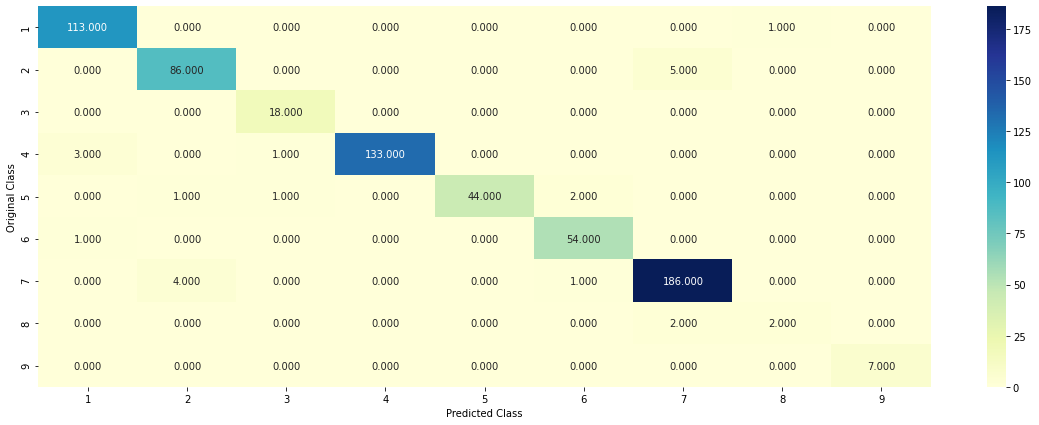

-------------------- Recall matrix (Row sum=1) --------------------


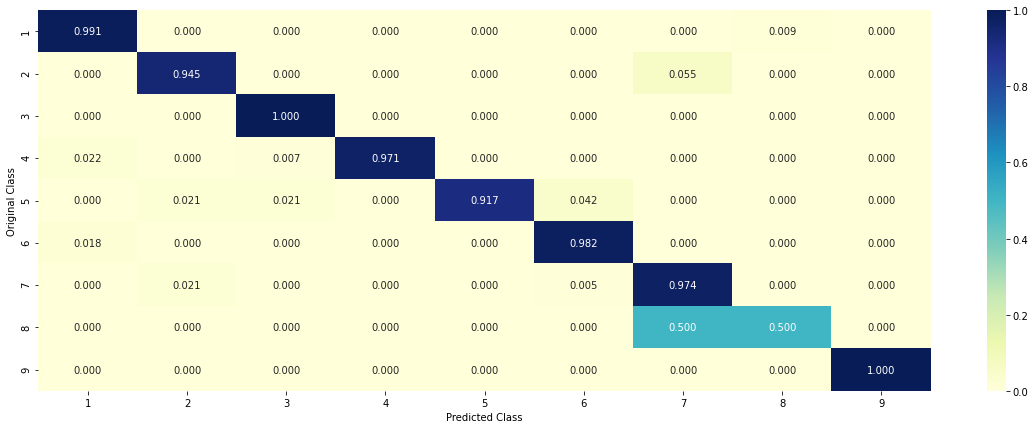

-------------------- Precision matrix (Columm Sum=1) --------------------


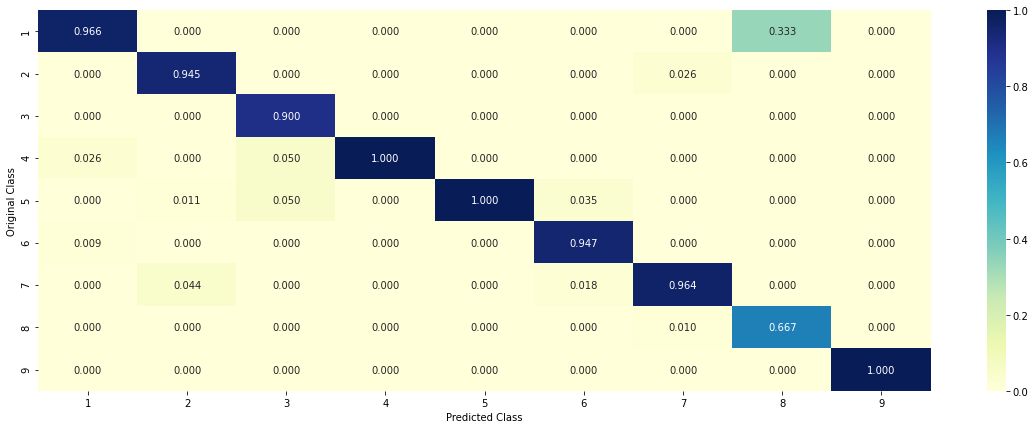

In [0]:
testRF(vara_mean_rf,varb_mean_rf)

#####C.gene(hashed) + variation(hashed) + text(tfidf-Bigrams)

In [26]:
std_gene_var_text_hashingtfidf

0    1    2    3    4  ...        wt     years     yeast       yet  Class
0     0.0  2.0  0.0  0.0  1.0  ...  0.173741 -0.344039  0.205134  0.599335      1
1     0.0  0.0 -1.0 -1.0  0.0  ... -0.160639 -0.219060 -0.280409  0.777698      2
2     0.0  0.0 -1.0 -1.0  0.0  ... -0.160639 -0.219060 -0.280409  0.777698      2
3     0.0  0.0 -1.0 -1.0  0.0  ... -0.233922  0.025344 -0.280409 -0.667276      3
4     0.0  0.0 -1.0 -1.0  0.0  ... -0.441298 -0.227761 -0.280409 -0.219152      4
...   ...  ...  ...  ...  ...  ...       ...       ...       ...       ...    ...
3316  1.0 -1.0  0.0  0.0  0.0  ...  0.605370 -0.344039 -0.280409 -0.667276      4
3317  1.0 -1.0  0.0  0.0  0.0  ...  0.905036 -0.344039 -0.280409 -0.667276      1
3318  1.0 -1.0  0.0  0.0  0.0  ... -0.441298 -0.268853 -0.280409 -0.377515      1
3319  1.0 -1.0  0.0  0.0  0.0  ... -0.392649  0.045903 -0.280409  0.835527      4
3320  1.0 -1.0  0.0  0.0  0.0  ... -0.387465 -0.128293 -0.280409  0.164191      4

[3321 rows x 1019 columns]

In [0]:
vara_hashed_rf=std_gene_var_text_hashingtfidf.iloc[:,0:1018].values
varb_hashed_rf=std_gene_var_text_hashingtfidf.Class.values

In [30]:
tune_randomforest(vara_hashed_rf,varb_hashed_rf)

(2124, 1018) (2124,)
(532, 1018) (532,)
(665, 1018) (665,)
for n_estimators = 100 and max depth =  3
Log Loss cv: 1.2562525882383961
Log Loss train: 1.1495093667153717
for n_estimators = 100 and max depth =  5
Log Loss cv: 1.1414141205937414
Log Loss train: 0.9137821932641781
for n_estimators = 100 and max depth =  7
Log Loss cv: 1.0891671228800952
Log Loss train: 0.7274585518989484
for n_estimators = 100 and max depth =  10
Log Loss cv: 1.0602735362314917
Log Loss train: 0.5419761320891583
for n_estimators = 200 and max depth =  3
Log Loss cv: 1.2256031707183694
Log Loss train: 1.1125457127985048
for n_estimators = 200 and max depth =  5
Log Loss cv: 1.1239819425283584
Log Loss train: 0.8863029989503483
for n_estimators = 200 and max depth =  7
Log Loss cv: 1.0779197694234626
Log Loss train: 0.7025060768309693
for n_estimators = 200 and max depth =  10
Log Loss cv: 1.0544180795539924
Log Loss train: 0.5270883620171445
for n_estimators = 500 and max depth =  3
Log Loss cv: 1.2076769669

**from looking above i can take estimators as 1000 and depth as 5**

(2124, 1018) (2124,)
(532, 1018) (532,)
(665, 1018) (665,)
Log Loss cv: 1.12511787673414
Log Loss train: 0.8844410482107985
Log Loss test: 1.1406196373627946


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning:

invalid value encountered in true_divide



-------------------- Confusion matrix --------------------


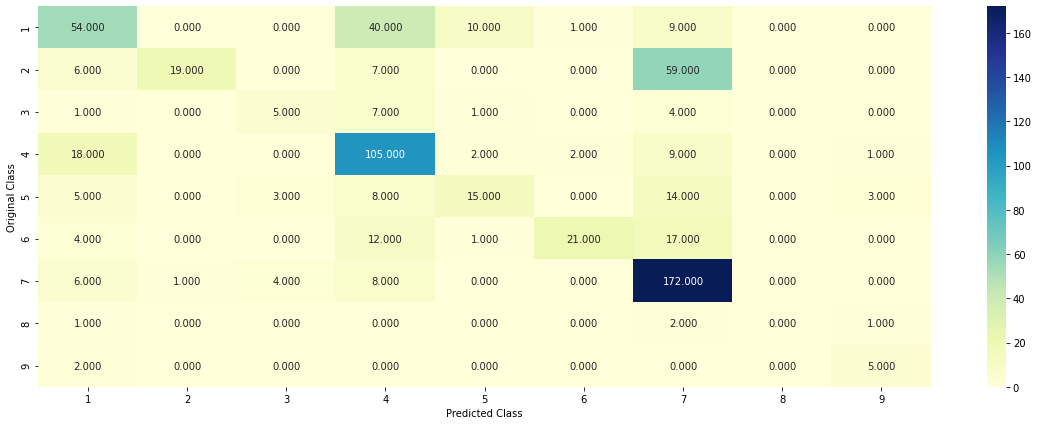

-------------------- Recall matrix (Row sum=1) --------------------


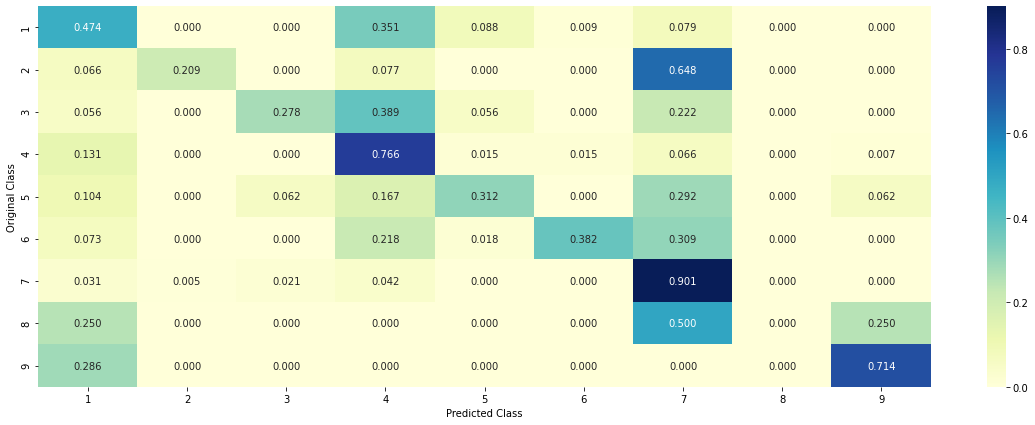

-------------------- Precision matrix (Columm Sum=1) --------------------


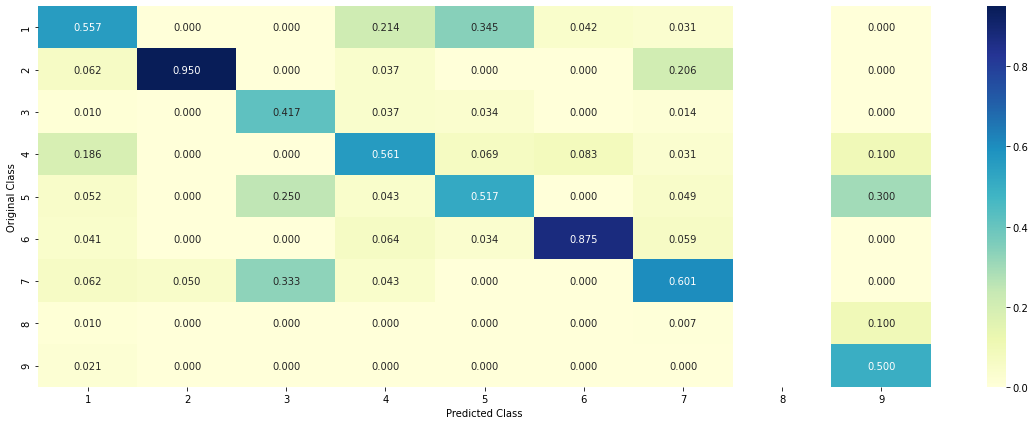

In [36]:
testRF(vara_hashed_rf,varb_hashed_rf)

<h3>4.6 Lets apply Stacking classifier<h3>


#####Applying Stacking Classifer on MeanResponse Coding

In [0]:
X=std_gene_var_text_meanTdidf.iloc[:,0:1018].values
Y=std_gene_var_text_meanTdidf.Class.values

In [41]:
smk=SMOTETomek(random_state=42)
xres,yres=smk.fit_sample(X,Y)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

*Models*

In [0]:
def stackingClassifier(vara,varb):

    X = vara
    y_true = varb

    x_train,x_test,y_train,y_test=train_test_split(X , y_true , stratify=y_true , test_size=0.2)
    x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train , stratify=y_train , test_size=0.2)

    print ( x_train.shape,y_train.shape)
    print( x_cv.shape,y_cv.shape)
    print(x_test.shape,y_test.shape)


    neigh = KNeighborsClassifier(n_neighbors=15,n_jobs=-1)
    neigh.fit(x_train, y_train)
    sig_clf0 = CalibratedClassifierCV(neigh, method="sigmoid")
    sig_clf0.fit(x_train,y_train)

    model = LogisticRegression(penalty='l2',C=0.1,max_iter=1000 ,solver='newton-cg' )
    model.fit(x_train , y_train)
    sig_clf1 = CalibratedClassifierCV(model, method="sigmoid")
    sig_clf1.fit(x_train,y_train)


    clf_SGD_test=SGDClassifier(loss='hinge',penalty='l2',alpha=1)
    clf_SGD_test.fit(x_train,y_train)
    sig_clf2 = CalibratedClassifierCV(clf_SGD_test, method="sigmoid")
    sig_clf2.fit(x_train,y_train)

    meta_clf=LogisticRegression(penalty='l2',C=0.1,solver='newton-cg',n_jobs=-1,max_iter=4000)


    sF = StackingClassifier(classifiers=[sig_clf0, sig_clf1, sig_clf2], meta_classifier=meta_clf, use_probas=True)
    sF.fit(x_train, y_train)
    

    log_error = log_loss(y_train, sF.predict_proba(x_train),eps=1e-15)
    print("Log loss (train) on the stacking classifier :",log_error)
    log_error = log_loss(y_cv, sF.predict_proba(x_cv),eps=1e-15)
    print("Log loss (cv) on the stacking classifier :",log_error)
    log_error = log_loss(y_test, sF.predict_proba(x_test),eps=1e-15)
    print("Log loss (train) on the stacking classifier :",log_error)
    
    plot_confusion_matrix(y_test , sF.predict(x_test))

    


(5390, 1018) (5390,)
(1348, 1018) (1348,)
(1685, 1018) (1685,)
Log loss (train) on the stacking classifier : 0.14030289465971651
Log loss (cv) on the stacking classifier : 0.2420519229697048
Log loss (train) on the stacking classifier : 0.25972844103712256
-------------------- Confusion matrix --------------------


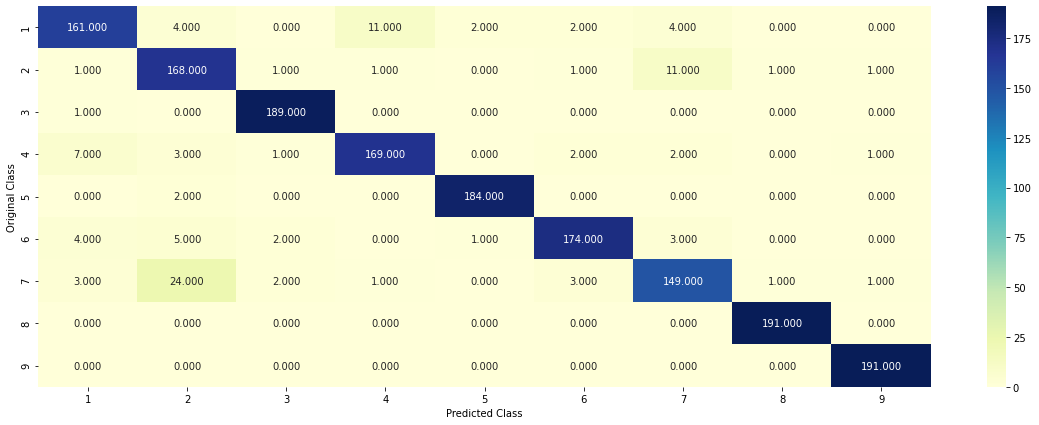

-------------------- Recall matrix (Row sum=1) --------------------


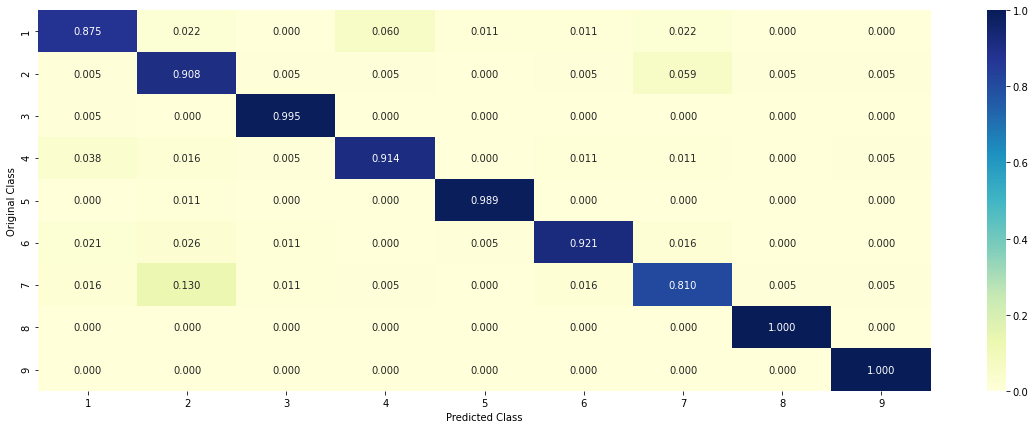

-------------------- Precision matrix (Columm Sum=1) --------------------


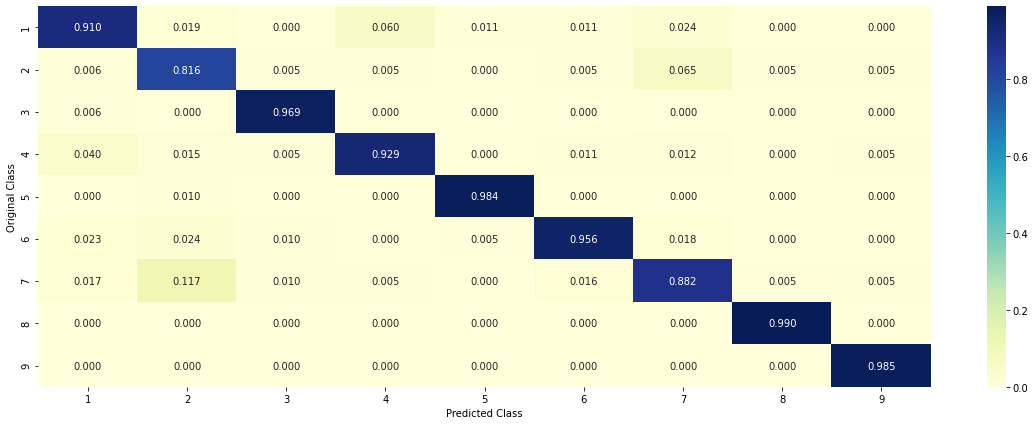

In [63]:
stackingClassifier(xres,yres)

In [0]:
def stackingClassifier_tunning(vara,varb):

    X = vara
    y_true = varb

    x_train,x_test,y_train,y_test=train_test_split(X , y_true , stratify=y_true , test_size=0.2)
    x_train,x_cv,y_train,y_cv=train_test_split(x_train,y_train , stratify=y_train , test_size=0.2)

    print ( x_train.shape,y_train.shape)
    print( x_cv.shape,y_cv.shape)
    print(x_test.shape,y_test.shape)

    hp=[0.0001,0.001,0.01,0.1,1,10,15]
    logLoss_train=[]
    logLoss_test=[]
    logLoss_cv=[]
                
    for i in hp:
        neigh = KNeighborsClassifier(n_neighbors=15,n_jobs=-1)
        neigh.fit(x_train, y_train)
        sig_clf0 = CalibratedClassifierCV(neigh, method="sigmoid")
        sig_clf0.fit(x_train,y_train)

        model = LogisticRegression(penalty='l2',C=0.1,max_iter=1000 ,solver='newton-cg' )
        model.fit(x_train , y_train)
        sig_clf1 = CalibratedClassifierCV(model, method="sigmoid")
        sig_clf1.fit(x_train,y_train)


        clf_SGD_test=SGDClassifier(loss='hinge',penalty='l2',alpha=1)
        clf_SGD_test.fit(x_train,y_train)
        sig_clf2 = CalibratedClassifierCV(clf_SGD_test, method="sigmoid")
        sig_clf2.fit(x_train,y_train)

        meta_clf=LogisticRegression(penalty='l2',C=i,solver='newton-cg',n_jobs=-1,max_iter=4000)


        sF = StackingClassifier(classifiers=[sig_clf0, sig_clf1, sig_clf2], meta_classifier=meta_clf, use_probas=True)
        sF.fit(x_train, y_train)
        

        logLoss_train.append(log_loss(y_train, sF.predict_proba(x_train),eps=1e-15))
        logLoss_cv.append(log_loss(y_cv, sF.predict_proba(x_cv),eps=1e-15))
        #logLoss_train.append(log_loss(y_test, sF.predict_proba(x_test),eps=1e-15))

    
    plt.plot(np.log(hp), logLoss_train, label='Train logloss')
    plt.plot(np.log(hp), logLoss_cv, label='CV logloss')

    plt.scatter(np.log(hp), logLoss_cv, label='CV logloss')
    plt.legend()

    plt.xlabel("C:hyperparameter")
    plt.ylabel("LogLoss")
    plt.title("ERROR PLOTS")
    return(plt.show())
        


(5390, 1018) (5390,)
(1348, 1018) (1348,)
(1685, 1018) (1685,)


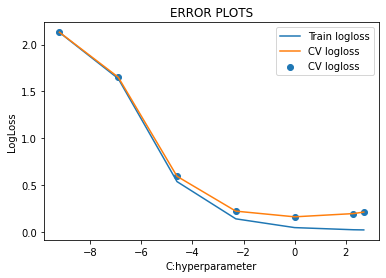

In [60]:
stackingClassifier_tunning(xres,yres)

**for meta classifier i can take my c values as 0.1** 

####Applyin stacking for onehotfeatures

In [0]:
x=std_gene_var_text_onehottifidf.iloc[:,0:4260].values
y=std_gene_var_text_onehottifidf.Class.values


In [34]:
smk=SMOTETomek(random_state=42)
xres,yres=smk.fit_sample(x,y)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

**reusing above functions**

im skipping to apply stacking with one hot features as it is taking more time for tuning stage directly applying test stage with previous models parameters.

In [1]:
stackingClassifier_tunning(xres,yres)

NameError: ignored

taking c as 1

(5376, 4260) (5376,)
(1344, 4260) (1344,)
(1681, 4260) (1681,)
Log loss (train) on the stacking classifier : 0.30903590626810395
Log loss (cv) on the stacking classifier : 0.5317070749588001
Log loss (train) on the stacking classifier : 0.5271830152079766
-------------------- Confusion matrix --------------------


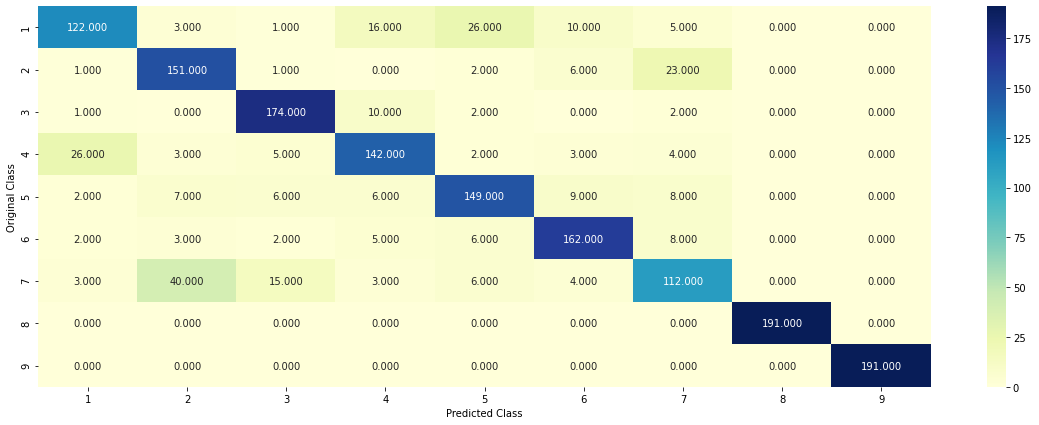

-------------------- Recall matrix (Row sum=1) --------------------


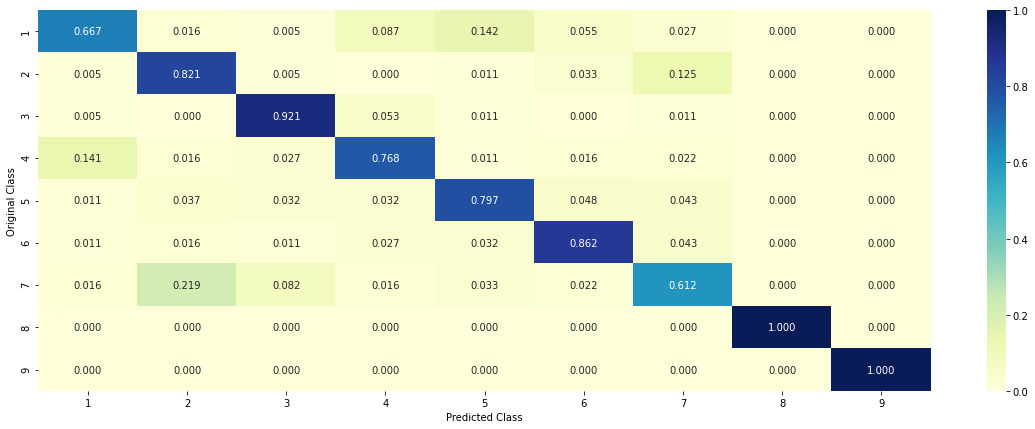

-------------------- Precision matrix (Columm Sum=1) --------------------


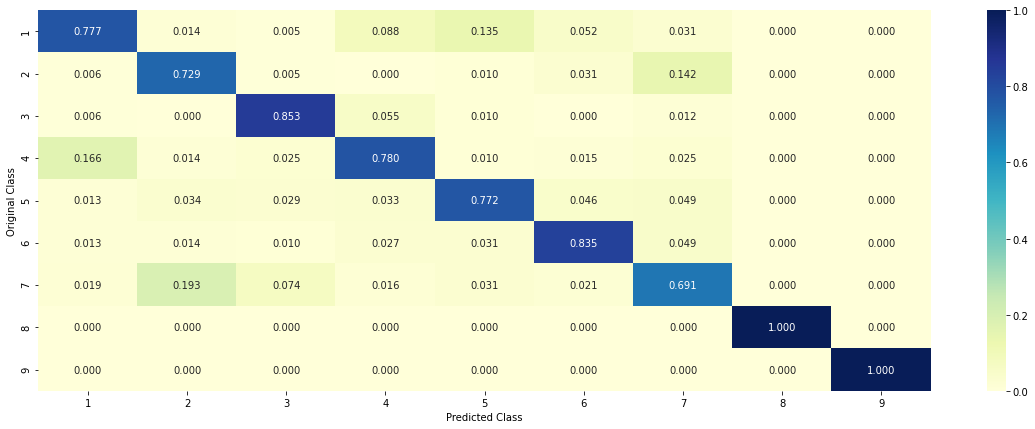

In [35]:
stackingClassifier(xres,yres)

**taking c as 0.1**

(5376, 4260) (5376,)
(1344, 4260) (1344,)
(1681, 4260) (1681,)
Log loss (train) on the stacking classifier : 0.31039276656264053
Log loss (cv) on the stacking classifier : 0.5340512149631327
Log loss (train) on the stacking classifier : 0.5269476489328632
-------------------- Confusion matrix --------------------


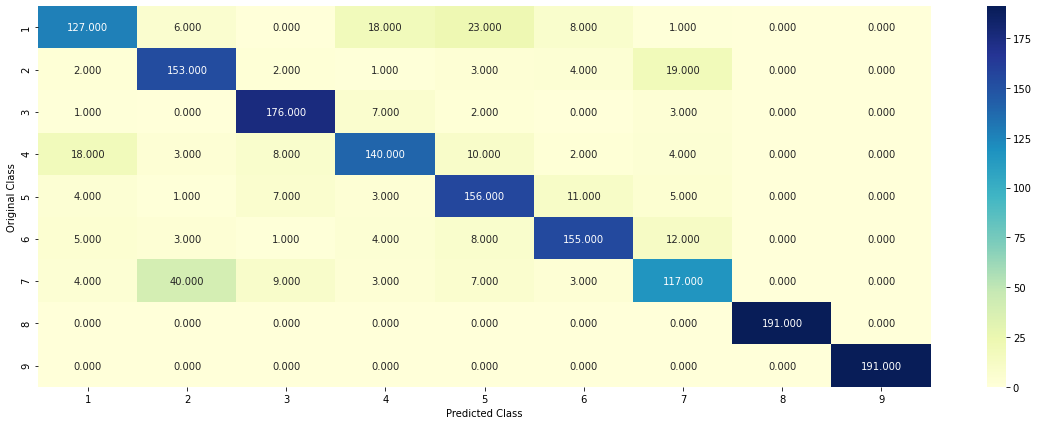

-------------------- Recall matrix (Row sum=1) --------------------


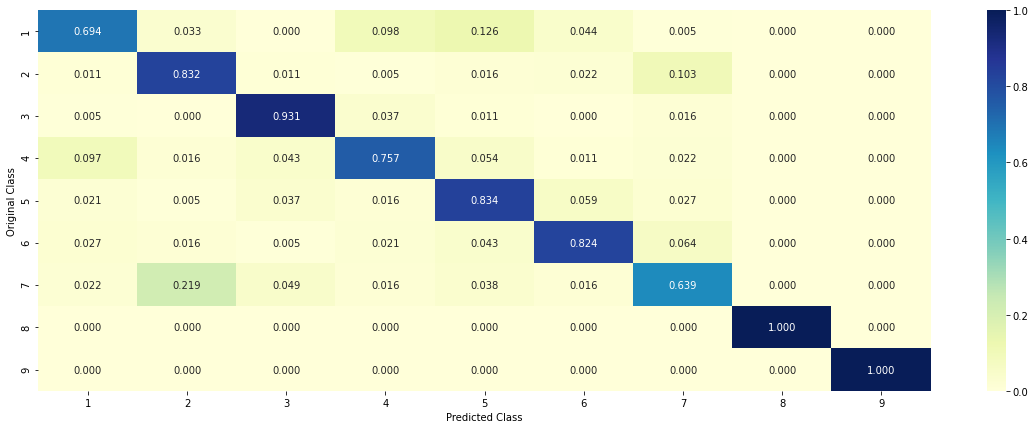

-------------------- Precision matrix (Columm Sum=1) --------------------


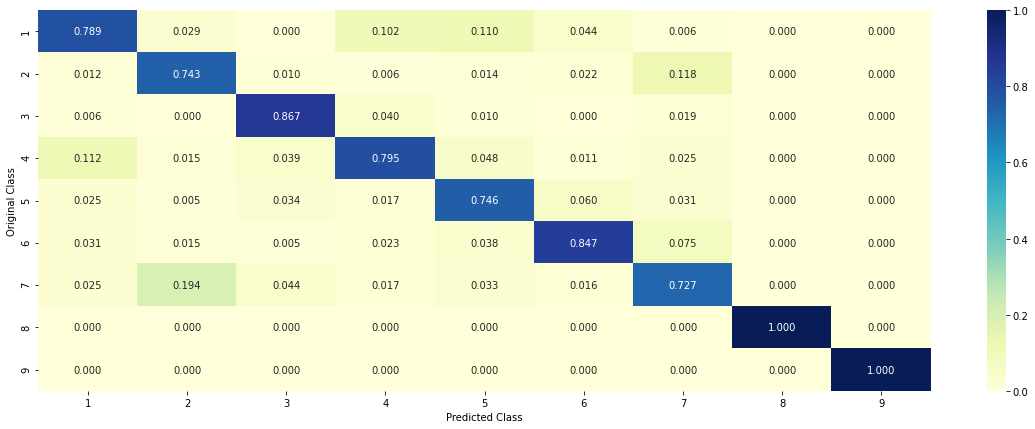

In [37]:
stackingClassifier(xres,yres)

####Applyin stacking for hashed Featurisation

In [25]:
std_gene_var_text_hashingtfidf

0    1    2    3    4  ...        wt     years     yeast       yet  Class
0     0.0  2.0  0.0  0.0  1.0  ...  0.173741 -0.344039  0.205134  0.599335      1
1     0.0  0.0 -1.0 -1.0  0.0  ... -0.160639 -0.219060 -0.280409  0.777698      2
2     0.0  0.0 -1.0 -1.0  0.0  ... -0.160639 -0.219060 -0.280409  0.777698      2
3     0.0  0.0 -1.0 -1.0  0.0  ... -0.233922  0.025344 -0.280409 -0.667276      3
4     0.0  0.0 -1.0 -1.0  0.0  ... -0.441298 -0.227761 -0.280409 -0.219152      4
...   ...  ...  ...  ...  ...  ...       ...       ...       ...       ...    ...
3316  1.0 -1.0  0.0  0.0  0.0  ...  0.605370 -0.344039 -0.280409 -0.667276      4
3317  1.0 -1.0  0.0  0.0  0.0  ...  0.905036 -0.344039 -0.280409 -0.667276      1
3318  1.0 -1.0  0.0  0.0  0.0  ... -0.441298 -0.268853 -0.280409 -0.377515      1
3319  1.0 -1.0  0.0  0.0  0.0  ... -0.392649  0.045903 -0.280409  0.835527      4
3320  1.0 -1.0  0.0  0.0  0.0  ... -0.387465 -0.128293 -0.280409  0.164191      4

[3321 rows x 1019 columns]

In [0]:
x=std_gene_var_text_hashingtfidf.iloc[:,0:1018].values
y=std_gene_var_text_hashingtfidf.Class.values

In [27]:
smk=SMOTETomek(random_state=42)
xres,yres=smk.fit_sample(x,y)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

(5358, 1018) (5358,)
(1340, 1018) (1340,)
(1675, 1018) (1675,)


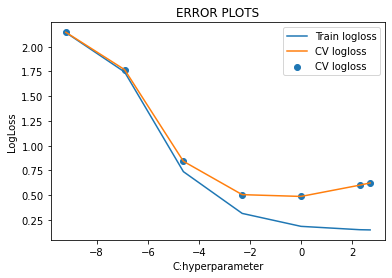

In [30]:
stackingClassifier_tunning(xres,yres)

**from above figure i will select c as 0.1**

(5358, 1018) (5358,)
(1340, 1018) (1340,)
(1675, 1018) (1675,)
Log loss (train) on the stacking classifier : 0.31306871841068806
Log loss (cv) on the stacking classifier : 0.5266414657786868
Log loss (train) on the stacking classifier : 0.5249250625775747
-------------------- Confusion matrix --------------------


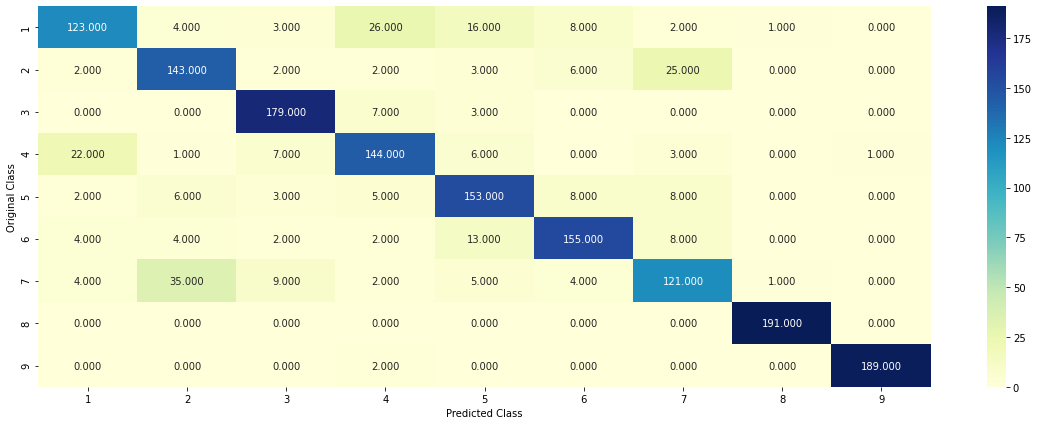

-------------------- Recall matrix (Row sum=1) --------------------


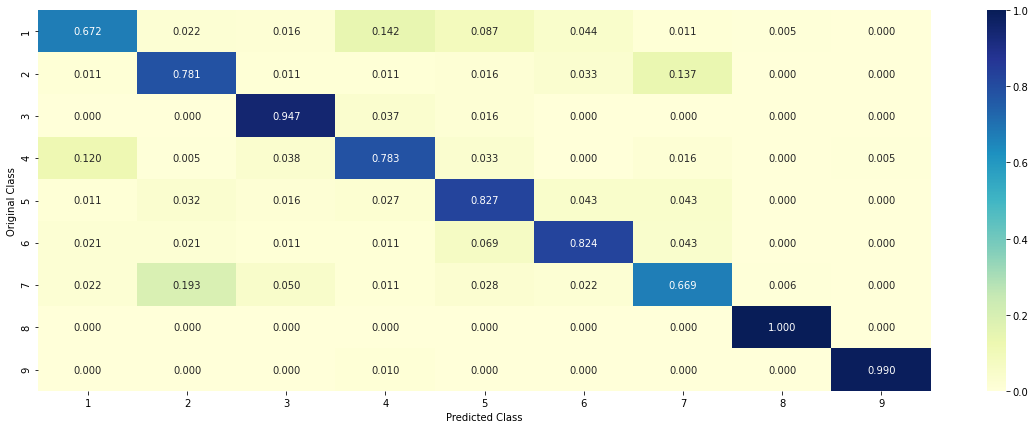

-------------------- Precision matrix (Columm Sum=1) --------------------


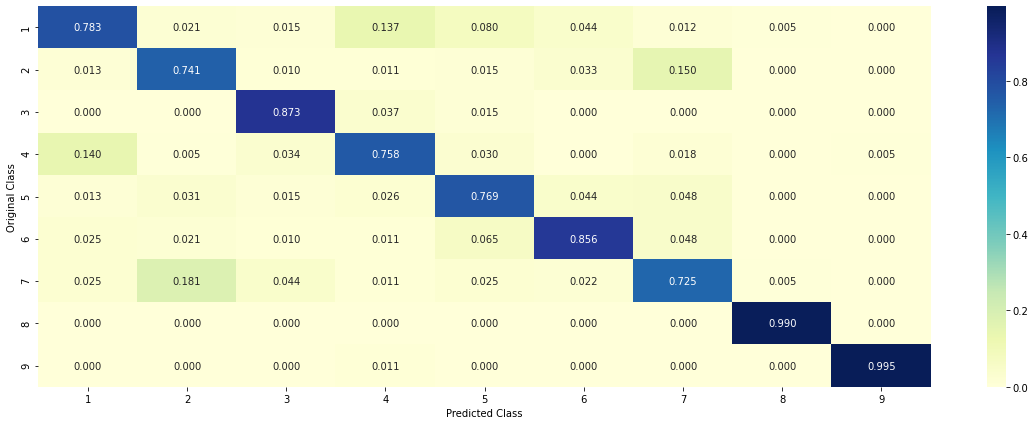

In [32]:
stackingClassifier(xres,yres)

<h2>5.0 Final Observations Preetytableformat<h2>


In [0]:
from prettytable import PrettyTable
table=PrettyTable()

In [8]:
table.field_names=["Feature Name" , "Featurisation Used" ,"Model","HyperParameter", " train Logloss"," Cv Logloss","test Logloss"]

table.add_row(["gene,text,variation","Hashing","StackingClassifier","(0.1 Metaclassifier-LogisticRegression)",0.313,0.526,0.526 ])
table.add_row(["gene,text,variation","OneHotEncoding","StackingClassifier","(0.1 Metaclassifier-LogisticRegression)",0.310,0.534,0.526 ])
table.add_row(["gene,text,variation","OneHotEncoding","StackingClassifier","(1 Metaclassifier-LogisticRegression)",0.309,0.531,0.527])
table.add_row(["gene,text,variation","MeanResponseCoding","StackingClassifier","(0.1 Metaclassifier-LogisticRegression)",0.140,0.242,0.259])

table.add_row(["gene,text,variation","Hashing","RandomForestClassifier","(estimatores-1000,depth-5)",0.884,1.125,1.140])

#print("**************************************************************************************************************************")
#bestone
table.add_row(["gene,text,variation","MeanResponseCoding","RandomForestClassifier","(estimatores-2000,depth-3)",0.129,0.161,0.172])
#print("**************************************************************************************************************************")

table.add_row(["gene,text,variation","onehotencoding","RandomForestClassifier","(estimatores-2000,depth-5)",0.900,1.117,1.147])


table.add_row(["gene,text,variation","Hashing","SVM Classifier",1,0.972,1.133,1.203])
table.add_row(["gene,text,variation","MeanResponseCoding","SVM Classifier",1,0.878,1.104,1.057])
table.add_row(["gene,text,variation","MeanResponseCoding","SVM Classifier",0.1,0.936,1.151,1.168])


table.add_row(["gene,text,variation","Hashed","LogisticRegression",1,0.873,1.192,1.199])
table.add_row(["gene,text,variation","MeanResponseCoding","LogisticRegression",1,0.584,0.857,0.821])
table.add_row(["gene,text,variation","onehotencoding","LogisticRegression",1,0.785,1.196,1.748])


table.add_row(["gene,text,variation","hashed","KNN Clasifier",15,0.647,0.751,0.736])
table.add_row(["gene,text,variation","MeanResponseCoding","KNN Clasifier",31,0.681,0.701,0.777])
table.add_row(["gene,text,variation","onehotencoding","KNN Clasifier",31,0.813,0.878,0.881])



table.add_row(["gene,text,variation","MeanResponseCoding","NB Clasifier",1,1.038,1.261,1.232])
table.add_row(["gene,text,variation","MeanResponseCoding","NB Clasifier",1,0.963,1.192,1.198])


print(table)

+---------------------+--------------------+------------------------+-----------------------------------------+----------------+-------------+--------------+
|     Feature Name    | Featurisation Used |         Model          |              HyperParameter             |  train Logloss |  Cv Logloss | test Logloss |
+---------------------+--------------------+------------------------+-----------------------------------------+----------------+-------------+--------------+
|         Text        |       TFIDF        |        Logistic        |                  0.001                  |     0.944      |     1.21    |    1.153     |
|         Text        |        BOW         |        Logistic        |                  0.001                  |     0.906      |    1.544    |    1.214     |
| gene,text,variation |      Hashing       |   StackingClassifier   | (0.1 Metaclassifier-LogisticRegression) |     0.313      |    0.526    |    0.526     |
| gene,text,variation |   OneHotEncoding   |   Stack

**Out of all models RandomForest perfomed well with meanResponsecoded features, next comes Stacking classifiers and KNN with balancing data set.**